In [ ]:
pip install requests feedparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=50b37bf676ac4d2e88e7801c7b622c7e3098c70d17f754d179bcd58e08ffaefa
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [ ]:
pip install pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.3 MB/s eta 0:00:00


In [ ]:
import requests
import feedparser

def fetch_arxiv_abstracts(query='AI.computer science', max_results=10):
    # Base URL for the arXiv API
    base_url = 'http://export.arxiv.org/api/query?'

    # Parameters for the query
    params = {
        "search_query": query,  # e.g., all AI papers in Computer Science
        "start": 0,             # retrieval starts at the first result
        "max_results": max_results
    }

    # Send a GET request to the arXiv API
    response = requests.get(base_url, params=params)

    # Parse the response using feedparser
    feed = feedparser.parse(response.content)

    # Collect abstracts
    abstracts = []
    for entry in feed.entries:
        abstracts.append(entry.summary)

    return abstracts

# Example usage
abstracts = fetch_arxiv_abstracts(query='AI.computer science', max_results=20)
for i, abstract in enumerate(abstracts):
    print(f"Abstract {i+1}: {abstract}\n")

Abstract 1: John Desmond Bernal (1901-1970) was one of the most eminent scientists in
molecular biology, and also regarded as the founding father of the Science of
Science. His book The Social Function of Science laid the theoretical
foundations for the discipline. In this article, we summarize four chief
characteristics of his ideas in the Science of Science: the socio-historical
perspective, theoretical models, qualitative and quantitative approaches, and
studies of science planning and policy. China has constantly reformed its
scientific and technological system based on research evidence of the Science
of Science. Therefore, we analyze the impact of Bernal Science-of-Science
thoughts on the development of Science of Science in China, and discuss how
they might be usefully taken still further in quantitative studies of science.

Abstract 2: Data science is gaining more and more and widespread attention, but no
consensus viewpoint on what data science is has emerged. As a new science

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import re

# Ensure necessary components from NLTK are available
nltk.download('punkt')
nltk.download('stopwords')

# Provided abstracts
abstracts = [ "Application of intelligent expert systems for structuring and automation of laboratory activities in the educational process has been analysed. It is shown that combination of teaching materials with cross-references and transitions by the means of expert systems allows educators to make optimal decisions on time, set priorities and prepare more effective laboratory classes. The implementation of expert systems for classification sections of academic disciplines in both engineering and technical sciences and humanities has been discussed. An algorithm for making decisions by an expert system, where the main emphasis is given to laboratory tasks and work with laboratory equipment, is proposed. It is shown how to develop a new expert system which can help university educators prepare remote laboratory work, and also to use of virtual simulators or effective practical training. The proposed expert systems can be used for classifying thematic sections of a wide range of disciplines, including natural sciences, engineering, and humanities. They can be used for preparing new courses and training new educators in different areas. Thus expert systems are described as high-scale software units without restrictions on the depth of the question tree and the number of logical branches of the classifier.",
             "The article presents the developed machine learning model for the diagnosis and prognosis of a neurological disorder - Parkinson's disease. The choice of the algorithm used to create the model is justified. By employing machine learning methods, particularly Support Vector Machines and k-Nearest Neighbors algorithms, high accuracy and reliability were achieved in predicting disease class labels. The analysis of relationships between clinical, genetic, and biomarker features demonstrated that these characteristics significantly influence the development of Parkinson's disease.",
              "Obtaining accurate solutions to many-electron quantum systems is of critical importance, in principle, such solutions allow computing most of possible chemical and physical properties from first principles. Exact solutions require utilizing exponentially scaling algorithms, which are not practical for large systems. Neural networks provide a new approach to approximating the solution while keeping a high level of accuracy. In this work, we explore a novel method of optimizing neural network wavefunctions by employing Evolution Strategies (ES) within a Variational Monte Carlo (VMC) framework. This allows us to more robustly find solutions while keeping a small number of parameters, making it an efficient alternative to traditional methods.",
              "In the modern educational landscape, ensuring efficient and conflict-free class scheduling in higher education institutions remains a paramount challenge. Traditional methods, although functional, often fall short in accommodating dynamic class environments and curriculums. This research introduces a unique genetic algorithm that addresses these challenges by targeting and eliminating undesirable genes during the crossover and mutation processes. Unlike conventional models that utilize a fitness function, our approach employs an objective function that takes smaller values for better scheduling configurations, ensuring a more precise evaluation. The algorithm is structured to prioritize the mutation of bad genes based on a localized objective function. When applied to higher education scheduling, the algorithm takes into account potential class overlaps, room allocation conflicts, and other common scheduling issues. Extensive numerical experiments demonstrate the effectiveness of this method, with results indicating the possibility of achieving a zero value for the objective function, representing a schedule devoid of any conflicts. This research not only offers a novel approach to class scheduling but also opens avenues for applying the algorithm to other complex scheduling scenarios.",
              "The last several years were quite challenging for the whole world. People, businesses, and governments must adapt to new realities and find new ways to survive. The shock of the world pandemic brought uncertainty to quotidian life, then the Russian-Ukrainian war forced people to accept new obstacles. Meanwhile, governments must look for paths to keep calm, not only nations but also make everything possible to keep low economic indicators such as interest rate, inflation, unemployment, etc. within all these periods. In this study, the statistical importance of dependence of earlier mentioned and statistical metrics including exchange rate, current account, inflow and outflow of portfolio investment on the price of the stock indexes of Germany, France, Italy, and Greece is examined. These EU countries have been strategically selected due to their pivotal roles in the European economic landscape, coupled with their acute susceptibility to instability-triggered fluctuations. For instance, the resonance of social mass protests in France, and the intricate interplay of national debt increasing in Italy and Greece, make them particularly interesting cases for this analysis. By examining the interplay between economic indicators and stock index movements in these nations, this study sheds light on the relationship between macroeconomic variables and financial market performance. Through rigorous statistical analysis, the aim of this research is to uncover potential patterns and dependencies that might offer valuable insights into the ways in which economic dynamics interact with stock market trends in times of upheaval. Ultimately, this research aspires to contribute to a deeper understanding of the mechanisms underpinning the equilibrium between economic fundamentals and financial market behavior during tumultuous periods.",
              "Social networks can show the general mood of the population or groups interested in a specific topic. Machine learning will recognize people's moods in posts and automatically classify them according to preferences. Often, the problem is a lack of training data, which can now be solved using ChatGPT. Before use, the training data is preprocessed and verticalized. Web scraping from real social network data can be used as test data to evaluate neural network performance. A decision tree machine learning algorithm is used for data classification. The study's results may be of interest to analysts and page managers on social networks Facebook and Instagram.",
              "Smoothed Particle Hydrodynamics (SPH) has emerged as a versatile method for simulating fluid dynamics and various natural phenomena [6]. In this paper, we present an approach to SPH simulation using compute shaders, leveraging their parallel processing capabilities to enhance performance and accuracy. Our implementation focuses on efficient data organization, neighbor search, force computation, and particle integration within the compute shader framework. We discuss the intricacies of translating the SPH algorithm into the shader domain and optimizing memory access patterns to achieve high computational throughput. Through comprehensive experimentation, we demonstrate the effectiveness of our compute shader-based SPH implementation, showcasing improved simulation fidelity and reduced computation time when compared to traditional CPU-based approaches. We also discuss the implications of our findings for real-time fluid simulations and other computational domains. Our work contributes to the ongoing exploration of compute shaders in graphics and simulation, offering insights into the potential of parallel computing for advancing SPH techniques.",
              "Anomaly detection is an important problem in various domains, such as user analysis, network intrusion detection, fraud detection and system monitoring. This paper provides a comprehensive review of anomaly detection algorithms for clustering applications. Hence, the paper provides a detailed analysis of various clustering techniques, including distance based, hierarchical, and density based. They also discussed using ensemble techniques and outlier detection methods to improve anomaly detection accuracy on this data set. The authors have applied them to a customer data set to detect anomalies. The authors discussed different cluster-based algorithms and compared their performance based on scalability, precision, recall, and f1 score metrics. Moreover, this work highlights the challenges of cluster-based anomaly detection, such as selecting the appropriate number of clusters, dealing with high-dimensional data, and handling imbalanced datasets. Finally, the authors provided insights into addressing these challenges and discussed future research directions.",
              "For an effective and economical deployment of battery-powered electric vehicles, mobile phones, laptops, and medical gadgets, the State of Charge (SoC) of the batteries must be properly assessed. It permits a safe operation, have a longer usable battery life, and prevent malfunctions. In this context, the battery management systems provide diverse SoC estimation solutions. However, the Machine Learning (ML) based SoC estimation mechanisms are becoming popular because of their robustness and higher precision. In this study, the features set is prepared using the intended battery cell charge/discharge curves for voltage, current, and temperature. Utilizing statistical analysis and the shape context, the attributes are extracted. Following that, three credible machine learning (ML) algorithms-decision trees, random forests, and linear regression-process the set of mined attributes. The applicability is tested using the Panasonic Lithium-Ion (Li-Ion) battery cells, publicly provided by the McMaster University. The feature extraction and the ML based SoC prediction modules are implemented in MATLAB. The “correlation coefficient”, “mean absolute error”, and “root mean square error” are used to assess the prediction performance. The results show an outperformance of the random forest regressor among the intended ones by attaining the correlation coefficient value of 0.9988.",
              "The article examines the efficiency of spherical video usage for road traffic rule learning and driving skill acquisition in comparison to conventional driving instruction methods. Additionally, it outlines the creation of a virtual educational simulator designed for road traffic rule comprehension and enhancement of driving abilities. The outcomes of this investigation hold significance for road safety and the design of driver education programs. A novel teaching model employing spherical video streaming for road traffic rule understanding has been devised. The research was provided in the scope of Erasmus+ Jean Monnet «Augmented Reality for Education: implementation of European experience» project.",
              "The paper provides a comparative analysis of two popular swarm meta-heuristic algorithms deployed on the Raspberry Pi 3 microcomputer. Both Artificial Bee Colony (ABC) and Grey Wolf Optimizer (GWO) were implemented from scratch in pure C in order to study their performance on relatively low-power device. Due to the limited computing power of Raspberry Pi 3, it is important to evaluate its productiveness in the execution of ABC and GWO to figure out the corresponding computational capabilities. For this task, a bunch of complicated benchmark functions have been used. The numerical experiments have shown both the advantages and disadvantages of these methods running on RPi3, as well as the peculiarities of the configurations that affect the time of complete execution of the tasks. It has been quantitatively discovered, that the increase of problems complexity leads to the significant increase of execution time. The obtained results signify the necessity of boosting the performance by using the concurrent computations which is simplified by the availability of four physical CPU cores and suitability of the considered algorithms for parallelization.",
              "This investigation focuses on the examination and experimentation of the Haar cascade classifier technique for facial recognition. The study additionally rationalizes the selection of the algorithm and furnishes an account of how the system's implementation, utilized for the analysis, was carried out. Throughout the study, the developed system underwent testing using a set of facial photographs that encompassed a variety of attributes, including differing distances from the camera, diverse lighting conditions, and varied facial orientations within the camera's field of view. A thorough evaluation of the test outcomes was performed, leading to conclusions that shed light on the essential considerations in the design and application of facial recognition systems, aiming for optimal accuracy.",
              "Overhead cranes have historically been used in manufacturing and their operation has relied on human control. However, accidents due to human error have occurred. Automated control provides an opportunity for the reduction of accidents. The research presented in this article demonstrates the modeling and application of a partitioned nonlinear controller for the vertical lifting of loads. The control system is modeled around the actuator and the weight of the load. The partitioned aspect of the controller allows for optimum performance while lifting a wide range of load weights. Simulation and experimental results were obtained for step inputs and trajectory following. The results show critically damped to overdamped responses which were deemed desirable for safe operations. It was concluded the actuator-centered approach to control could be implemented on existing cranes in manufacturing. Particularly, it could be desirable for the automation of pick-and-place operations.",
              "Nowadays geographic data (geodata) are used in a variety of applications. A compact position report (CPR) is one of the commonly used algorithms for reducing the size of geographic coordinates, which are represented in form of latitude and longitude. CPR grounds on automatic scaling technology which adobes the size of input data to the number of available bits for data storage. In the paper, we study adaptive bit selection in CPR based on precision of input data. The area of uncertainty rectangle and standard deviation error of positioning in horizontal plane are used to analyze the optimal number of bits. A confidence band of 99.7% is used to estimate error ellipsoid for geographic position holding. Also, performance of CPR algorithm is studied for different levels of input data precision.",
              "In modern science and technology, remote studies and measurements are one of the main methods of analysis in many fields: natural sciences, national economy, climatology and others. At the same time, models of the surfaces are necessary tools that connect the parameters of this surfaces or objects with the electromagnetic fields that these surfaces emit or reflect. At present, in order to carry out practical measurements by remote sensing methods or simulation modeling of such experiments, first of all, it is necessary to choose a correct model of surface radiation or scattering. This stage of research is labor-consuming and time-consuming because of the necessity to go through a large number of model variants, to analyze the conditions of their application and relations between the parameters of measurement systems and characteristics of surfaces. This paper proposes a classification of surface models, a model selection algorithm, and a prototype of a software product for automating the process of selecting the relationship between the parameters of the investigated surface and the signals that are registered.",
              "The mathematical model of fluid movement in an open pseudo-prismatic channel is considered. A variational statement of the problem was formulated, which was solved by the finite element method. This problem is partially considered for the movement of water in the river basin. At each section of the river network, the channel characteristics may change, among which the angle of inclination of the middle bottom line plays an important role. The results are verified on test cases with complex bottom topography and show the influence of the choice of basis functions on the accuracy of the solutions and the calculated orders of convergence for temporal and spatial variables. Also, a GIS component was developed on the real part of the river basin, which allows showing the volume of water and the fullness of the channel in real time. By measuring the amount of precipitation in a given area, we can predict the fullness of the river bed, and this allows us to prevent critical water rises in the rivers of the selected basin and prevent such critical phenomena as floods, overflows of the river, inundation of adjacent territories. This contributes to the development of mountainous regions and the planning of production and industrial processes in them.",
              "The vibration time series are analyzed using methods for periodically non-stationary random processes (PNRP). Band-pass filtering and Hilbert transform are used to extract quadrature components. The cross-covariance structure of quadratures is considered. It was shown that cross-covariances of different order quadratures result in periodical non-stationarity of the vibration signal.",
              "A new approach for determining the size and depth of internal square planar defects in laminated composite panels using a developed optoacoustic technique is proposed. The size of the defect is determined by spatial light responses generated by a region of interest, which is located above the defect and oscillated at the fundamental frequency or multiple resonant frequencies. The defect depth is determined using the family of experimental dependencies of the resonant frequency on the defect size. Experimental results proved the effectiveness of the proposed approach in identifying internal planar square defects in fiberglass panels.",
              "The intricate process of converting defects and pores present in spinel-type ceramics, triggered by the incorporation of supplementary phases, unfolds along both the avenues of two-component decomposition pathway. Investigation has validated that a heightened concentration of these supplementary phases within the ceramic matrix precipitates the gradual division of voids. These fragmented voids then progressively engage in agglomeration phenomena, driven by temporal forces. The phases that are extracted in close proximity to the intergranular boundaries play a pivotal role in shaping the material's characteristics. These extracted phases give rise to emergent sites possessing the unique ability to ensnare and confine positrons, forming localized regions within the ceramics that are particularly effective at capturing these elusive particles."

]

# Preprocessing
stop_words = set(stopwords.words('english'))
processed_texts = [
    [word for word in word_tokenize(re.sub(r'[^\w\s]', '', abstract.lower())) if word not in stop_words]
    for abstract in abstracts
]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Apply LDA
lda_model = LdaModel(corpus, num_topics=21, id2word=dictionary, passes=15, random_state=42)

# Display the topics
topics = lda_model.print_topics(num_words=6)
topics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(10,
  '0.014*"facial" + 0.014*"phases" + 0.010*"study" + 0.010*"execution" + 0.010*"within" + 0.007*"using"'),
 (17,
  '0.001*"economic" + 0.001*"new" + 0.001*"statistical" + 0.001*"performance" + 0.001*"market" + 0.001*"abc"'),
 (12,
  '0.031*"disease" + 0.021*"model" + 0.021*"learning" + 0.021*"parkinsons" + 0.021*"machine" + 0.011*"used"'),
 (11,
  '0.045*"data" + 0.027*"social" + 0.018*"used" + 0.018*"learning" + 0.018*"network" + 0.018*"networks"'),
 (8,
  '0.001*"surface" + 0.001*"surfaces" + 0.001*"model" + 0.001*"parameters" + 0.001*"remote" + 0.001*"fields"'),
 (13,
  '0.001*"economic" + 0.001*"market" + 0.001*"new" + 0.001*"statistical" + 0.001*"stock" + 0.001*"rate"'),
 (5,
  '0.043*"expert" + 0.031*"systems" + 0.031*"laboratory" + 0.018*"new" + 0.018*"educators" + 0.012*"shown"'),
 (2,
  '0.039*"data" + 0.031*"used" + 0.031*"cpr" + 0.024*"geographic" + 0.024*"input" + 0.016*"number"'),
 (20,
  '0.001*"economic" + 0.001*"statistical" + 0.001*"analysis" + 0.001*"new" + 0.00

In [ ]:
simplified_stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does",
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until",
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into",
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here",
    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more",
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
])

# Preprocess abstracts using the simplified stop words
processed_texts = [
    [word for word in word_tokenize(re.sub(r'[^\w\s]', '', abstract.lower())) if word not in simplified_stop_words]
    for abstract in abstracts
]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Apply LDA with 5 topics
lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary, passes=15, random_state=42)

# Display the topics
topics = lda_model.print_topics(num_words=6)
topics

[(0,
  '0.037*"data" + 0.025*"challenges" + 0.013*"also" + 0.013*"applied" + 0.013*"precision" + 0.013*"number"'),
 (1,
  '0.033*"sph" + 0.026*"compute" + 0.020*"simulation" + 0.013*"fluid" + 0.013*"computational" + 0.013*"computation"'),
 (2,
  '0.038*"data" + 0.031*"used" + 0.031*"cpr" + 0.023*"geographic" + 0.023*"input" + 0.016*"number"'),
 (3,
  '0.030*"disease" + 0.020*"model" + 0.020*"learning" + 0.020*"parkinsons" + 0.020*"machine" + 0.010*"accuracy"'),
 (4,
  '0.001*"sph" + 0.001*"compute" + 0.001*"implementation" + 0.001*"simulation" + 0.001*"particle" + 0.001*"shaders"'),
 (5,
  '0.042*"expert" + 0.030*"systems" + 0.030*"laboratory" + 0.018*"new" + 0.018*"educators" + 0.012*"system"'),
 (6,
  '0.001*"scheduling" + 0.001*"algorithm" + 0.001*"objective" + 0.001*"function" + 0.001*"class" + 0.001*"genes"'),
 (7,
  '0.016*"river" + 0.012*"soc" + 0.012*"battery" + 0.009*"random" + 0.009*"ml" + 0.009*"basin"'),
 (8,
  '0.044*"data" + 0.026*"social" + 0.018*"used" + 0.018*"training

In [ ]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

sample_text = "Application of intelligent expert systems for structuring and automation of laboratory activities in the educational process has been analysed. It is shown that combination of teaching materials with cross-references and transitions by the means of expert systems allows educators to make optimal decisions on time, set priorities and prepare more effective laboratory classes. The implementation of expert systems for classification sections of academic disciplines in both engineering and technical sciences and humanities has been discussed. An algorithm for making decisions by an expert system, where the main emphasis is given to laboratory tasks and work with laboratory equipment, is proposed. It is shown how to develop a new expert system which can help university educators prepare remote laboratory work, and also to use of virtual simulators or effective practical training. The proposed expert systems can be used for classifying thematic sections of a wide range of disciplines, including natural sciences, engineering, and humanities. They can be used for preparing new courses and training new educators in different areas. Thus expert systems are described as high-scale software units without restrictions on the depth of the question tree and the number of logical branches of the classifier."
processed_text = preprocess(sample_text)
print(processed_text)




['application', 'intelligent', 'expert', 'system', 'structuring', 'automation', 'laboratory', 'activity', 'educational', 'process', 'analysed', 'shown', 'combination', 'teaching', 'material', 'transition', 'mean', 'expert', 'system', 'allows', 'educator', 'make', 'optimal', 'decision', 'time', 'set', 'priority', 'prepare', 'effective', 'laboratory', 'class', 'implementation', 'expert', 'system', 'classification', 'section', 'academic', 'discipline', 'engineering', 'technical', 'science', 'humanity', 'discussed', 'algorithm', 'making', 'decision', 'expert', 'system', 'main', 'emphasis', 'given', 'laboratory', 'task', 'work', 'laboratory', 'equipment', 'proposed', 'shown', 'develop', 'new', 'expert', 'system', 'help', 'university', 'educator', 'prepare', 'remote', 'laboratory', 'work', 'also', 'use', 'virtual', 'simulator', 'effective', 'practical', 'training', 'proposed', 'expert', 'system', 'used', 'classifying', 'thematic', 'section', 'wide', 'range', 'discipline', 'including', 'natur

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import networkx as nx
from collections import Counter

def textrank(text, top_n=10, window_size=4):
    tokens = preprocess(text)
    graph = nx.Graph()

    for i, word in enumerate(tokens):
        for j in range(i+1, i+window_size):
            if j < len(tokens):
                graph.add_edge(tokens[i], tokens[j])

    scores = nx.pagerank(graph)
    ranked_words = sorted(scores, key=scores.get, reverse=True)
    return ranked_words[:top_n]

keywords = textrank(sample_text)
print(keywords)


['system', 'expert', 'laboratory', 'educator', 'new', 'shown', 'decision', 'effective', 'used', 'proposed']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [ "Application of intelligent expert systems for structuring and automation of laboratory activities in the educational process has been analysed. It is shown that combination of teaching materials with cross-references and transitions by the means of expert systems allows educators to make optimal decisions on time, set priorities and prepare more effective laboratory classes. The implementation of expert systems for classification sections of academic disciplines in both engineering and technical sciences and humanities has been discussed. An algorithm for making decisions by an expert system, where the main emphasis is given to laboratory tasks and work with laboratory equipment, is proposed. It is shown how to develop a new expert system which can help university educators prepare remote laboratory work, and also to use of virtual simulators or effective practical training. The proposed expert systems can be used for classifying thematic sections of a wide range of disciplines, including natural sciences, engineering, and humanities. They can be used for preparing new courses and training new educators in different areas. Thus expert systems are described as high-scale software units without restrictions on the depth of the question tree and the number of logical branches of the classifier.",
             "The article presents the developed machine learning model for the diagnosis and prognosis of a neurological disorder - Parkinson's disease. The choice of the algorithm used to create the model is justified. By employing machine learning methods, particularly Support Vector Machines and k-Nearest Neighbors algorithms, high accuracy and reliability were achieved in predicting disease class labels. The analysis of relationships between clinical, genetic, and biomarker features demonstrated that these characteristics significantly influence the development of Parkinson's disease.",
              "Obtaining accurate solutions to many-electron quantum systems is of critical importance, in principle, such solutions allow computing most of possible chemical and physical properties from first principles. Exact solutions require utilizing exponentially scaling algorithms, which are not practical for large systems. Neural networks provide a new approach to approximating the solution while keeping a high level of accuracy. In this work, we explore a novel method of optimizing neural network wavefunctions by employing Evolution Strategies (ES) within a Variational Monte Carlo (VMC) framework. This allows us to more robustly find solutions while keeping a small number of parameters, making it an efficient alternative to traditional methods.",
              "In the modern educational landscape, ensuring efficient and conflict-free class scheduling in higher education institutions remains a paramount challenge. Traditional methods, although functional, often fall short in accommodating dynamic class environments and curriculums. This research introduces a unique genetic algorithm that addresses these challenges by targeting and eliminating undesirable genes during the crossover and mutation processes. Unlike conventional models that utilize a fitness function, our approach employs an objective function that takes smaller values for better scheduling configurations, ensuring a more precise evaluation. The algorithm is structured to prioritize the mutation of bad genes based on a localized objective function. When applied to higher education scheduling, the algorithm takes into account potential class overlaps, room allocation conflicts, and other common scheduling issues. Extensive numerical experiments demonstrate the effectiveness of this method, with results indicating the possibility of achieving a zero value for the objective function, representing a schedule devoid of any conflicts. This research not only offers a novel approach to class scheduling but also opens avenues for applying the algorithm to other complex scheduling scenarios.",
              "The last several years were quite challenging for the whole world. People, businesses, and governments must adapt to new realities and find new ways to survive. The shock of the world pandemic brought uncertainty to quotidian life, then the Russian-Ukrainian war forced people to accept new obstacles. Meanwhile, governments must look for paths to keep calm, not only nations but also make everything possible to keep low economic indicators such as interest rate, inflation, unemployment, etc. within all these periods. In this study, the statistical importance of dependence of earlier mentioned and statistical metrics including exchange rate, current account, inflow and outflow of portfolio investment on the price of the stock indexes of Germany, France, Italy, and Greece is examined. These EU countries have been strategically selected due to their pivotal roles in the European economic landscape, coupled with their acute susceptibility to instability-triggered fluctuations. For instance, the resonance of social mass protests in France, and the intricate interplay of national debt increasing in Italy and Greece, make them particularly interesting cases for this analysis. By examining the interplay between economic indicators and stock index movements in these nations, this study sheds light on the relationship between macroeconomic variables and financial market performance. Through rigorous statistical analysis, the aim of this research is to uncover potential patterns and dependencies that might offer valuable insights into the ways in which economic dynamics interact with stock market trends in times of upheaval. Ultimately, this research aspires to contribute to a deeper understanding of the mechanisms underpinning the equilibrium between economic fundamentals and financial market behavior during tumultuous periods.",
              "Social networks can show the general mood of the population or groups interested in a specific topic. Machine learning will recognize people's moods in posts and automatically classify them according to preferences. Often, the problem is a lack of training data, which can now be solved using ChatGPT. Before use, the training data is preprocessed and verticalized. Web scraping from real social network data can be used as test data to evaluate neural network performance. A decision tree machine learning algorithm is used for data classification. The study's results may be of interest to analysts and page managers on social networks Facebook and Instagram.",
              "Smoothed Particle Hydrodynamics (SPH) has emerged as a versatile method for simulating fluid dynamics and various natural phenomena [6]. In this paper, we present an approach to SPH simulation using compute shaders, leveraging their parallel processing capabilities to enhance performance and accuracy. Our implementation focuses on efficient data organization, neighbor search, force computation, and particle integration within the compute shader framework. We discuss the intricacies of translating the SPH algorithm into the shader domain and optimizing memory access patterns to achieve high computational throughput. Through comprehensive experimentation, we demonstrate the effectiveness of our compute shader-based SPH implementation, showcasing improved simulation fidelity and reduced computation time when compared to traditional CPU-based approaches. We also discuss the implications of our findings for real-time fluid simulations and other computational domains. Our work contributes to the ongoing exploration of compute shaders in graphics and simulation, offering insights into the potential of parallel computing for advancing SPH techniques.",
              "Anomaly detection is an important problem in various domains, such as user analysis, network intrusion detection, fraud detection and system monitoring. This paper provides a comprehensive review of anomaly detection algorithms for clustering applications. Hence, the paper provides a detailed analysis of various clustering techniques, including distance based, hierarchical, and density based. They also discussed using ensemble techniques and outlier detection methods to improve anomaly detection accuracy on this data set. The authors have applied them to a customer data set to detect anomalies. The authors discussed different cluster-based algorithms and compared their performance based on scalability, precision, recall, and f1 score metrics. Moreover, this work highlights the challenges of cluster-based anomaly detection, such as selecting the appropriate number of clusters, dealing with high-dimensional data, and handling imbalanced datasets. Finally, the authors provided insights into addressing these challenges and discussed future research directions.",
              "For an effective and economical deployment of battery-powered electric vehicles, mobile phones, laptops, and medical gadgets, the State of Charge (SoC) of the batteries must be properly assessed. It permits a safe operation, have a longer usable battery life, and prevent malfunctions. In this context, the battery management systems provide diverse SoC estimation solutions. However, the Machine Learning (ML) based SoC estimation mechanisms are becoming popular because of their robustness and higher precision. In this study, the features set is prepared using the intended battery cell charge/discharge curves for voltage, current, and temperature. Utilizing statistical analysis and the shape context, the attributes are extracted. Following that, three credible machine learning (ML) algorithms-decision trees, random forests, and linear regression-process the set of mined attributes. The applicability is tested using the Panasonic Lithium-Ion (Li-Ion) battery cells, publicly provided by the McMaster University. The feature extraction and the ML based SoC prediction modules are implemented in MATLAB. The “correlation coefficient”, “mean absolute error”, and “root mean square error” are used to assess the prediction performance. The results show an outperformance of the random forest regressor among the intended ones by attaining the correlation coefficient value of 0.9988.",
              "The article examines the efficiency of spherical video usage for road traffic rule learning and driving skill acquisition in comparison to conventional driving instruction methods. Additionally, it outlines the creation of a virtual educational simulator designed for road traffic rule comprehension and enhancement of driving abilities. The outcomes of this investigation hold significance for road safety and the design of driver education programs. A novel teaching model employing spherical video streaming for road traffic rule understanding has been devised. The research was provided in the scope of Erasmus+ Jean Monnet «Augmented Reality for Education: implementation of European experience» project.",
              "The paper provides a comparative analysis of two popular swarm meta-heuristic algorithms deployed on the Raspberry Pi 3 microcomputer. Both Artificial Bee Colony (ABC) and Grey Wolf Optimizer (GWO) were implemented from scratch in pure C in order to study their performance on relatively low-power device. Due to the limited computing power of Raspberry Pi 3, it is important to evaluate its productiveness in the execution of ABC and GWO to figure out the corresponding computational capabilities. For this task, a bunch of complicated benchmark functions have been used. The numerical experiments have shown both the advantages and disadvantages of these methods running on RPi3, as well as the peculiarities of the configurations that affect the time of complete execution of the tasks. It has been quantitatively discovered, that the increase of problems complexity leads to the significant increase of execution time. The obtained results signify the necessity of boosting the performance by using the concurrent computations which is simplified by the availability of four physical CPU cores and suitability of the considered algorithms for parallelization.",
              "This investigation focuses on the examination and experimentation of the Haar cascade classifier technique for facial recognition. The study additionally rationalizes the selection of the algorithm and furnishes an account of how the system's implementation, utilized for the analysis, was carried out. Throughout the study, the developed system underwent testing using a set of facial photographs that encompassed a variety of attributes, including differing distances from the camera, diverse lighting conditions, and varied facial orientations within the camera's field of view. A thorough evaluation of the test outcomes was performed, leading to conclusions that shed light on the essential considerations in the design and application of facial recognition systems, aiming for optimal accuracy.",
              "Overhead cranes have historically been used in manufacturing and their operation has relied on human control. However, accidents due to human error have occurred. Automated control provides an opportunity for the reduction of accidents. The research presented in this article demonstrates the modeling and application of a partitioned nonlinear controller for the vertical lifting of loads. The control system is modeled around the actuator and the weight of the load. The partitioned aspect of the controller allows for optimum performance while lifting a wide range of load weights. Simulation and experimental results were obtained for step inputs and trajectory following. The results show critically damped to overdamped responses which were deemed desirable for safe operations. It was concluded the actuator-centered approach to control could be implemented on existing cranes in manufacturing. Particularly, it could be desirable for the automation of pick-and-place operations.",
              "Nowadays geographic data (geodata) are used in a variety of applications. A compact position report (CPR) is one of the commonly used algorithms for reducing the size of geographic coordinates, which are represented in form of latitude and longitude. CPR grounds on automatic scaling technology which adobes the size of input data to the number of available bits for data storage. In the paper, we study adaptive bit selection in CPR based on precision of input data. The area of uncertainty rectangle and standard deviation error of positioning in horizontal plane are used to analyze the optimal number of bits. A confidence band of 99.7% is used to estimate error ellipsoid for geographic position holding. Also, performance of CPR algorithm is studied for different levels of input data precision.",
              "In modern science and technology, remote studies and measurements are one of the main methods of analysis in many fields: natural sciences, national economy, climatology and others. At the same time, models of the surfaces are necessary tools that connect the parameters of this surfaces or objects with the electromagnetic fields that these surfaces emit or reflect. At present, in order to carry out practical measurements by remote sensing methods or simulation modeling of such experiments, first of all, it is necessary to choose a correct model of surface radiation or scattering. This stage of research is labor-consuming and time-consuming because of the necessity to go through a large number of model variants, to analyze the conditions of their application and relations between the parameters of measurement systems and characteristics of surfaces. This paper proposes a classification of surface models, a model selection algorithm, and a prototype of a software product for automating the process of selecting the relationship between the parameters of the investigated surface and the signals that are registered.",
              "The mathematical model of fluid movement in an open pseudo-prismatic channel is considered. A variational statement of the problem was formulated, which was solved by the finite element method. This problem is partially considered for the movement of water in the river basin. At each section of the river network, the channel characteristics may change, among which the angle of inclination of the middle bottom line plays an important role. The results are verified on test cases with complex bottom topography and show the influence of the choice of basis functions on the accuracy of the solutions and the calculated orders of convergence for temporal and spatial variables. Also, a GIS component was developed on the real part of the river basin, which allows showing the volume of water and the fullness of the channel in real time. By measuring the amount of precipitation in a given area, we can predict the fullness of the river bed, and this allows us to prevent critical water rises in the rivers of the selected basin and prevent such critical phenomena as floods, overflows of the river, inundation of adjacent territories. This contributes to the development of mountainous regions and the planning of production and industrial processes in them.",
              "The vibration time series are analyzed using methods for periodically non-stationary random processes (PNRP). Band-pass filtering and Hilbert transform are used to extract quadrature components. The cross-covariance structure of quadratures is considered. It was shown that cross-covariances of different order quadratures result in periodical non-stationarity of the vibration signal.",
              "A new approach for determining the size and depth of internal square planar defects in laminated composite panels using a developed optoacoustic technique is proposed. The size of the defect is determined by spatial light responses generated by a region of interest, which is located above the defect and oscillated at the fundamental frequency or multiple resonant frequencies. The defect depth is determined using the family of experimental dependencies of the resonant frequency on the defect size. Experimental results proved the effectiveness of the proposed approach in identifying internal planar square defects in fiberglass panels.",
              "The intricate process of converting defects and pores present in spinel-type ceramics, triggered by the incorporation of supplementary phases, unfolds along both the avenues of two-component decomposition pathway. Investigation has validated that a heightened concentration of these supplementary phases within the ceramic matrix precipitates the gradual division of voids. These fragmented voids then progressively engage in agglomeration phenomena, driven by temporal forces. The phases that are extracted in close proximity to the intergranular boundaries play a pivotal role in shaping the material's characteristics. These extracted phases give rise to emergent sites possessing the unique ability to ensnare and confine positrons, forming localized regions within the ceramics that are particularly effective at capturing these elusive particles."
]  # List of all abstracts
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)


In [ ]:
from textblob import TextBlob

# Example of sentiment analysis
sentiments = [TextBlob(abstract).sentiment.polarity for abstract in abstracts]
average_sentiment = sum(sentiments) / len(sentiments)

print(f"Average Sentiment Polarity: {average_sentiment}")

Average Sentiment Polarity: 0.08902477372221124


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import re

# Ensure necessary components from NLTK are available
nltk.download('punkt')
nltk.download('stopwords')

# Provided abstracts


abstract = [ "Application of intelligent expert systems for structuring and automation of laboratory activities in the educational process has been analysed. It is shown that combination of teaching materials with cross-references and transitions by the means of expert systems allows educators to make optimal decisions on time, set priorities and prepare more effective laboratory classes. The implementation of expert systems for classification sections of academic disciplines in both engineering and technical sciences and humanities has been discussed. An algorithm for making decisions by an expert system, where the main emphasis is given to laboratory tasks and work with laboratory equipment, is proposed. It is shown how to develop a new expert system which can help university educators prepare remote laboratory work, and also to use of virtual simulators or effective practical training. The proposed expert systems can be used for classifying thematic sections of a wide range of disciplines, including natural sciences, engineering, and humanities. They can be used for preparing new courses and training new educators in different areas. Thus expert systems are described as high-scale software units without restrictions on the depth of the question tree and the number of logical branches of the classifier.",
             "The article presents the developed machine learning model for the diagnosis and prognosis of a neurological disorder - Parkinson's disease. The choice of the algorithm used to create the model is justified. By employing machine learning methods, particularly Support Vector Machines and k-Nearest Neighbors algorithms, high accuracy and reliability were achieved in predicting disease class labels. The analysis of relationships between clinical, genetic, and biomarker features demonstrated that these characteristics significantly influence the development of Parkinson's disease.",
              "Obtaining accurate solutions to many-electron quantum systems is of critical importance, in principle, such solutions allow computing most of possible chemical and physical properties from first principles. Exact solutions require utilizing exponentially scaling algorithms, which are not practical for large systems. Neural networks provide a new approach to approximating the solution while keeping a high level of accuracy. In this work, we explore a novel method of optimizing neural network wavefunctions by employing Evolution Strategies (ES) within a Variational Monte Carlo (VMC) framework. This allows us to more robustly find solutions while keeping a small number of parameters, making it an efficient alternative to traditional methods.",
              "In the modern educational landscape, ensuring efficient and conflict-free class scheduling in higher education institutions remains a paramount challenge. Traditional methods, although functional, often fall short in accommodating dynamic class environments and curriculums. This research introduces a unique genetic algorithm that addresses these challenges by targeting and eliminating undesirable genes during the crossover and mutation processes. Unlike conventional models that utilize a fitness function, our approach employs an objective function that takes smaller values for better scheduling configurations, ensuring a more precise evaluation. The algorithm is structured to prioritize the mutation of bad genes based on a localized objective function. When applied to higher education scheduling, the algorithm takes into account potential class overlaps, room allocation conflicts, and other common scheduling issues. Extensive numerical experiments demonstrate the effectiveness of this method, with results indicating the possibility of achieving a zero value for the objective function, representing a schedule devoid of any conflicts. This research not only offers a novel approach to class scheduling but also opens avenues for applying the algorithm to other complex scheduling scenarios.",
              "The last several years were quite challenging for the whole world. People, businesses, and governments must adapt to new realities and find new ways to survive. The shock of the world pandemic brought uncertainty to quotidian life, then the Russian-Ukrainian war forced people to accept new obstacles. Meanwhile, governments must look for paths to keep calm, not only nations but also make everything possible to keep low economic indicators such as interest rate, inflation, unemployment, etc. within all these periods. In this study, the statistical importance of dependence of earlier mentioned and statistical metrics including exchange rate, current account, inflow and outflow of portfolio investment on the price of the stock indexes of Germany, France, Italy, and Greece is examined. These EU countries have been strategically selected due to their pivotal roles in the European economic landscape, coupled with their acute susceptibility to instability-triggered fluctuations. For instance, the resonance of social mass protests in France, and the intricate interplay of national debt increasing in Italy and Greece, make them particularly interesting cases for this analysis. By examining the interplay between economic indicators and stock index movements in these nations, this study sheds light on the relationship between macroeconomic variables and financial market performance. Through rigorous statistical analysis, the aim of this research is to uncover potential patterns and dependencies that might offer valuable insights into the ways in which economic dynamics interact with stock market trends in times of upheaval. Ultimately, this research aspires to contribute to a deeper understanding of the mechanisms underpinning the equilibrium between economic fundamentals and financial market behavior during tumultuous periods.",
              "Social networks can show the general mood of the population or groups interested in a specific topic. Machine learning will recognize people's moods in posts and automatically classify them according to preferences. Often, the problem is a lack of training data, which can now be solved using ChatGPT. Before use, the training data is preprocessed and verticalized. Web scraping from real social network data can be used as test data to evaluate neural network performance. A decision tree machine learning algorithm is used for data classification. The study's results may be of interest to analysts and page managers on social networks Facebook and Instagram.",
              "Smoothed Particle Hydrodynamics (SPH) has emerged as a versatile method for simulating fluid dynamics and various natural phenomena [6]. In this paper, we present an approach to SPH simulation using compute shaders, leveraging their parallel processing capabilities to enhance performance and accuracy. Our implementation focuses on efficient data organization, neighbor search, force computation, and particle integration within the compute shader framework. We discuss the intricacies of translating the SPH algorithm into the shader domain and optimizing memory access patterns to achieve high computational throughput. Through comprehensive experimentation, we demonstrate the effectiveness of our compute shader-based SPH implementation, showcasing improved simulation fidelity and reduced computation time when compared to traditional CPU-based approaches. We also discuss the implications of our findings for real-time fluid simulations and other computational domains. Our work contributes to the ongoing exploration of compute shaders in graphics and simulation, offering insights into the potential of parallel computing for advancing SPH techniques.",
              "Anomaly detection is an important problem in various domains, such as user analysis, network intrusion detection, fraud detection and system monitoring. This paper provides a comprehensive review of anomaly detection algorithms for clustering applications. Hence, the paper provides a detailed analysis of various clustering techniques, including distance based, hierarchical, and density based. They also discussed using ensemble techniques and outlier detection methods to improve anomaly detection accuracy on this data set. The authors have applied them to a customer data set to detect anomalies. The authors discussed different cluster-based algorithms and compared their performance based on scalability, precision, recall, and f1 score metrics. Moreover, this work highlights the challenges of cluster-based anomaly detection, such as selecting the appropriate number of clusters, dealing with high-dimensional data, and handling imbalanced datasets. Finally, the authors provided insights into addressing these challenges and discussed future research directions.",
              "For an effective and economical deployment of battery-powered electric vehicles, mobile phones, laptops, and medical gadgets, the State of Charge (SoC) of the batteries must be properly assessed. It permits a safe operation, have a longer usable battery life, and prevent malfunctions. In this context, the battery management systems provide diverse SoC estimation solutions. However, the Machine Learning (ML) based SoC estimation mechanisms are becoming popular because of their robustness and higher precision. In this study, the features set is prepared using the intended battery cell charge/discharge curves for voltage, current, and temperature. Utilizing statistical analysis and the shape context, the attributes are extracted. Following that, three credible machine learning (ML) algorithms-decision trees, random forests, and linear regression-process the set of mined attributes. The applicability is tested using the Panasonic Lithium-Ion (Li-Ion) battery cells, publicly provided by the McMaster University. The feature extraction and the ML based SoC prediction modules are implemented in MATLAB. The “correlation coefficient”, “mean absolute error”, and “root mean square error” are used to assess the prediction performance. The results show an outperformance of the random forest regressor among the intended ones by attaining the correlation coefficient value of 0.9988.",
              "The article examines the efficiency of spherical video usage for road traffic rule learning and driving skill acquisition in comparison to conventional driving instruction methods. Additionally, it outlines the creation of a virtual educational simulator designed for road traffic rule comprehension and enhancement of driving abilities. The outcomes of this investigation hold significance for road safety and the design of driver education programs. A novel teaching model employing spherical video streaming for road traffic rule understanding has been devised. The research was provided in the scope of Erasmus+ Jean Monnet «Augmented Reality for Education: implementation of European experience» project.",
              "The paper provides a comparative analysis of two popular swarm meta-heuristic algorithms deployed on the Raspberry Pi 3 microcomputer. Both Artificial Bee Colony (ABC) and Grey Wolf Optimizer (GWO) were implemented from scratch in pure C in order to study their performance on relatively low-power device. Due to the limited computing power of Raspberry Pi 3, it is important to evaluate its productiveness in the execution of ABC and GWO to figure out the corresponding computational capabilities. For this task, a bunch of complicated benchmark functions have been used. The numerical experiments have shown both the advantages and disadvantages of these methods running on RPi3, as well as the peculiarities of the configurations that affect the time of complete execution of the tasks. It has been quantitatively discovered, that the increase of problems complexity leads to the significant increase of execution time. The obtained results signify the necessity of boosting the performance by using the concurrent computations which is simplified by the availability of four physical CPU cores and suitability of the considered algorithms for parallelization.",
              "This investigation focuses on the examination and experimentation of the Haar cascade classifier technique for facial recognition. The study additionally rationalizes the selection of the algorithm and furnishes an account of how the system's implementation, utilized for the analysis, was carried out. Throughout the study, the developed system underwent testing using a set of facial photographs that encompassed a variety of attributes, including differing distances from the camera, diverse lighting conditions, and varied facial orientations within the camera's field of view. A thorough evaluation of the test outcomes was performed, leading to conclusions that shed light on the essential considerations in the design and application of facial recognition systems, aiming for optimal accuracy.",
              "Overhead cranes have historically been used in manufacturing and their operation has relied on human control. However, accidents due to human error have occurred. Automated control provides an opportunity for the reduction of accidents. The research presented in this article demonstrates the modeling and application of a partitioned nonlinear controller for the vertical lifting of loads. The control system is modeled around the actuator and the weight of the load. The partitioned aspect of the controller allows for optimum performance while lifting a wide range of load weights. Simulation and experimental results were obtained for step inputs and trajectory following. The results show critically damped to overdamped responses which were deemed desirable for safe operations. It was concluded the actuator-centered approach to control could be implemented on existing cranes in manufacturing. Particularly, it could be desirable for the automation of pick-and-place operations.",
              "Nowadays geographic data (geodata) are used in a variety of applications. A compact position report (CPR) is one of the commonly used algorithms for reducing the size of geographic coordinates, which are represented in form of latitude and longitude. CPR grounds on automatic scaling technology which adobes the size of input data to the number of available bits for data storage. In the paper, we study adaptive bit selection in CPR based on precision of input data. The area of uncertainty rectangle and standard deviation error of positioning in horizontal plane are used to analyze the optimal number of bits. A confidence band of 99.7% is used to estimate error ellipsoid for geographic position holding. Also, performance of CPR algorithm is studied for different levels of input data precision.",
              "In modern science and technology, remote studies and measurements are one of the main methods of analysis in many fields: natural sciences, national economy, climatology and others. At the same time, models of the surfaces are necessary tools that connect the parameters of this surfaces or objects with the electromagnetic fields that these surfaces emit or reflect. At present, in order to carry out practical measurements by remote sensing methods or simulation modeling of such experiments, first of all, it is necessary to choose a correct model of surface radiation or scattering. This stage of research is labor-consuming and time-consuming because of the necessity to go through a large number of model variants, to analyze the conditions of their application and relations between the parameters of measurement systems and characteristics of surfaces. This paper proposes a classification of surface models, a model selection algorithm, and a prototype of a software product for automating the process of selecting the relationship between the parameters of the investigated surface and the signals that are registered.",
              "The mathematical model of fluid movement in an open pseudo-prismatic channel is considered. A variational statement of the problem was formulated, which was solved by the finite element method. This problem is partially considered for the movement of water in the river basin. At each section of the river network, the channel characteristics may change, among which the angle of inclination of the middle bottom line plays an important role. The results are verified on test cases with complex bottom topography and show the influence of the choice of basis functions on the accuracy of the solutions and the calculated orders of convergence for temporal and spatial variables. Also, a GIS component was developed on the real part of the river basin, which allows showing the volume of water and the fullness of the channel in real time. By measuring the amount of precipitation in a given area, we can predict the fullness of the river bed, and this allows us to prevent critical water rises in the rivers of the selected basin and prevent such critical phenomena as floods, overflows of the river, inundation of adjacent territories. This contributes to the development of mountainous regions and the planning of production and industrial processes in them.",
              "The vibration time series are analyzed using methods for periodically non-stationary random processes (PNRP). Band-pass filtering and Hilbert transform are used to extract quadrature components. The cross-covariance structure of quadratures is considered. It was shown that cross-covariances of different order quadratures result in periodical non-stationarity of the vibration signal.",
              "A new approach for determining the size and depth of internal square planar defects in laminated composite panels using a developed optoacoustic technique is proposed. The size of the defect is determined by spatial light responses generated by a region of interest, which is located above the defect and oscillated at the fundamental frequency or multiple resonant frequencies. The defect depth is determined using the family of experimental dependencies of the resonant frequency on the defect size. Experimental results proved the effectiveness of the proposed approach in identifying internal planar square defects in fiberglass panels.",
              "The intricate process of converting defects and pores present in spinel-type ceramics, triggered by the incorporation of supplementary phases, unfolds along both the avenues of two-component decomposition pathway. Investigation has validated that a heightened concentration of these supplementary phases within the ceramic matrix precipitates the gradual division of voids. These fragmented voids then progressively engage in agglomeration phenomena, driven by temporal forces. The phases that are extracted in close proximity to the intergranular boundaries play a pivotal role in shaping the material's characteristics. These extracted phases give rise to emergent sites possessing the unique ability to ensnare and confine positrons, forming localized regions within the ceramics that are particularly effective at capturing these elusive particles."
]

# Preprocessing
stop_words = set(stopwords.words('english'))
processed_texts = [
    [word for word in word_tokenize(re.sub(r'[^\w\s]', '', abstract.lower())) if word not in stop_words]
    for abstract in abstracts
]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Apply LDA
lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary, passes=15, random_state=42)

# Display the topics
topics = lda_model.print_topics(num_words=5)
topics



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(0,
  '0.037*"data" + 0.025*"challenges" + 0.013*"also" + 0.013*"applied" + 0.013*"precision"'),
 (1,
  '0.033*"sph" + 0.026*"compute" + 0.020*"simulation" + 0.013*"fluid" + 0.013*"computational"'),
 (2,
  '0.038*"data" + 0.031*"used" + 0.031*"cpr" + 0.023*"geographic" + 0.023*"input"'),
 (3,
  '0.030*"disease" + 0.020*"model" + 0.020*"learning" + 0.020*"parkinsons" + 0.020*"machine"'),
 (4,
  '0.001*"sph" + 0.001*"compute" + 0.001*"implementation" + 0.001*"simulation" + 0.001*"particle"'),
 (5,
  '0.042*"expert" + 0.030*"systems" + 0.030*"laboratory" + 0.018*"new" + 0.018*"educators"'),
 (6,
  '0.001*"scheduling" + 0.001*"algorithm" + 0.001*"objective" + 0.001*"function" + 0.001*"class"'),
 (7,
  '0.016*"river" + 0.012*"soc" + 0.012*"battery" + 0.009*"random" + 0.009*"ml"'),
 (8,
  '0.044*"data" + 0.026*"social" + 0.018*"used" + 0.018*"training" + 0.018*"learning"'),
 (9,
  '0.001*"battery" + 0.001*"control" + 0.001*"error" + 0.001*"load" + 0.001*"soc"'),
 (10,
  '0.011*"facial" + 0.

In [ ]:
# Simplified set of stop words due to the environment's restrictions
simplified_stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does",
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until",
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into",
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here",
    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more",
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "scheduling", "approach", "data", "road", "used",
    "road", "authors", "leads", "grey"
])

# Preprocess abstracts using the simplified stop words
processed_texts = [
    [word for word in word_tokenize(re.sub(r'[^\w\s]', '', abstract.lower())) if word not in simplified_stop_words]
    for abstract in abstracts
]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Apply LDA with 5 topics
lda_model = LdaModel(corpus, num_topics=19, id2word=dictionary, passes=15, random_state=42)

# Display the topics
topics = lda_model.print_topics(num_words=5)
topics

[(0,
  '0.001*"function" + 0.001*"algorithm" + 0.001*"class" + 0.001*"takes" + 0.001*"objective"'),
 (1,
  '0.028*"surfaces" + 0.021*"model" + 0.021*"parameters" + 0.021*"surface" + 0.014*"necessary"'),
 (2,
  '0.042*"expert" + 0.030*"systems" + 0.030*"laboratory" + 0.018*"educators" + 0.018*"new"'),
 (3,
  '0.023*"solutions" + 0.023*"defect" + 0.017*"size" + 0.011*"new" + 0.011*"systems"'),
 (4,
  '0.020*"execution" + 0.014*"performance" + 0.014*"abc" + 0.014*"time" + 0.014*"increase"'),
 (5,
  '0.018*"learning" + 0.018*"machine" + 0.018*"facial" + 0.013*"disease" + 0.013*"social"'),
 (6,
  '0.001*"facial" + 0.001*"implementation" + 0.001*"focuses" + 0.001*"algorithm" + 0.001*"experimentation"'),
 (7,
  '0.023*"economic" + 0.014*"statistical" + 0.014*"new" + 0.014*"stock" + 0.014*"market"'),
 (8,
  '0.024*"quadratures" + 0.024*"vibration" + 0.012*"time" + 0.012*"using" + 0.012*"shown"'),
 (9,
  '0.022*"cpr" + 0.016*"driving" + 0.016*"rule" + 0.016*"traffic" + 0.016*"geographic"'),
 (1

In [ ]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.0 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Preparing the visualization
# Make sure the notebook mode is on if you're using Jupyter: pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

# Save the visualization as an HTML file
pyLDAvis.save_html(vis, 'lda_visualization.html')

# If running in an interactive environment like Jupyter, display it directly
pyLDAvis.display(vis)


In [ ]:

new_abstracts = [ "Application of intelligent expert systems for structuring and automation of laboratory activities in the educational process has been analysed. It is shown that combination of teaching materials with cross-references and transitions by the means of expert systems allows educators to make optimal decisions on time, set priorities and prepare more effective laboratory classes. The implementation of expert systems for classification sections of academic disciplines in both engineering and technical sciences and humanities has been discussed. An algorithm for making decisions by an expert system, where the main emphasis is given to laboratory tasks and work with laboratory equipment, is proposed. It is shown how to develop a new expert system which can help university educators prepare remote laboratory work, and also to use of virtual simulators or effective practical training. The proposed expert systems can be used for classifying thematic sections of a wide range of disciplines, including natural sciences, engineering, and humanities. They can be used for preparing new courses and training new educators in different areas. Thus expert systems are described as high-scale software units without restrictions on the depth of the question tree and the number of logical branches of the classifier.",
             "The article presents the developed machine learning model for the diagnosis and prognosis of a neurological disorder - Parkinson's disease. The choice of the algorithm used to create the model is justified. By employing machine learning methods, particularly Support Vector Machines and k-Nearest Neighbors algorithms, high accuracy and reliability were achieved in predicting disease class labels. The analysis of relationships between clinical, genetic, and biomarker features demonstrated that these characteristics significantly influence the development of Parkinson's disease.",
              "Obtaining accurate solutions to many-electron quantum systems is of critical importance, in principle, such solutions allow computing most of possible chemical and physical properties from first principles. Exact solutions require utilizing exponentially scaling algorithms, which are not practical for large systems. Neural networks provide a new approach to approximating the solution while keeping a high level of accuracy. In this work, we explore a novel method of optimizing neural network wavefunctions by employing Evolution Strategies (ES) within a Variational Monte Carlo (VMC) framework. This allows us to more robustly find solutions while keeping a small number of parameters, making it an efficient alternative to traditional methods.",
              "In the modern educational landscape, ensuring efficient and conflict-free class scheduling in higher education institutions remains a paramount challenge. Traditional methods, although functional, often fall short in accommodating dynamic class environments and curriculums. This research introduces a unique genetic algorithm that addresses these challenges by targeting and eliminating undesirable genes during the crossover and mutation processes. Unlike conventional models that utilize a fitness function, our approach employs an objective function that takes smaller values for better scheduling configurations, ensuring a more precise evaluation. The algorithm is structured to prioritize the mutation of bad genes based on a localized objective function. When applied to higher education scheduling, the algorithm takes into account potential class overlaps, room allocation conflicts, and other common scheduling issues. Extensive numerical experiments demonstrate the effectiveness of this method, with results indicating the possibility of achieving a zero value for the objective function, representing a schedule devoid of any conflicts. This research not only offers a novel approach to class scheduling but also opens avenues for applying the algorithm to other complex scheduling scenarios.",
              "The last several years were quite challenging for the whole world. People, businesses, and governments must adapt to new realities and find new ways to survive. The shock of the world pandemic brought uncertainty to quotidian life, then the Russian-Ukrainian war forced people to accept new obstacles. Meanwhile, governments must look for paths to keep calm, not only nations but also make everything possible to keep low economic indicators such as interest rate, inflation, unemployment, etc. within all these periods. In this study, the statistical importance of dependence of earlier mentioned and statistical metrics including exchange rate, current account, inflow and outflow of portfolio investment on the price of the stock indexes of Germany, France, Italy, and Greece is examined. These EU countries have been strategically selected due to their pivotal roles in the European economic landscape, coupled with their acute susceptibility to instability-triggered fluctuations. For instance, the resonance of social mass protests in France, and the intricate interplay of national debt increasing in Italy and Greece, make them particularly interesting cases for this analysis. By examining the interplay between economic indicators and stock index movements in these nations, this study sheds light on the relationship between macroeconomic variables and financial market performance. Through rigorous statistical analysis, the aim of this research is to uncover potential patterns and dependencies that might offer valuable insights into the ways in which economic dynamics interact with stock market trends in times of upheaval. Ultimately, this research aspires to contribute to a deeper understanding of the mechanisms underpinning the equilibrium between economic fundamentals and financial market behavior during tumultuous periods.",
              "Social networks can show the general mood of the population or groups interested in a specific topic. Machine learning will recognize people's moods in posts and automatically classify them according to preferences. Often, the problem is a lack of training data, which can now be solved using ChatGPT. Before use, the training data is preprocessed and verticalized. Web scraping from real social network data can be used as test data to evaluate neural network performance. A decision tree machine learning algorithm is used for data classification. The study's results may be of interest to analysts and page managers on social networks Facebook and Instagram.",
              "Smoothed Particle Hydrodynamics (SPH) has emerged as a versatile method for simulating fluid dynamics and various natural phenomena [6]. In this paper, we present an approach to SPH simulation using compute shaders, leveraging their parallel processing capabilities to enhance performance and accuracy. Our implementation focuses on efficient data organization, neighbor search, force computation, and particle integration within the compute shader framework. We discuss the intricacies of translating the SPH algorithm into the shader domain and optimizing memory access patterns to achieve high computational throughput. Through comprehensive experimentation, we demonstrate the effectiveness of our compute shader-based SPH implementation, showcasing improved simulation fidelity and reduced computation time when compared to traditional CPU-based approaches. We also discuss the implications of our findings for real-time fluid simulations and other computational domains. Our work contributes to the ongoing exploration of compute shaders in graphics and simulation, offering insights into the potential of parallel computing for advancing SPH techniques.",
              "Anomaly detection is an important problem in various domains, such as user analysis, network intrusion detection, fraud detection and system monitoring. This paper provides a comprehensive review of anomaly detection algorithms for clustering applications. Hence, the paper provides a detailed analysis of various clustering techniques, including distance based, hierarchical, and density based. They also discussed using ensemble techniques and outlier detection methods to improve anomaly detection accuracy on this data set. The authors have applied them to a customer data set to detect anomalies. The authors discussed different cluster-based algorithms and compared their performance based on scalability, precision, recall, and f1 score metrics. Moreover, this work highlights the challenges of cluster-based anomaly detection, such as selecting the appropriate number of clusters, dealing with high-dimensional data, and handling imbalanced datasets. Finally, the authors provided insights into addressing these challenges and discussed future research directions.",
              "For an effective and economical deployment of battery-powered electric vehicles, mobile phones, laptops, and medical gadgets, the State of Charge (SoC) of the batteries must be properly assessed. It permits a safe operation, have a longer usable battery life, and prevent malfunctions. In this context, the battery management systems provide diverse SoC estimation solutions. However, the Machine Learning (ML) based SoC estimation mechanisms are becoming popular because of their robustness and higher precision. In this study, the features set is prepared using the intended battery cell charge/discharge curves for voltage, current, and temperature. Utilizing statistical analysis and the shape context, the attributes are extracted. Following that, three credible machine learning (ML) algorithms-decision trees, random forests, and linear regression-process the set of mined attributes. The applicability is tested using the Panasonic Lithium-Ion (Li-Ion) battery cells, publicly provided by the McMaster University. The feature extraction and the ML based SoC prediction modules are implemented in MATLAB. The “correlation coefficient”, “mean absolute error”, and “root mean square error” are used to assess the prediction performance. The results show an outperformance of the random forest regressor among the intended ones by attaining the correlation coefficient value of 0.9988.",
              "The article examines the efficiency of spherical video usage for road traffic rule learning and driving skill acquisition in comparison to conventional driving instruction methods. Additionally, it outlines the creation of a virtual educational simulator designed for road traffic rule comprehension and enhancement of driving abilities. The outcomes of this investigation hold significance for road safety and the design of driver education programs. A novel teaching model employing spherical video streaming for road traffic rule understanding has been devised. The research was provided in the scope of Erasmus+ Jean Monnet «Augmented Reality for Education: implementation of European experience» project.",
              "The paper provides a comparative analysis of two popular swarm meta-heuristic algorithms deployed on the Raspberry Pi 3 microcomputer. Both Artificial Bee Colony (ABC) and Grey Wolf Optimizer (GWO) were implemented from scratch in pure C in order to study their performance on relatively low-power device. Due to the limited computing power of Raspberry Pi 3, it is important to evaluate its productiveness in the execution of ABC and GWO to figure out the corresponding computational capabilities. For this task, a bunch of complicated benchmark functions have been used. The numerical experiments have shown both the advantages and disadvantages of these methods running on RPi3, as well as the peculiarities of the configurations that affect the time of complete execution of the tasks. It has been quantitatively discovered, that the increase of problems complexity leads to the significant increase of execution time. The obtained results signify the necessity of boosting the performance by using the concurrent computations which is simplified by the availability of four physical CPU cores and suitability of the considered algorithms for parallelization.",
              "This investigation focuses on the examination and experimentation of the Haar cascade classifier technique for facial recognition. The study additionally rationalizes the selection of the algorithm and furnishes an account of how the system's implementation, utilized for the analysis, was carried out. Throughout the study, the developed system underwent testing using a set of facial photographs that encompassed a variety of attributes, including differing distances from the camera, diverse lighting conditions, and varied facial orientations within the camera's field of view. A thorough evaluation of the test outcomes was performed, leading to conclusions that shed light on the essential considerations in the design and application of facial recognition systems, aiming for optimal accuracy.",
              "Overhead cranes have historically been used in manufacturing and their operation has relied on human control. However, accidents due to human error have occurred. Automated control provides an opportunity for the reduction of accidents. The research presented in this article demonstrates the modeling and application of a partitioned nonlinear controller for the vertical lifting of loads. The control system is modeled around the actuator and the weight of the load. The partitioned aspect of the controller allows for optimum performance while lifting a wide range of load weights. Simulation and experimental results were obtained for step inputs and trajectory following. The results show critically damped to overdamped responses which were deemed desirable for safe operations. It was concluded the actuator-centered approach to control could be implemented on existing cranes in manufacturing. Particularly, it could be desirable for the automation of pick-and-place operations.",
              "Nowadays geographic data (geodata) are used in a variety of applications. A compact position report (CPR) is one of the commonly used algorithms for reducing the size of geographic coordinates, which are represented in form of latitude and longitude. CPR grounds on automatic scaling technology which adobes the size of input data to the number of available bits for data storage. In the paper, we study adaptive bit selection in CPR based on precision of input data. The area of uncertainty rectangle and standard deviation error of positioning in horizontal plane are used to analyze the optimal number of bits. A confidence band of 99.7% is used to estimate error ellipsoid for geographic position holding. Also, performance of CPR algorithm is studied for different levels of input data precision.",
              "In modern science and technology, remote studies and measurements are one of the main methods of analysis in many fields: natural sciences, national economy, climatology and others. At the same time, models of the surfaces are necessary tools that connect the parameters of this surfaces or objects with the electromagnetic fields that these surfaces emit or reflect. At present, in order to carry out practical measurements by remote sensing methods or simulation modeling of such experiments, first of all, it is necessary to choose a correct model of surface radiation or scattering. This stage of research is labor-consuming and time-consuming because of the necessity to go through a large number of model variants, to analyze the conditions of their application and relations between the parameters of measurement systems and characteristics of surfaces. This paper proposes a classification of surface models, a model selection algorithm, and a prototype of a software product for automating the process of selecting the relationship between the parameters of the investigated surface and the signals that are registered.",
              "The mathematical model of fluid movement in an open pseudo-prismatic channel is considered. A variational statement of the problem was formulated, which was solved by the finite element method. This problem is partially considered for the movement of water in the river basin. At each section of the river network, the channel characteristics may change, among which the angle of inclination of the middle bottom line plays an important role. The results are verified on test cases with complex bottom topography and show the influence of the choice of basis functions on the accuracy of the solutions and the calculated orders of convergence for temporal and spatial variables. Also, a GIS component was developed on the real part of the river basin, which allows showing the volume of water and the fullness of the channel in real time. By measuring the amount of precipitation in a given area, we can predict the fullness of the river bed, and this allows us to prevent critical water rises in the rivers of the selected basin and prevent such critical phenomena as floods, overflows of the river, inundation of adjacent territories. This contributes to the development of mountainous regions and the planning of production and industrial processes in them.",
              "The vibration time series are analyzed using methods for periodically non-stationary random processes (PNRP). Band-pass filtering and Hilbert transform are used to extract quadrature components. The cross-covariance structure of quadratures is considered. It was shown that cross-covariances of different order quadratures result in periodical non-stationarity of the vibration signal.",
              "A new approach for determining the size and depth of internal square planar defects in laminated composite panels using a developed optoacoustic technique is proposed. The size of the defect is determined by spatial light responses generated by a region of interest, which is located above the defect and oscillated at the fundamental frequency or multiple resonant frequencies. The defect depth is determined using the family of experimental dependencies of the resonant frequency on the defect size. Experimental results proved the effectiveness of the proposed approach in identifying internal planar square defects in fiberglass panels.",
              "The intricate process of converting defects and pores present in spinel-type ceramics, triggered by the incorporation of supplementary phases, unfolds along both the avenues of two-component decomposition pathway. Investigation has validated that a heightened concentration of these supplementary phases within the ceramic matrix precipitates the gradual division of voids. These fragmented voids then progressively engage in agglomeration phenomena, driven by temporal forces. The phases that are extracted in close proximity to the intergranular boundaries play a pivotal role in shaping the material's characteristics. These extracted phases give rise to emergent sites possessing the unique ability to ensnare and confine positrons, forming localized regions within the ceramics that are particularly effective at capturing these elusive particles."
]

# Preprocess the new abstracts
new_processed_texts = [
    [word for word in word_tokenize(re.sub(r'[^\w\s]', '', abstract.lower())) if word not in stop_words]
    for abstract in new_abstracts
]

# Convert new processed texts to BOW format
new_corpus = [dictionary.doc2bow(text) for text in new_processed_texts]

# Use LDA model to get topics for each new abstract
topic_results = [lda_model[bow] for bow in new_corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the dominant topic for each new abstract
for i, topics in enumerate(topic_results):
    dominant_topic = max(topics, key=lambda x: x[1])
    print(f"Abstract {i+1} is most about Topic {dominant_topic[0]} with {dominant_topic[1]*100:.2f}% confidence.")


Abstract 1 is most about Topic 2 with 99.18% confidence.
Abstract 2 is most about Topic 5 with 98.11% confidence.
Abstract 3 is most about Topic 3 with 98.67% confidence.
Abstract 4 is most about Topic 12 with 99.14% confidence.
Abstract 5 is most about Topic 7 with 99.44% confidence.
Abstract 6 is most about Topic 5 with 98.39% confidence.
Abstract 7 is most about Topic 14 with 99.07% confidence.
Abstract 8 is most about Topic 14 with 99.00% confidence.
Abstract 9 is most about Topic 18 with 99.28% confidence.
Abstract 10 is most about Topic 9 with 98.52% confidence.
Abstract 11 is most about Topic 4 with 99.03% confidence.
Abstract 12 is most about Topic 5 with 98.63% confidence.
Abstract 13 is most about Topic 18 with 98.86% confidence.
Abstract 14 is most about Topic 9 with 98.70% confidence.
Abstract 15 is most about Topic 1 with 98.96% confidence.
Abstract 16 is most about Topic 16 with 99.15% confidence.
Abstract 17 is most about Topic 8 with 97.13% confidence.
Abstract 18 is mo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for idx, topic in lda_model.show_topics(num_topics=-1, formatted=False, num_words=5):
    print(f"Topic {idx}:")
    topic_keywords = ", ".join([word for word, prop in topic])
    print(f"   Keywords: {topic_keywords}")

Topic 0:
   Keywords: function, algorithm, class, takes, objective
Topic 1:
   Keywords: surfaces, model, parameters, surface, necessary
Topic 2:
   Keywords: expert, systems, laboratory, educators, new
Topic 3:
   Keywords: solutions, defect, size, new, systems
Topic 4:
   Keywords: execution, performance, abc, time, increase
Topic 5:
   Keywords: learning, machine, facial, disease, social
Topic 6:
   Keywords: facial, implementation, focuses, algorithm, experimentation
Topic 7:
   Keywords: economic, statistical, new, stock, market
Topic 8:
   Keywords: quadratures, vibration, time, using, shown
Topic 9:
   Keywords: cpr, driving, rule, traffic, geographic
Topic 10:
   Keywords: river, allows, basin, channel, considered
Topic 11:
   Keywords: expert, laboratory, system, systems, new
Topic 12:
   Keywords: algorithm, function, class, objective, higher
Topic 13:
   Keywords: sph, compute, fluid, computation, simulation
Topic 14:
   Keywords: detection, sph, anomaly, compute, based
Topi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Ensure necessary components from NLTK are available
nltk.download('punkt')
nltk.download('stopwords')

# Provided article
article = """
Application of intelligent expert systems for structuring and automation of laboratory activities in the educational process has been analysed.
It is shown that combination of teaching materials with cross-references and transitions by the means of expert systems allows educators to make optimal decisions on time, set priorities and prepare more effective laboratory classes.
The implementation of expert systems for classification sections of academic disciplines in both engineering and technical sciences and humanities has been discussed.
An algorithm for making decisions by an expert system, where the main emphasis is given to laboratory tasks and work with laboratory equipment, is proposed.
It is shown how to develop a new expert system which can help university educators prepare remote laboratory work, and also to use of virtual simulators or effective practical training.
The proposed expert systems can be used for classifying thematic sections of a wide range of disciplines, including natural sciences, engineering, and humanities.
They can be used for preparing new courses and training new educators in different areas.
Thus expert systems are described as high-scale software units without restrictions on the depth of the question tree and the number of logical branches of the classifier.
"""

# Keywords for the article
keywords = ["Intelligent Expert System", "Remote Laboratory Work", "Virtual Laboratory Work", "Virtual Simulator"]

# Preprocess the article
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(re.sub(r'[^\w\s]', '', article.lower()))
tokens = [word for word in tokens if word not in stop_words]

#TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([' '.join(tokens)])
tfidf_scores = tfidf_matrix.toarray()[0]
terms = vectorizer.get_feature_names_out()

#dictionary of words and their TF-IDF scores
tfidf_dict = dict(zip(terms, tfidf_scores))

# Function to select the most representative word from multi-word keywords
def select_representative_word(keyword, tfidf_dict):
    words = keyword.lower().split()
    representative_word = max(words, key=lambda word: tfidf_dict.get(word, 0))
    return representative_word

# Select representative words for each keyword
representative_keywords = [select_representative_word(keyword, tfidf_dict) for keyword in keywords]

# Display the representative single-word keywords
for original, representative in zip(keywords, representative_keywords):
    print(f"{original}: {representative}")


Intelligent Expert System: expert
Remote Laboratory Work: laboratory
Virtual Laboratory Work: laboratory
Virtual Simulator: virtual


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# New article
article_2 = """
The article presents the developed machine learning model for the diagnosis and prognosis of a neurological disorder - Parkinson's disease.
The choice of the algorithm used to create the model is justified.
By employing machine learning methods, particularly Support Vector Machines and k-Nearest Neighbors algorithms, high accuracy and reliability were achieved in predicting disease class labels.
The analysis of relationships between clinical, genetic, and biomarker features demonstrated that these characteristics significantly influence the development of Parkinson's disease.
"""

# Keywords for the new article
keywords_2 = ["machine learning", "prediction of disease progression", "Parkinson's disease"]

# Preprocess
tokens_2 = word_tokenize(re.sub(r'[^\w\s]', '', article_2.lower()))
tokens_2 = [word for word in tokens_2 if word not in stop_words]

# Compute TF-IDF scores
tfidf_matrix_2 = vectorizer.fit_transform([' '.join(tokens_2)])
tfidf_scores_2 = tfidf_matrix_2.toarray()[0]
terms_2 = vectorizer.get_feature_names_out()

# Create a dictionary
tfidf_dict_2 = dict(zip(terms_2, tfidf_scores_2))

# select the most representative word from multi-word keywords
def select_representative_word(keyword, tfidf_dict):
    words = keyword.lower().split()
    representative_word = max(words, key=lambda word: tfidf_dict.get(word, 0))
    return representative_word

# Select representative words for each keyword in the new article
representative_keywords_2 = [select_representative_word(keyword, tfidf_dict_2) for keyword in keywords_2]

#
for original, representative in zip(keywords_2, representative_keywords_2):
    print(f"{original}: {representative}")



machine learning: machine
prediction of disease progression: disease
Parkinson's disease: disease


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# New article
article_3 = """
Obtaining accurate solutions to many-electron quantum systems is of critical importance, in principle, such solutions allow computing most of possible chemical and physical properties from first principles.
Exact solutions require utilizing exponentially scaling algorithms, which are not practical for large systems.
Neural networks provide a new approach to approximating the solution while keeping a high level of accuracy.
In this work, we explore a novel method of optimizing neural network wavefunctions by employing Evolution Strategies (ES) within a Variational Monte Carlo (VMC) framework.
This allows us to more robustly find solutions while keeping a small number of parameters, making it an efficient alternative to traditional methods.
"""


keywords_3 = ["Neural Network Wavefunction", "Variational Monte Carlo", "Evolution Strategies", "Machine Learning", "Ab Initio solutions"]

tokens_3 = word_tokenize(re.sub(r'[^\w\s]', '', article_3.lower()))
tokens_3 = [word for word in tokens_3 if word not in stop_words]


tfidf_matrix_3 = vectorizer.fit_transform([' '.join(tokens_3)])
tfidf_scores_3 = tfidf_matrix_3.toarray()[0]
terms_3 = vectorizer.get_feature_names_out()

tfidf_dict_3 = dict(zip(terms_3, tfidf_scores_3))


representative_keywords_3 = [select_representative_word(keyword, tfidf_dict_3) for keyword in keywords_3]

for original, representative in zip(keywords_3, representative_keywords_3):
    print(f"{original}: {representative}")


Neural Network Wavefunction: neural
Variational Monte Carlo: variational
Evolution Strategies: evolution
Machine Learning: machine
Ab Initio solutions: solutions


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

article_4 = """
In the modern educational landscape, ensuring efficient and conflict-free class scheduling in higher education institutions remains a paramount challenge.
Traditional methods, although functional, often fall short in accommodating dynamic class environments and curriculums.
This research introduces a unique genetic algorithm that addresses these challenges by targeting and eliminating undesirable genes during the crossover and mutation processes.
Unlike conventional models that utilize a fitness function, our approach employs an objective function that takes smaller values for better scheduling configurations, ensuring a more precise evaluation.
The algorithm is structured to prioritize the mutation of bad genes based on a localized objective function.
When applied to higher education scheduling, the algorithm takes into account potential class overlaps, room allocation conflicts, and other common scheduling issues.
Extensive numerical experiments demonstrate the effectiveness of this method, with results indicating the possibility of achieving a zero value for the objective function, representing a schedule devoid of any conflicts.
This research not only offers a novel approach to class scheduling but also opens avenues for applying the algorithm to other complex scheduling scenarios.
"""


keywords_4 = ["genetic algorithm", "crossover", "mutation", "objective function", "scheduling", "higher education", "gene correction"]

tokens_4 = word_tokenize(re.sub(r'[^\w\s]', '', article_4.lower()))
tokens_4 = [word for word in tokens_4 if word not in stop_words]


tfidf_matrix_4 = vectorizer.fit_transform([' '.join(tokens_4)])
tfidf_scores_4 = tfidf_matrix_4.toarray()[0]
terms_4 = vectorizer.get_feature_names_out()


tfidf_dict_4 = dict(zip(terms_4, tfidf_scores_4))

representative_keywords_4 = [select_representative_word(keyword, tfidf_dict_4) for keyword in keywords_4]


for original, representative in zip(keywords_4, representative_keywords_4):
    print(f"{original}: {representative}")


genetic algorithm: algorithm
crossover: crossover
mutation: mutation
objective function: function
scheduling: scheduling
higher education: higher
gene correction: gene


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

nltk.download('punkt')
nltk.download('stopwords')

# New articles
article_5 = """
The last several years were quite challenging for the whole world. People, businesses, and governments must adapt to new realities and find new ways to survive.
The shock of the world pandemic brought uncertainty to quotidian life, then the Russian-Ukrainian war forced people to accept new obstacles.
Meanwhile, governments must look for paths to keep calm, not only nations but also make everything possible to keep low economic indicators such as interest rate, inflation, unemployment, etc. within all these periods.
In this study, the statistical importance of dependence of earlier mentioned and statistical metrics including exchange rate, current account, inflow and outflow of portfolio investment on the price of the stock indexes of Germany, France, Italy, and Greece is examined.
These EU countries have been strategically selected due to their pivotal roles in the European economic landscape, coupled with their acute susceptibility to instability-triggered fluctuations.
For instance, the resonance of social mass protests in France, and the intricate interplay of national debt increasing in Italy and Greece, make them particularly interesting cases for this analysis.
By examining the interplay between economic indicators and stock index movements in these nations, this study sheds light on the relationship between macroeconomic variables and financial market performance.
Through rigorous statistical analysis, the aim of this research is to uncover potential patterns and dependencies that might offer valuable insights into the ways in which economic dynamics interact with stock market trends in times of upheaval.
Ultimately, this research aspires to contribute to a deeper understanding of the mechanisms underpinning the equilibrium between economic fundamentals and financial market behavior during tumultuous periods.
"""

article_6 = """
Social networks can show the general mood of the population or groups interested in a specific topic.
Machine learning will recognize people's moods in posts and automatically classify them according to preferences.
Often, the problem is a lack of training data, which can now be solved using ChatGPT.
Before use, the training data is preprocessed and verticalized.
Web scraping from real social network data can be used as test data to evaluate neural network performance.
A decision tree machine learning algorithm is used for data classification.
The study's results may be of interest to analysts and page managers on social networks Facebook and Instagram.
"""

article_7 = """
Smoothed Particle Hydrodynamics (SPH) has emerged as a versatile method for simulating fluid dynamics and various natural phenomena.
In this paper, we present an approach to SPH simulation using compute shaders, leveraging their parallel processing capabilities to enhance performance and accuracy.
Our implementation focuses on efficient data organization, neighbor search, force computation, and particle integration within the compute shader framework.
We discuss the intricacies of translating the SPH algorithm into the shader domain and optimizing memory access patterns to achieve high computational throughput.
Through comprehensive experimentation, we demonstrate the effectiveness of our compute shader-based SPH implementation, showcasing improved simulation fidelity and reduced computation time when compared to traditional CPU-based approaches.
We also discuss the implications of our findings for real-time fluid simulations and other computational domains.
Our work contributes to the ongoing exploration of compute shaders in graphics and simulation, offering insights into the potential of parallel computing for advancing SPH techniques.
"""

# Keywords
keywords_5 = ["stock index", "DAX", "CAC40", "MIB", "ATHEX", "correlation analysis", "regression analysis"]
keywords_6 = ["web scraping", "social networks", "data processing", "machine learning", "data analytics"]
keywords_7 = ["Smoothed Particle Hydrodynamics", "Graphics Processing Unit", "Central Processing Unit", "Shader Storage Buffer Objects", "Uniform Buffer Objects"]

# Function to preprocess and compute TF-IDF scores
def process_article(article, keywords):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(re.sub(r'[^\w\s]', '', article.lower()))
    tokens = [word for word in tokens if word not in stop_words]

    # Compute TF-IDF scores
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([' '.join(tokens)])
    tfidf_scores = tfidf_matrix.toarray()[0]
    terms = vectorizer.get_feature_names_out()


    tfidf_dict = dict(zip(terms, tfidf_scores))


    representative_keywords = [select_representative_word(keyword, tfidf_dict) for keyword in keywords]

    return representative_keywords

# Apply the function
representative_keywords_5 = process_article(article_5, keywords_5)
representative_keywords_6 = process_article(article_6, keywords_6)
representative_keywords_7 = process_article(article_7, keywords_7)

# Display keywords
for i, (original, representative) in enumerate(zip(keywords_5, representative_keywords_5), start=1):
    print(f"Article 5 - {original}: {representative}")
print()
for i, (original, representative) in enumerate(zip(keywords_6, representative_keywords_6), start=1):
    print(f"Article 6 - {original}: {representative}")
print()
for i, (original, representative) in enumerate(zip(keywords_7, representative_keywords_7), start=1):
    print(f"Article 7 - {original}: {representative}")

# Helper function to select representative word from multi-word keywords
def select_representative_word(keyword, tfidf_dict):
    words = keyword.lower().split()
    representative_word = max(words, key=lambda word: tfidf_dict.get(word, 0))
    return representative_word


Article 5 - stock index: stock
Article 5 - DAX: dax
Article 5 - CAC40: cac40
Article 5 - MIB: mib
Article 5 - ATHEX: athex
Article 5 - correlation analysis: analysis
Article 5 - regression analysis: analysis

Article 6 - web scraping: web
Article 6 - social networks: social
Article 6 - data processing: data
Article 6 - machine learning: machine
Article 6 - data analytics: data

Article 7 - Smoothed Particle Hydrodynamics: particle
Article 7 - Graphics Processing Unit: graphics
Article 7 - Central Processing Unit: processing
Article 7 - Shader Storage Buffer Objects: shader
Article 7 - Uniform Buffer Objects: uniform


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


nltk.download('punkt')
nltk.download('stopwords')

# New articles
article_8 = """
Anomaly detection is an important problem in various domains, such as user analysis, network intrusion detection, fraud detection and system monitoring.
This paper provides a comprehensive review of anomaly detection algorithms for clustering applications. Hence, the paper provides a detailed analysis of various clustering techniques, including distance based, hierarchical, and density based.
They also discussed using ensemble techniques and outlier detection methods to improve anomaly detection accuracy on this data set. The authors have applied them to a customer data set to detect anomalies.
The authors discussed different cluster-based algorithms and compared their performance based on scalability, precision, recall, and f1 score metrics.
Moreover, this work highlights the challenges of cluster-based anomaly detection, such as selecting the appropriate number of clusters, dealing with high-dimensional data, and handling imbalanced datasets.
Finally, the authors provided insights into addressing these challenges and discussed future research directions.
"""

article_9 = """
For an effective and economical deployment of battery-powered electric vehicles, mobile phones, laptops, and medical gadgets, the State of Charge (SoC) of the batteries must be properly assessed.
It permits a safe operation, have a longer usable battery life, and prevent malfunctions. In this context, the battery management systems provide diverse SoC estimation solutions.
However, the Machine Learning (ML) based SoC estimation mechanisms are becoming popular because of their robustness and higher precision.
In this study, the features set is prepared using the intended battery cell charge/discharge curves for voltage, current, and temperature. Utilizing statistical analysis and the shape context, the attributes are extracted.
Following that, three credible machine learning (ML) algorithms-decision trees, random forests, and linear regression-process the set of mined attributes.
The applicability is tested using the Panasonic Lithium-Ion (Li-Ion) battery cells, publicly provided by the McMaster University.
The feature extraction and the ML based SoC prediction modules are implemented in MATLAB. The “correlation coefficient”, “mean absolute error”, and “root mean square error” are used to assess the prediction performance.
The results show an outperformance of the random forest regressor among the intended ones by attaining the correlation coefficient value of 0.9988.
"""

article_10 = """
The article examines the efficiency of spherical video usage for road traffic rule learning and driving skill acquisition in comparison to conventional driving instruction methods.
Additionally, it outlines the creation of a virtual educational simulator designed for road traffic rule comprehension and enhancement of driving abilities.
The outcomes of this investigation hold significance for road safety and the design of driver education programs. A novel teaching model employing spherical video streaming for road traffic rule understanding has been devised.
The research was provided in the scope of Erasmus+ Jean Monnet «Augmented Reality for Education: implementation of European experience» project.
"""

# Keywords for the new articles
keywords_8 = ["clusters", "anomaly detection", "unsupervised learning"]
keywords_9 = ["Evaluation Measure", "Machine learning", "MATLAB", "Rechargeable Battery", "State of Charge"]
keywords_10 = ["VR", "virtual simulator", "cloud computing", "learning model", "spherical video"]

# Helper function to preprocess and compute TF-IDF scores
def process_article(article, keywords):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(re.sub(r'[^\w\s]', '', article.lower()))
    tokens = [word for word in tokens if word not in stop_words]

    #Compute TF-IDF scores
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([' '.join(tokens)])
    tfidf_scores = tfidf_matrix.toarray()[0]
    terms = vectorizer.get_feature_names_out()


    tfidf_dict = dict(zip(terms, tfidf_scores))


    representative_keywords = [select_representative_word(keyword, tfidf_dict) for keyword in keywords]

    return representative_keywords


def select_representative_word(keyword, tfidf_dict):
    words = keyword.lower().split()
    representative_word = max(words, key=lambda word: tfidf_dict.get(word, 0))
    return representative_word


representative_keywords_8 = process_article(article_8, keywords_8)
representative_keywords_9 = process_article(article_9, keywords_9)
representative_keywords_10 = process_article(article_10, keywords_10)


print("Article 8 Keywords:")
for original, representative in zip(keywords_8, representative_keywords_8):
    print(f"{original}: {representative}")
print("\nArticle 9 Keywords:")
for original, representative in zip(keywords_9, representative_keywords_9):
    print(f"{original}: {representative}")
print("\nArticle 10 Keywords:")
for original, representative in zip(keywords_10, representative_keywords_10):
    print(f"{original}: {representative}")

#Additional Articles

article_11 = """
The paper provides a comparative analysis of two popular swarm meta-heuristic algorithms deployed on the Raspberry Pi 3 microcomputer.
Both Artificial Bee Colony (ABC) and Grey Wolf Optimizer (GWO) were implemented from scratch in pure C in order to study their performance on relatively low-power device.
Due to the limited computing power of Raspberry Pi 3, it is important to evaluate its productiveness in the execution of ABC and GWO to figure out the corresponding computational capabilities.
For this task, a bunch of complicated benchmark functions have been used. The numerical experiments have shown both the advantages and disadvantages of these methods running on RPi3, as well as the peculiarities of the configurations that affect the time of complete execution of the tasks.
It has been quantitatively discovered, that the increase of problems complexity leads to the significant increase of execution time.
The obtained results signify the necessity of boosting the performance by using the concurrent computations which is simplified by the availability of four physical CPU cores and suitability of the considered algorithms for parallelization.
"""

article_12 = """
This investigation focuses on the examination and experimentation of the Haar cascade classifier technique for facial recognition.
The study additionally rationalizes the selection of the algorithm and furnishes an account of how the system's implementation, utilized for the analysis, was carried out.
Throughout the study, the developed system underwent testing using a set of facial photographs that encompassed a variety of attributes, including differing distances from the camera, diverse lighting conditions, and varied facial orientations within the camera's field of view.
A thorough evaluation of the test outcomes was performed, leading to conclusions that shed light on the essential considerations in the design and application of facial recognition systems, aiming for optimal accuracy.
"""

article_13 = """
Overhead cranes have historically been used in manufacturing and their operation has relied on human control. However, accidents due to human error have occurred.
Automated control provides an opportunity for the reduction of accidents. The research presented in this article demonstrates the modeling and application of a partitioned nonlinear controller for the vertical lifting of loads.
The control system is modeled around the actuator and the weight of the load. The partitioned aspect of the controller allows for optimum performance while lifting a wide range of load weights.
Simulation and experimental results were obtained for step inputs and trajectory following. The results show critically damped to overdamped responses which were deemed desirable for safe operations.
It was concluded the actuator-centered approach to control could be implemented on existing cranes in manufacturing. Particularly, it could be desirable for the automation of pick-and-place operations.
"""

article_14 = """
Nowadays geographic data (geodata) are used in a variety of applications. A compact position report (CPR) is one of the commonly used algorithms for reducing the size of geographic coordinates, which are represented in form of latitude and longitude.
CPR grounds on automatic scaling technology which adobes the size of input data to the number of available bits for data storage.
In the paper, we study adaptive bit selection in CPR based on precision of input data. The area of uncertainty rectangle and standard deviation error of positioning in horizontal plane are used to analyze the optimal number of bits.
A confidence band of 99.7% is used to estimate error ellipsoid for geographic position holding. Also, performance of CPR algorithm is studied for different levels of input data precision.
"""

article_15 = """
In modern science and technology, remote studies and measurements are one of the main methods of analysis in many fields: natural sciences, national economy, climatology and others.
At the same time, models of the surfaces are necessary tools that connect the parameters of this surfaces or objects with the electromagnetic fields that these surfaces emit or reflect.
At present, in order to carry out practical measurements by remote sensing methods or simulation modeling of such experiments, first of all, it is necessary to choose a correct model of surface radiation or scattering.
This stage of research is labor-consuming and time-consuming because of the necessity to go through a large number of model variants, to analyze the conditions of their application and relations between the parameters of measurement systems and characteristics of surfaces.
This paper proposes a classification of surface models, a model selection algorithm, and a prototype of a software product for automating the process of selecting the relationship between the parameters of the investigated surface and the signals that are registered.
"""

article_16 = """
The mathematical model of fluid movement in an open pseudo-prismatic channel is considered. A variational statement of the problem was formulated, which was solved by the finite element method.
This problem is partially considered for the movement of water in the river basin. At each section of the river network, the channel characteristics may change, among which the angle of inclination of the middle bottom line plays an important role.
The results are verified on test cases with complex bottom topography and show the influence of the choice of basis functions on the accuracy of the solutions and the calculated orders of convergence for temporal and spatial variables.
Also, a GIS component was developed on the real part of the river basin, which allows showing the volume of water and the fullness of the channel in real time.
By measuring the amount of precipitation in a given area, we can predict the fullness of the river bed, and this allows us to prevent critical water rises in the rivers of the selected basin and prevent such critical phenomena as floods, overflows of the river, inundation of adjacent territories.
This contributes to the development of mountainous regions and the planning of production and industrial processes in them.
"""

article_17 = """
The vibration time series are analyzed using methods for periodically non-stationary random processes (PNRP).
Band-pass filtering and Hilbert transform are used to extract quadrature components.
The cross-covariance structure of quadratures is considered. It was shown that cross-covariances of different order quadratures result in periodical non-stationarity of the vibration signal.
"""

article_18 = """
A new approach for determining the size and depth of internal square planar defects in laminated composite panels using a developed optoacoustic technique is proposed.
The size of the defect is determined by spatial light responses generated by a region of interest, which is located above the defect and oscillated at the fundamental frequency or multiple resonant frequencies.
The defect depth is determined using the family of experimental dependencies of the resonant frequency on the defect size.
Experimental results proved the effectiveness of the proposed approach in identifying internal planar square defects in fiberglass panels.
"""

article_19 = """
The intricate process of converting defects and pores present in spinel-type ceramics, triggered by the incorporation of supplementary phases, unfolds along both the avenues of two-component decomposition pathway.
Investigation has validated that a heightened concentration of these supplementary phases within the ceramic matrix precipitates the gradual division of voids.
These fragmented voids then progressively engage in agglomeration phenomena, driven by temporal forces.
The phases that are extracted in close proximity to the intergranular boundaries play a pivotal role in shaping the material's characteristics.
These extracted phases give rise to emergent sites possessing the unique ability to ensnare and confine positrons, forming localized regions within the ceramics that are particularly effective at capturing these elusive particles.
"""

# Keywords for additional articles
keywords_11 = ["Artificial bee colony", "grey wolf optimizer", "Raspberry Pi 3", "numerical optimization", "swarm intelligence"]
keywords_12 = ["face recognition", "Haar classifiers", "eigenfaces", "fisherfaces"]
keywords_13 = ["Material Handling", "Lifting", "Crane Operations", "Manufacturing", "Automation and Control"]
keywords_14 = ["geodata", "compact position report", "position", "latitude", "longitude", "performance", "coding", "tracking", "precision"]
keywords_15 = ["remote sensing", "electrodynamic surface models", "empirical surface models", "radar measurements", "radiometers"]
keywords_16 = ["Navier-Stokes equations", "finite elements methods (FEM)", "quadratic basis functions", "bottom relief", "river network", "GIS component", "basin river"]
keywords_17 = ["periodically non-stationary random signals", "vibrations", "Hilbert transform", "quadratures", "modulation"]
keywords_18 = ["internal square planar defects", "composite panel", "defect size and depth", "optoacoustic technique", "region of interest", "dynamic speckle patterns", "decorrelation"]
keywords_19 = ["ceramics", "addition phase", "free volume", "defects", "positron trapping"]

# Process each additional article
representative_keywords_11 = process_article(article_11, keywords_11)
representative_keywords_12 = process_article(article_12, keywords_12)
representative_keywords_13 = process_article(article_13, keywords_13)
representative_keywords_14 = process_article(article_14, keywords_14)
representative_keywords_15 = process_article(article_15, keywords_15)
representative_keywords_16 = process_article(article_16, keywords_16)
representative_keywords_17 = process_article(article_17, keywords_17)
representative_keywords_18 = process_article(article_18, keywords_18)
representative_keywords_19 = process_article(article_19, keywords_19)

# Single word for each articles
print("\nArticle 11 Keywords:")
for original, representative in zip(keywords_11, representative_keywords_11):
    print(f"{original}: {representative}")
print("\nArticle 12 Keywords:")
for original, representative in zip(keywords_12, representative_keywords_12):
    print(f"{original}: {representative}")
print("\nArticle 13 Keywords:")
for original, representative in zip(keywords_13, representative_keywords_13):
    print(f"{original}: {representative}")
print("\nArticle 14 Keywords:")
for original, representative in zip(keywords_14, representative_keywords_14):
    print(f"{original}: {representative}")
print("\nArticle 15 Keywords:")
for original, representative in zip(keywords_15, representative_keywords_15):
    print(f"{original}: {representative}")
print("\nArticle 16 Keywords:")
for original, representative in zip(keywords_16, representative_keywords_16):
    print(f"{original}: {representative}")
print("\nArticle 17 Keywords:")
for original, representative in zip(keywords_17, representative_keywords_17):
    print(f"{original}: {representative}")
print("\nArticle 18 Keywords:")
for original, representative in zip(keywords_18, representative_keywords_18):
    print(f"{original}: {representative}")
print("\nArticle 19 Keywords:")
for original, representative in zip(keywords_19, representative_keywords_19):
    print(f"{original}: {representative}")


Article 8 Keywords:
clusters: clusters
anomaly detection: detection
unsupervised learning: unsupervised

Article 9 Keywords:
Evaluation Measure: evaluation
Machine learning: machine
MATLAB: matlab
Rechargeable Battery: battery
State of Charge: state

Article 10 Keywords:
VR: vr
virtual simulator: virtual
cloud computing: cloud
learning model: learning
spherical video: spherical

Article 11 Keywords:
Artificial bee colony: artificial
grey wolf optimizer: grey
Raspberry Pi 3: raspberry
numerical optimization: numerical
swarm intelligence: swarm

Article 12 Keywords:
face recognition: recognition
Haar classifiers: haar
eigenfaces: eigenfaces
fisherfaces: fisherfaces

Article 13 Keywords:
Material Handling: material
Lifting: lifting
Crane Operations: operations
Manufacturing: manufacturing
Automation and Control: control

Article 14 Keywords:
geodata: geodata
compact position report: position
position: position
latitude: latitude
longitude: longitude
performance: performance
coding: coding

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import string

def preprocess_keywords(keywords, is_actual=False):
    if is_actual:
        # Split multi-word actual keywords into individual words
        keywords = [word.strip() for keyword in keywords for word in keyword.split()]
    else:
        # Split predicted keywords from a single string into a list
        keywords = [keyword.strip() for keyword in keywords.split(',')]
    # Convert to lowercase and remove punctuation
    return [word.lower().translate(str.maketrans('', '', string.punctuation)) for word in keywords]

# Predicted keywords
predicted_keywords = {
    1: "expert, laboratory, educators",
    2: "disease, learning, machine",
    3: "solutions, defect, neural",
    4: "algorithm, anomaly, class",
    5: "economic, market, new, statistical, stock",
    6: "social, facial, disease, learning, machine",
    7: "sph, detection, anomaly, compute, based",
    8: "sph, detection, anomaly, compute, unsupervised",
    9: "phases, battery, soc, control, ml",
    10: "cpr, driving, rule, traffic, geographic",
    11: "execution, performance, artificial",
    12: "learning, facial, disease, social, machine",
    13: "manufacturing, human, controller",
    14: "cpr, input, geodata, number",
    15: "model, surfaces, disease, radiometers, remote",
    16: "river, channel, water, basis, bottom",
    17: "quadratures, vibration, random, nonstationarity",
    18: "optoacoustic, defect, dynamic, neural",
    19: "ceramics, extracted, supplementary, voids"
}


# Actual keywords
actual_keywords = {
    1: ["expert",  "laboratory", "virtual"],
    2: ["machine", " disease"],
    3: ["neural", "variational", "solutions"],
    4: ["algorithm", "crossover",  "anomaly", "higher", "gene"],
    5: ["stock", "dax", "cac40", "mib", "athex"],
    6: ["web", "social", "disease", "machine"],
    7: ["sph", "graphics", "processing", "shader", "uniform"],
    8: ["clusters", "detection", "unsupervised"],
    9: ["evaluation", "machine", "matlab", "battery", "state"],
    10: ["vr", "virtual", "cloud", "learning", "spherical"],
    11: ["artificial", "raspberry", "performance", "swarm"],
    12: ["recognition", "haar", "eigenface", "fisherfaces"],
    13: ["material", "operations", "manufacturing", "controller"],
    14:["geodata", "cpr", "performance", "tracking"],
    15: ["remote", "surfaces", "measurements", "radiometers"],
    16: ["navier-stokes", "basis", "bottom", "river", "gis"],
    17: ["periodically", "vibration", "hilbert", "quadratures"],
    18: ["defect", "optoacoustic", "region", "dynamic"],
    19: ["ceramics", "supplementary", "extracted", "positron"]

}

# Preprocess both sets
preprocessed_predicted_keywords = {k: preprocess_keywords(v) for k, v in predicted_keywords.items()}
preprocessed_actual_keywords = {k: preprocess_keywords(v, is_actual=True) for k, v in actual_keywords.items()}

from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(predicted, actual):
    all_precisions = []
    all_recalls = []
    all_f1s = []

    for article_id in actual.keys():
        y_true = set(actual[article_id])
        y_pred = set(predicted[article_id])

        true_positives = len(y_true.intersection(y_pred))
        false_positives = len(y_pred - y_true)
        false_negatives = len(y_true - y_pred)

        if true_positives + false_positives > 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0.0

        if true_positives + false_negatives > 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0.0

        if precision + recall > 0:
            f1 = 2 * (precision * recall) / (precision + recall)
        else:
            f1 = 0.0

        all_precisions.append(precision)
        all_recalls.append(recall)
        all_f1s.append(f1)

    avg_precision = sum(all_precisions) / len(all_precisions)
    avg_recall = sum(all_recalls) / len(all_recalls)
    avg_f1 = sum(all_f1s) / len(all_f1s)

    return avg_precision, avg_recall, avg_f1

precision, recall, f1 = calculate_metrics(preprocessed_predicted_keywords, preprocessed_actual_keywords)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")





Precision: 0.4895
Recall: 0.5053
F1-Score: 0.4900


In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import re


nltk.download('punkt')
nltk.download('stopwords')



import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import re

# Ensure necessary components from NLTK are available
nltk.download('punkt')
nltk.download('stopwords')

# Provided abstracts
abstracts = [ "Massively multiplayer online role-playing games often contain sophisticated in-game economies. Many important real-world economic phenomena, such as inflation, economic growth, and business cycles, are also present in these virtual economies. One major difference between real-world and virtual economies is the ease and frequency by which a policymaker, in this case, a game developer, can introduce economic shocks. These economic shocks, typically implemented with game updates or signaled through community channels, provide fertile ground to study the effects of economic interventions on markets. In this work, we study the effect of in-game economic market interventions, namely, a transaction tax and an item sink, in Old School RuneScape. Using causal inference methods, we find that the tax did not meaningfully affect the trading volume of items at the tax boundaries and that the item sink contributed to the inflation of luxury good prices, without reducing trade volume. Furthermore, we find evidence that the illicit gold trading market was relatively unaffected by the implemented market interventions. Our findings yield useful insights not only into the effect of market interventions in virtual economies but also for real-world markets. ",
   "How much knowledge is there in an economy? In recent years, data on the mix of products that countries export has been used to construct measures of economic complexity that estimate the knowledge available in an economy and predict future economic growth. Here we introduce a new and simpler metric of economic complexity (ECI+) that measures the total exports of an economy corrected by how difficult it is to export each product. We use data from 1973 to 2013 to compare the ability of ECI+, the Economic Complexity Index (ECI), and Fitness complexity, to predict future economic growth using 5, 10, and 20-year panels in a pooled OLS, a random effects model, and a fixed effects model. We find that ECI+ outperforms ECI and Fitness in its ability to predict economic growth and in the consistency of its estimators across most econometric specifications. On average, one standard deviation increase in ECI+ is associated with an increase in annualized growth of about 4% to 5%. We then combine ECI+ with measures of physical capital, human capital, and institutions, to find a robust model of economic growth. The ability of ECI+ to predict growth, and the value of its coefficient, is robust to these controls. Also, we find that human capital, political stability, and control of corruption; are positively associated with future economic growth, and that initial income is negatively associated with growth, in agreement with the traditional growth literature. Finally, we use ECI+ to generate economic growth predictions for the next 20 years and compare these predictions with the ones obtained using ECI and Fitness. These findings improve the methods available to estimate the knowledge intensity of economies and predict future economic growth.",
   "All economies require physical resource consumption to grow and maintain their structure. The modern econ- omy is additionally characterized by private debt. The Human and Resources with MONEY (HARMONEY) economic growth model links these features using a stock and flow consistent framework in physical and monetary units. Via an updated version, we explore the interdependence of growth and three major structural metrics of an economy. First, we show that relative decoupling of gross domestic product (GDP) from resource consumption is an expected pattern that occurs because of physical limits to growth, not a response to avoid physical limits. While an increase in resource efficiency of operating capital does increase the level of relative decoupling, so does a change in pricing from one based on full costs to one based only on marginal costs that neglects depreciation and interest payments leading to higher debt ratios. Second, if assuming full labor bargaining power for wages, when a previously-growing economy reaches peak resource extraction and GDP, wages remain high but profits and debt decline to zero. By removing bargaining power, profits can remain positive at the expense of declining wages. Third, the distribution of intermediate transactions within the input-output table of the model follows the same temporal pattern as in the post-World War II U.S. economy. These results indicate that the HARMONEY framework enables realistic investigation of interdependent structural change and trade-offs between economic distribution, size, and resources consumption.",
  "Implementing circular economy (CE) principles is increasingly recommended as a convenient solution to meet the goals of sustainable development. New tools are required to support practitioners, decision-makers and policy-makers towards more CE practices, as well as to monitor the effects of CE adoption. Worldwide, academics, industrialists and politicians all agree on the need to use CE-related measuring instruments to manage this transition at different systemic levels. In this context, a wide range of circularity indicators (C- indicators) has been developed in recent years. Yet, as there is not one single definition of the CE concept, it is of the utmost importance to know what the available indicators measure in order to use them properly. Indeed, through a systematic literature review – considering both academic and grey literature – 55 sets of C-indicators, developed by scholars, consulting companies and governmental agencies, have been identified, encompassing different purposes, scopes, and potential usages. Inspired by existing taxonomies of eco-design tools and sustainability indicators, and in line with the CE characteristics, a classification of indicators aiming to assess, improve, monitor and communicate on the CE performance is proposed and discussed. In the developed taxonomy including 10 categories, C-indicators are differentiated regarding criteria such as the levels of CE implementation (e.g. micro, meso, macro), the CE loops (maintain, reuse, remanufacture, recycle), the performance (intrinsic, impacts), the perspective of circularity (actual, potential) they are taking into account, or their degree of transversality (generic, sector-specific). In addition, the database inventorying the 55 sets of C- indicators is linked to an Excel-based query tool to facilitate the selection of appropriate indicators according to the specific user’s needs and requirements. This study enriches the literature by giving a first need-driven taxonomy of C-indicators, which is experienced on several use cases. It provides a synthesis and clarification to the emerging and must-needed research theme of C-indicators, and sheds some light on remaining key challenges like their effective uptake by industry. Eventually, limitations, improvement areas, as well as implications of the proposed taxonomy are intently addressed to guide future research on C-indicators and CE implementation.",
  "China’s three-decade infrastructure investment boom shows few signs of abating. Is China’s eco- nomic growth a consequence of its purposeful investment? Is China a prodigy in delivering infrastructure from which rich democracies could learn? The prevalent view in economics literature and policies derived from it is that a high level of infrastructure investment is a precursor to economic growth. China is espe- cially held up as a model to emulate. Politicians in rich democracies display awe and envy of the scale of infrastructure Chinese leaders are able to build. Based on the largest dataset of its kind, this paper punctures the twin myths that (i) infrastructure creates economic value, and that (ii) China has a distinct advantage in its delivery. Far from being an engine of economic growth, the typical infrastructure investment fails to deliver a positive risk-adjusted return. Moreover, China’s track record in delivering infrastructure is no bet- ter than that of rich democracies. Investing in unproductive projects results initially in a boom, as long as construction is ongoing, followed by a bust, when forecasted benefits fail to materialize and projects there- fore become a drag on the economy. Where investments are debt-financed, overinvesting in unproductive projects results in the build-up of debt, monetary expansion, instability in financial markets, and economic fragility, exactly as we see in China today. We conclude that poorly managed infrastructure investments are a main explanation of surfacing economic and financial problems in China. We predict that, unless China shifts to a lower level of higher-quality infrastructure investments, the country is headed for an infra- structure-led national financial and economic crisis, which is likely also to be a crisis for the international economy. China’s infrastructure investment model is not one to follow for other countries but one to avoid.",
   "How much knowledge is there in an economy? In recent years, data on the mix of products that countries export has been used to construct measures of economic complexity that estimate the knowledge available in an economy and predict future economic growth. Here we introduce a new and simpler metric of economic complexity (ECI+) that measures the total exports of an economy corrected by how difficult it is to export each product. We use data from 1973 to 2013 to compare the ability of ECI+, the Economic Complexity Index (ECI), and Fitness complexity, to predict future economic growth using 5, 10, and 20-year panels in a pooled OLS, a random effects model, and a fixed effects model. We find that ECI+ outperforms ECI and Fitness in its ability to predict economic growth and in the consistency of its estimators across most econometric specifications. On average, one standard deviation increase in ECI+ is associated with an increase in annualized growth of about 4% to 5%. We then combine ECI+ with measures of physical capital, human capital, and institutions, to find a robust model of economic growth. The ability of ECI+ to predict growth, and the value of its coefficient, is robust to these controls. Also, we find that human capital, political stability, and control of corruption; are positively associated with future economic growth, and that initial income is negatively associated with growth, in agreement with the traditional growth literature. Finally, we use ECI+ to generate economic growth predictions for the next 20 years and compare these predictions with the ones obtained using ECI and Fitness. These findings improve the methods available to estimate the knowledge intensity of economies and predict future economic growth.",
   "We call i a fixed point of a given sequence if the value of that sequence at the i-th position coincides with i. Here, we enumerate fixed points in the class of restricted growth sequences. The counting process is conducted by calculation of generating functions and leveraging a probabilistic sampling method.",
   "Climatic factors can directly affect economic outcomes such as output, investment and productivity, and understanding the economic consequences of climate change is becoming a necessity not just for climate economists but also for a wider range of economic professionals involved in modelling and forecasting macroeconomic variables. The focus of this review is on the key theoretical and empirical modelling issues in the analysis of the macroeconomic risks deriving from climate change. The paper develops the taxonomy introduced by a number of previous Bank of England studies, which distinguish between physical and transition risks of climate change. The paper then identifies the different channels through which these risks are transmitted to the macro-economy, either through (unpredictable) economic shocks or through predictable, longer-term impacts. The different approaches to modelling these macroeconomic effects are then discussed and assessed in light of the increasing need to routinely monitor and quantify the impact of emerging climate change risks on the economy.",
   "This paper examines the macroeconomic rebound effect for the UK economy arising from energy efficiency policies 2000–2010 using the macroeconomic model, MDM-E3. The literature distinguishes between three types of rebound effect: direct, indirect and economy-wide. The macroeconomic rebound effect considered here is the combination of the indirect and economy-wide effects. Policies for the domestic, business, commercial and public, and transport sectors of the economy are analysed for 2000–2010. Overall, the policies lead to a saving of about 8% of the energy, which would otherwise have been used and a reduction in CO2 emissions of 10% (or 14 mtC) by 2010. There are also favourable macroeconomic effects: lower inflation and higher growth. We find that the macroeconomic rebound effect arising from UK energy efficiency policies for the period 2000–2010 is around 11% by 2010, averaged across sectors of the economy. When this is added to the (assumed) direct rebound effect of around 15%, this gives a total rebound effect of around 26% arising from these policies. Thus, the findings of the study support the argument that energy efficiency improvements for both consumers and producers, stimulated by policy incentives, will lead to significant reductions in energy demand and hence in greenhouse gas emissions.",
    "The sustainability of the blue economy (BE) may be impeded by the adverse consequences of human activities, such as greenhouse gas (GHG) emissions, unsustainable economic expansion, and engagement in environmentally harmful trading practices. Therefore, this study aims to determine the impact of GHG emissions, trade, and economic growth on the BE. To achieve this, we used a panel dataset of 25 selected countries surrounding the Indian Ocean, covering the period 2002–2019. As a process of estimation, we employed the Westerlund error correction model to detect cointegration. To determine the long-term relationship among the variables, we adopted the cross-sectional autoregressive distributed lag (CS-ARDL) approach, which revealed a significant outcome in the long run but an insignificant outcome in the short run. In response to this divergence, the panel corrected standard error (PCSE) model was applied to correct the autocorrelation problem. Subsequently, a two-step generalized methods of moment (GMM) test was conducted to check robustness. Based on the results of PCSE and GMM, this study reveals that trade has a negative effect on the BE, while GHG emissions and economic growth have a positive ascendance. From a policy standpoint, all governments must integrate ocean-based solutions into their national climate pledges to fulfill the objectives outlined in the Sustainable Development Goals (SDGs), particularly SDG 14 (Life Below Water)."
]


# Preprocessing
stop_words = set(stopwords.words('english'))
processed_texts = [
    [word for word in word_tokenize(re.sub(r'[^\w\s]', '', abstract.lower())) if word not in stop_words]
    for abstract in abstracts
]


dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Apply LDA
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15, random_state=42)

# Display the topics
topics = lda_model.print_topics(num_words=6)
topics



abstract = [ "Massively multiplayer online role-playing games often contain sophisticated in-game economies. Many important real-world economic phenomena, such as inflation, economic growth, and business cycles, are also present in these virtual economies. One major difference between real-world and virtual economies is the ease and frequency by which a policymaker, in this case, a game developer, can introduce economic shocks. These economic shocks, typically implemented with game updates or signaled through community channels, provide fertile ground to study the effects of economic interventions on markets. In this work, we study the effect of in-game economic market interventions, namely, a transaction tax and an item sink, in Old School RuneScape. Using causal inference methods, we find that the tax did not meaningfully affect the trading volume of items at the tax boundaries and that the item sink contributed to the inflation of luxury good prices, without reducing trade volume. Furthermore, we find evidence that the illicit gold trading market was relatively unaffected by the implemented market interventions. Our findings yield useful insights not only into the effect of market interventions in virtual economies but also for real-world markets. ",
   "How much knowledge is there in an economy? In recent years, data on the mix of products that countries export has been used to construct measures of economic complexity that estimate the knowledge available in an economy and predict future economic growth. Here we introduce a new and simpler metric of economic complexity (ECI+) that measures the total exports of an economy corrected by how difficult it is to export each product. We use data from 1973 to 2013 to compare the ability of ECI+, the Economic Complexity Index (ECI), and Fitness complexity, to predict future economic growth using 5, 10, and 20-year panels in a pooled OLS, a random effects model, and a fixed effects model. We find that ECI+ outperforms ECI and Fitness in its ability to predict economic growth and in the consistency of its estimators across most econometric specifications. On average, one standard deviation increase in ECI+ is associated with an increase in annualized growth of about 4% to 5%. We then combine ECI+ with measures of physical capital, human capital, and institutions, to find a robust model of economic growth. The ability of ECI+ to predict growth, and the value of its coefficient, is robust to these controls. Also, we find that human capital, political stability, and control of corruption; are positively associated with future economic growth, and that initial income is negatively associated with growth, in agreement with the traditional growth literature. Finally, we use ECI+ to generate economic growth predictions for the next 20 years and compare these predictions with the ones obtained using ECI and Fitness. These findings improve the methods available to estimate the knowledge intensity of economies and predict future economic growth.",
   "All economies require physical resource consumption to grow and maintain their structure. The modern econ- omy is additionally characterized by private debt. The Human and Resources with MONEY (HARMONEY) economic growth model links these features using a stock and flow consistent framework in physical and monetary units. Via an updated version, we explore the interdependence of growth and three major structural metrics of an economy. First, we show that relative decoupling of gross domestic product (GDP) from resource consumption is an expected pattern that occurs because of physical limits to growth, not a response to avoid physical limits. While an increase in resource efficiency of operating capital does increase the level of relative decoupling, so does a change in pricing from one based on full costs to one based only on marginal costs that neglects depreciation and interest payments leading to higher debt ratios. Second, if assuming full labor bargaining power for wages, when a previously-growing economy reaches peak resource extraction and GDP, wages remain high but profits and debt decline to zero. By removing bargaining power, profits can remain positive at the expense of declining wages. Third, the distribution of intermediate transactions within the input-output table of the model follows the same temporal pattern as in the post-World War II U.S. economy. These results indicate that the HARMONEY framework enables realistic investigation of interdependent structural change and trade-offs between economic distribution, size, and resources consumption.",
  "Implementing circular economy (CE) principles is increasingly recommended as a convenient solution to meet the goals of sustainable development. New tools are required to support practitioners, decision-makers and policy-makers towards more CE practices, as well as to monitor the effects of CE adoption. Worldwide, academics, industrialists and politicians all agree on the need to use CE-related measuring instruments to manage this transition at different systemic levels. In this context, a wide range of circularity indicators (C- indicators) has been developed in recent years. Yet, as there is not one single definition of the CE concept, it is of the utmost importance to know what the available indicators measure in order to use them properly. Indeed, through a systematic literature review – considering both academic and grey literature – 55 sets of C-indicators, developed by scholars, consulting companies and governmental agencies, have been identified, encompassing different purposes, scopes, and potential usages. Inspired by existing taxonomies of eco-design tools and sustainability indicators, and in line with the CE characteristics, a classification of indicators aiming to assess, improve, monitor and communicate on the CE performance is proposed and discussed. In the developed taxonomy including 10 categories, C-indicators are differentiated regarding criteria such as the levels of CE implementation (e.g. micro, meso, macro), the CE loops (maintain, reuse, remanufacture, recycle), the performance (intrinsic, impacts), the perspective of circularity (actual, potential) they are taking into account, or their degree of transversality (generic, sector-specific). In addition, the database inventorying the 55 sets of C- indicators is linked to an Excel-based query tool to facilitate the selection of appropriate indicators according to the specific user’s needs and requirements. This study enriches the literature by giving a first need-driven taxonomy of C-indicators, which is experienced on several use cases. It provides a synthesis and clarification to the emerging and must-needed research theme of C-indicators, and sheds some light on remaining key challenges like their effective uptake by industry. Eventually, limitations, improvement areas, as well as implications of the proposed taxonomy are intently addressed to guide future research on C-indicators and CE implementation.",
  "China’s three-decade infrastructure investment boom shows few signs of abating. Is China’s eco- nomic growth a consequence of its purposeful investment? Is China a prodigy in delivering infrastructure from which rich democracies could learn? The prevalent view in economics literature and policies derived from it is that a high level of infrastructure investment is a precursor to economic growth. China is espe- cially held up as a model to emulate. Politicians in rich democracies display awe and envy of the scale of infrastructure Chinese leaders are able to build. Based on the largest dataset of its kind, this paper punctures the twin myths that (i) infrastructure creates economic value, and that (ii) China has a distinct advantage in its delivery. Far from being an engine of economic growth, the typical infrastructure investment fails to deliver a positive risk-adjusted return. Moreover, China’s track record in delivering infrastructure is no bet- ter than that of rich democracies. Investing in unproductive projects results initially in a boom, as long as construction is ongoing, followed by a bust, when forecasted benefits fail to materialize and projects there- fore become a drag on the economy. Where investments are debt-financed, overinvesting in unproductive projects results in the build-up of debt, monetary expansion, instability in financial markets, and economic fragility, exactly as we see in China today. We conclude that poorly managed infrastructure investments are a main explanation of surfacing economic and financial problems in China. We predict that, unless China shifts to a lower level of higher-quality infrastructure investments, the country is headed for an infra- structure-led national financial and economic crisis, which is likely also to be a crisis for the international economy. China’s infrastructure investment model is not one to follow for other countries but one to avoid.",
   "How much knowledge is there in an economy? In recent years, data on the mix of products that countries export has been used to construct measures of economic complexity that estimate the knowledge available in an economy and predict future economic growth. Here we introduce a new and simpler metric of economic complexity (ECI+) that measures the total exports of an economy corrected by how difficult it is to export each product. We use data from 1973 to 2013 to compare the ability of ECI+, the Economic Complexity Index (ECI), and Fitness complexity, to predict future economic growth using 5, 10, and 20-year panels in a pooled OLS, a random effects model, and a fixed effects model. We find that ECI+ outperforms ECI and Fitness in its ability to predict economic growth and in the consistency of its estimators across most econometric specifications. On average, one standard deviation increase in ECI+ is associated with an increase in annualized growth of about 4% to 5%. We then combine ECI+ with measures of physical capital, human capital, and institutions, to find a robust model of economic growth. The ability of ECI+ to predict growth, and the value of its coefficient, is robust to these controls. Also, we find that human capital, political stability, and control of corruption; are positively associated with future economic growth, and that initial income is negatively associated with growth, in agreement with the traditional growth literature. Finally, we use ECI+ to generate economic growth predictions for the next 20 years and compare these predictions with the ones obtained using ECI and Fitness. These findings improve the methods available to estimate the knowledge intensity of economies and predict future economic growth.",
   "We call i a fixed point of a given sequence if the value of that sequence at the i-th position coincides with i. Here, we enumerate fixed points in the class of restricted growth sequences. The counting process is conducted by calculation of generating functions and leveraging a probabilistic sampling method.",
   "Climatic factors can directly affect economic outcomes such as output, investment and productivity, and understanding the economic consequences of climate change is becoming a necessity not just for climate economists but also for a wider range of economic professionals involved in modelling and forecasting macroeconomic variables. The focus of this review is on the key theoretical and empirical modelling issues in the analysis of the macroeconomic risks deriving from climate change. The paper develops the taxonomy introduced by a number of previous Bank of England studies, which distinguish between physical and transition risks of climate change. The paper then identifies the different channels through which these risks are transmitted to the macro-economy, either through (unpredictable) economic shocks or through predictable, longer-term impacts. The different approaches to modelling these macroeconomic effects are then discussed and assessed in light of the increasing need to routinely monitor and quantify the impact of emerging climate change risks on the economy.",
   "This paper examines the macroeconomic rebound effect for the UK economy arising from energy efficiency policies 2000–2010 using the macroeconomic model, MDM-E3. The literature distinguishes between three types of rebound effect: direct, indirect and economy-wide. The macroeconomic rebound effect considered here is the combination of the indirect and economy-wide effects. Policies for the domestic, business, commercial and public, and transport sectors of the economy are analysed for 2000–2010. Overall, the policies lead to a saving of about 8% of the energy, which would otherwise have been used and a reduction in CO2 emissions of 10% (or 14 mtC) by 2010. There are also favourable macroeconomic effects: lower inflation and higher growth. We find that the macroeconomic rebound effect arising from UK energy efficiency policies for the period 2000–2010 is around 11% by 2010, averaged across sectors of the economy. When this is added to the (assumed) direct rebound effect of around 15%, this gives a total rebound effect of around 26% arising from these policies. Thus, the findings of the study support the argument that energy efficiency improvements for both consumers and producers, stimulated by policy incentives, will lead to significant reductions in energy demand and hence in greenhouse gas emissions.",
    "The sustainability of the blue economy (BE) may be impeded by the adverse consequences of human activities, such as greenhouse gas (GHG) emissions, unsustainable economic expansion, and engagement in environmentally harmful trading practices. Therefore, this study aims to determine the impact of GHG emissions, trade, and economic growth on the BE. To achieve this, we used a panel dataset of 25 selected countries surrounding the Indian Ocean, covering the period 2002–2019. As a process of estimation, we employed the Westerlund error correction model to detect cointegration. To determine the long-term relationship among the variables, we adopted the cross-sectional autoregressive distributed lag (CS-ARDL) approach, which revealed a significant outcome in the long run but an insignificant outcome in the short run. In response to this divergence, the panel corrected standard error (PCSE) model was applied to correct the autocorrelation problem. Subsequently, a two-step generalized methods of moment (GMM) test was conducted to check robustness. Based on the results of PCSE and GMM, this study reveals that trade has a negative effect on the BE, while GHG emissions and economic growth have a positive ascendance. From a policy standpoint, all governments must integrate ocean-based solutions into their national climate pledges to fulfill the objectives outlined in the Sustainable Development Goals (SDGs), particularly SDG 14 (Life Below Water).",
]


stop_words = set(stopwords.words('english'))
processed_texts = [
    [word for word in word_tokenize(re.sub(r'[^\w\s]', '', abstract.lower())) if word not in stop_words]
    for abstract in abstracts
]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Apply LDA
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15, random_state=42)

# Display the topics
topics = lda_model.print_topics(num_words=5)
topics



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(0,
  '0.031*"rebound" + 0.031*"effect" + 0.026*"policies" + 0.026*"macroeconomic" + 0.026*"energy"'),
 (1,
  '0.045*"growth" + 0.040*"economic" + 0.036*"eci" + 0.018*"predict" + 0.016*"economy"'),
 (2,
  '0.036*"economic" + 0.018*"climate" + 0.015*"economies" + 0.015*"market" + 0.015*"interventions"'),
 (3,
  '0.002*"economic" + 0.001*"growth" + 0.001*"infrastructure" + 0.001*"china" + 0.001*"economy"'),
 (4,
  '0.041*"infrastructure" + 0.025*"china" + 0.025*"economic" + 0.021*"investment" + 0.016*"chinas"'),
 (5,
  '0.015*"economic" + 0.015*"emissions" + 0.015*"ghg" + 0.010*"growth" + 0.010*"model"'),
 (6,
  '0.002*"ce" + 0.002*"indicators" + 0.002*"cindicators" + 0.001*"literature" + 0.001*"use"'),
 (7,
  '0.021*"fixed" + 0.021*"sequence" + 0.011*"growth" + 0.011*"value" + 0.011*"restricted"'),
 (8,
  '0.032*"ce" + 0.025*"indicators" + 0.018*"cindicators" + 0.011*"developed" + 0.011*"taxonomy"'),
 (9,
  '0.001*"economic" + 0.001*"growth" + 0.001*"eci" + 0.001*"predict" + 0.001*"com

In [2]:
# Simplified set of stop words due to the environment's restrictions
simplified_stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does",
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until",
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into",
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here",
    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more",
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "scheduling", "approach", "data", "road", "used",
    "road", "authors", "leads", "grey"
])

# Preprocess abstracts using the simplified stop words
processed_texts = [
    [word for word in word_tokenize(re.sub(r'[^\w\s]', '', abstract.lower())) if word not in simplified_stop_words]
    for abstract in abstracts
]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Apply
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15, random_state=42)

# Display the topics
topics = lda_model.print_topics(num_words=5)
topics

[(0,
  '0.001*"growth" + 0.001*"economic" + 0.001*"eci" + 0.001*"predict" + 0.001*"economy"'),
 (1,
  '0.018*"physical" + 0.018*"resource" + 0.014*"growth" + 0.014*"economy" + 0.014*"wages"'),
 (2,
  '0.001*"economic" + 0.001*"effect" + 0.001*"energy" + 0.001*"ce" + 0.001*"rebound"'),
 (3,
  '0.023*"effect" + 0.019*"economic" + 0.017*"rebound" + 0.017*"macroeconomic" + 0.015*"policies"'),
 (4,
  '0.055*"growth" + 0.050*"economic" + 0.050*"eci" + 0.025*"predict" + 0.020*"future"'),
 (5,
  '0.015*"emissions" + 0.015*"ghg" + 0.015*"economic" + 0.010*"study" + 0.010*"outcome"'),
 (6,
  '0.032*"ce" + 0.025*"indicators" + 0.018*"cindicators" + 0.011*"use" + 0.011*"literature"'),
 (7,
  '0.001*"economic" + 0.001*"ce" + 0.001*"study" + 0.001*"growth" + 0.001*"indicators"'),
 (8,
  '0.033*"climate" + 0.027*"change" + 0.027*"risks" + 0.023*"economic" + 0.020*"modelling"'),
 (9,
  '0.041*"infrastructure" + 0.025*"economic" + 0.025*"china" + 0.021*"investment" + 0.017*"chinas"')]

In [5]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Preparing the visualization
# Make sure the notebook mode is on if you're using Jupyter: pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

# Save the visualization as an HTML file
pyLDAvis.save_html(vis, 'lda_visualization.html')

# If running in an interactive environment like Jupyter, display it directly
pyLDAvis.display(vis)


In [6]:
new_abstracts = [ "Massively multiplayer online role-playing games often contain sophisticated in-game economies. Many important real-world economic phenomena, such as inflation, economic growth, and business cycles, are also present in these virtual economies. One major difference between real-world and virtual economies is the ease and frequency by which a policymaker, in this case, a game developer, can introduce economic shocks. These economic shocks, typically implemented with game updates or signaled through community channels, provide fertile ground to study the effects of economic interventions on markets. In this work, we study the effect of in-game economic market interventions, namely, a transaction tax and an item sink, in Old School RuneScape. Using causal inference methods, we find that the tax did not meaningfully affect the trading volume of items at the tax boundaries and that the item sink contributed to the inflation of luxury good prices, without reducing trade volume. Furthermore, we find evidence that the illicit gold trading market was relatively unaffected by the implemented market interventions. Our findings yield useful insights not only into the effect of market interventions in virtual economies but also for real-world markets. ",
   "How much knowledge is there in an economy? In recent years, data on the mix of products that countries export has been used to construct measures of economic complexity that estimate the knowledge available in an economy and predict future economic growth. Here we introduce a new and simpler metric of economic complexity (ECI+) that measures the total exports of an economy corrected by how difficult it is to export each product. We use data from 1973 to 2013 to compare the ability of ECI+, the Economic Complexity Index (ECI), and Fitness complexity, to predict future economic growth using 5, 10, and 20-year panels in a pooled OLS, a random effects model, and a fixed effects model. We find that ECI+ outperforms ECI and Fitness in its ability to predict economic growth and in the consistency of its estimators across most econometric specifications. On average, one standard deviation increase in ECI+ is associated with an increase in annualized growth of about 4% to 5%. We then combine ECI+ with measures of physical capital, human capital, and institutions, to find a robust model of economic growth. The ability of ECI+ to predict growth, and the value of its coefficient, is robust to these controls. Also, we find that human capital, political stability, and control of corruption; are positively associated with future economic growth, and that initial income is negatively associated with growth, in agreement with the traditional growth literature. Finally, we use ECI+ to generate economic growth predictions for the next 20 years and compare these predictions with the ones obtained using ECI and Fitness. These findings improve the methods available to estimate the knowledge intensity of economies and predict future economic growth.",
   "All economies require physical resource consumption to grow and maintain their structure. The modern econ- omy is additionally characterized by private debt. The Human and Resources with MONEY (HARMONEY) economic growth model links these features using a stock and flow consistent framework in physical and monetary units. Via an updated version, we explore the interdependence of growth and three major structural metrics of an economy. First, we show that relative decoupling of gross domestic product (GDP) from resource consumption is an expected pattern that occurs because of physical limits to growth, not a response to avoid physical limits. While an increase in resource efficiency of operating capital does increase the level of relative decoupling, so does a change in pricing from one based on full costs to one based only on marginal costs that neglects depreciation and interest payments leading to higher debt ratios. Second, if assuming full labor bargaining power for wages, when a previously-growing economy reaches peak resource extraction and GDP, wages remain high but profits and debt decline to zero. By removing bargaining power, profits can remain positive at the expense of declining wages. Third, the distribution of intermediate transactions within the input-output table of the model follows the same temporal pattern as in the post-World War II U.S. economy. These results indicate that the HARMONEY framework enables realistic investigation of interdependent structural change and trade-offs between economic distribution, size, and resources consumption.",
  "Implementing circular economy (CE) principles is increasingly recommended as a convenient solution to meet the goals of sustainable development. New tools are required to support practitioners, decision-makers and policy-makers towards more CE practices, as well as to monitor the effects of CE adoption. Worldwide, academics, industrialists and politicians all agree on the need to use CE-related measuring instruments to manage this transition at different systemic levels. In this context, a wide range of circularity indicators (C- indicators) has been developed in recent years. Yet, as there is not one single definition of the CE concept, it is of the utmost importance to know what the available indicators measure in order to use them properly. Indeed, through a systematic literature review – considering both academic and grey literature – 55 sets of C-indicators, developed by scholars, consulting companies and governmental agencies, have been identified, encompassing different purposes, scopes, and potential usages. Inspired by existing taxonomies of eco-design tools and sustainability indicators, and in line with the CE characteristics, a classification of indicators aiming to assess, improve, monitor and communicate on the CE performance is proposed and discussed. In the developed taxonomy including 10 categories, C-indicators are differentiated regarding criteria such as the levels of CE implementation (e.g. micro, meso, macro), the CE loops (maintain, reuse, remanufacture, recycle), the performance (intrinsic, impacts), the perspective of circularity (actual, potential) they are taking into account, or their degree of transversality (generic, sector-specific). In addition, the database inventorying the 55 sets of C- indicators is linked to an Excel-based query tool to facilitate the selection of appropriate indicators according to the specific user’s needs and requirements. This study enriches the literature by giving a first need-driven taxonomy of C-indicators, which is experienced on several use cases. It provides a synthesis and clarification to the emerging and must-needed research theme of C-indicators, and sheds some light on remaining key challenges like their effective uptake by industry. Eventually, limitations, improvement areas, as well as implications of the proposed taxonomy are intently addressed to guide future research on C-indicators and CE implementation.",
  "China’s three-decade infrastructure investment boom shows few signs of abating. Is China’s eco- nomic growth a consequence of its purposeful investment? Is China a prodigy in delivering infrastructure from which rich democracies could learn? The prevalent view in economics literature and policies derived from it is that a high level of infrastructure investment is a precursor to economic growth. China is espe- cially held up as a model to emulate. Politicians in rich democracies display awe and envy of the scale of infrastructure Chinese leaders are able to build. Based on the largest dataset of its kind, this paper punctures the twin myths that (i) infrastructure creates economic value, and that (ii) China has a distinct advantage in its delivery. Far from being an engine of economic growth, the typical infrastructure investment fails to deliver a positive risk-adjusted return. Moreover, China’s track record in delivering infrastructure is no bet- ter than that of rich democracies. Investing in unproductive projects results initially in a boom, as long as construction is ongoing, followed by a bust, when forecasted benefits fail to materialize and projects there- fore become a drag on the economy. Where investments are debt-financed, overinvesting in unproductive projects results in the build-up of debt, monetary expansion, instability in financial markets, and economic fragility, exactly as we see in China today. We conclude that poorly managed infrastructure investments are a main explanation of surfacing economic and financial problems in China. We predict that, unless China shifts to a lower level of higher-quality infrastructure investments, the country is headed for an infra- structure-led national financial and economic crisis, which is likely also to be a crisis for the international economy. China’s infrastructure investment model is not one to follow for other countries but one to avoid.",
   "How much knowledge is there in an economy? In recent years, data on the mix of products that countries export has been used to construct measures of economic complexity that estimate the knowledge available in an economy and predict future economic growth. Here we introduce a new and simpler metric of economic complexity (ECI+) that measures the total exports of an economy corrected by how difficult it is to export each product. We use data from 1973 to 2013 to compare the ability of ECI+, the Economic Complexity Index (ECI), and Fitness complexity, to predict future economic growth using 5, 10, and 20-year panels in a pooled OLS, a random effects model, and a fixed effects model. We find that ECI+ outperforms ECI and Fitness in its ability to predict economic growth and in the consistency of its estimators across most econometric specifications. On average, one standard deviation increase in ECI+ is associated with an increase in annualized growth of about 4% to 5%. We then combine ECI+ with measures of physical capital, human capital, and institutions, to find a robust model of economic growth. The ability of ECI+ to predict growth, and the value of its coefficient, is robust to these controls. Also, we find that human capital, political stability, and control of corruption; are positively associated with future economic growth, and that initial income is negatively associated with growth, in agreement with the traditional growth literature. Finally, we use ECI+ to generate economic growth predictions for the next 20 years and compare these predictions with the ones obtained using ECI and Fitness. These findings improve the methods available to estimate the knowledge intensity of economies and predict future economic growth.",
   "We call i a fixed point of a given sequence if the value of that sequence at the i-th position coincides with i. Here, we enumerate fixed points in the class of restricted growth sequences. The counting process is conducted by calculation of generating functions and leveraging a probabilistic sampling method.",
   "Climatic factors can directly affect economic outcomes such as output, investment and productivity, and understanding the economic consequences of climate change is becoming a necessity not just for climate economists but also for a wider range of economic professionals involved in modelling and forecasting macroeconomic variables. The focus of this review is on the key theoretical and empirical modelling issues in the analysis of the macroeconomic risks deriving from climate change. The paper develops the taxonomy introduced by a number of previous Bank of England studies, which distinguish between physical and transition risks of climate change. The paper then identifies the different channels through which these risks are transmitted to the macro-economy, either through (unpredictable) economic shocks or through predictable, longer-term impacts. The different approaches to modelling these macroeconomic effects are then discussed and assessed in light of the increasing need to routinely monitor and quantify the impact of emerging climate change risks on the economy.",
   "This paper examines the macroeconomic rebound effect for the UK economy arising from energy efficiency policies 2000–2010 using the macroeconomic model, MDM-E3. The literature distinguishes between three types of rebound effect: direct, indirect and economy-wide. The macroeconomic rebound effect considered here is the combination of the indirect and economy-wide effects. Policies for the domestic, business, commercial and public, and transport sectors of the economy are analysed for 2000–2010. Overall, the policies lead to a saving of about 8% of the energy, which would otherwise have been used and a reduction in CO2 emissions of 10% (or 14 mtC) by 2010. There are also favourable macroeconomic effects: lower inflation and higher growth. We find that the macroeconomic rebound effect arising from UK energy efficiency policies for the period 2000–2010 is around 11% by 2010, averaged across sectors of the economy. When this is added to the (assumed) direct rebound effect of around 15%, this gives a total rebound effect of around 26% arising from these policies. Thus, the findings of the study support the argument that energy efficiency improvements for both consumers and producers, stimulated by policy incentives, will lead to significant reductions in energy demand and hence in greenhouse gas emissions.",
    "The sustainability of the blue economy (BE) may be impeded by the adverse consequences of human activities, such as greenhouse gas (GHG) emissions, unsustainable economic expansion, and engagement in environmentally harmful trading practices. Therefore, this study aims to determine the impact of GHG emissions, trade, and economic growth on the BE. To achieve this, we used a panel dataset of 25 selected countries surrounding the Indian Ocean, covering the period 2002–2019. As a process of estimation, we employed the Westerlund error correction model to detect cointegration. To determine the long-term relationship among the variables, we adopted the cross-sectional autoregressive distributed lag (CS-ARDL) approach, which revealed a significant outcome in the long run but an insignificant outcome in the short run. In response to this divergence, the panel corrected standard error (PCSE) model was applied to correct the autocorrelation problem. Subsequently, a two-step generalized methods of moment (GMM) test was conducted to check robustness. Based on the results of PCSE and GMM, this study reveals that trade has a negative effect on the BE, while GHG emissions and economic growth have a positive ascendance. From a policy standpoint, all governments must integrate ocean-based solutions into their national climate pledges to fulfill the objectives outlined in the Sustainable Development Goals (SDGs), particularly SDG 14 (Life Below Water)."
]

# Preprocess the new abstracts
new_processed_texts = [
    [word for word in word_tokenize(re.sub(r'[^\w\s]', '', abstract.lower())) if word not in stop_words]
    for abstract in new_abstracts
]

# Convert new processed texts to BOW format
new_corpus = [dictionary.doc2bow(text) for text in new_processed_texts]

# Use LDA model to get topics for each new abstract
topic_results = [lda_model[bow] for bow in new_corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Print the dominant topic for each new abstract
for i, topics in enumerate(topic_results):
    dominant_topic = max(topics, key=lambda x: x[1])
    print(f"Abstract {i+1} is most about Topic {dominant_topic[0]} with {dominant_topic[1]*100:.2f}% confidence.")


Abstract 1 is most about Topic 3 with 99.25% confidence.
Abstract 2 is most about Topic 4 with 99.45% confidence.
Abstract 3 is most about Topic 1 with 99.41% confidence.
Abstract 4 is most about Topic 6 with 99.58% confidence.
Abstract 5 is most about Topic 9 with 99.49% confidence.
Abstract 6 is most about Topic 4 with 99.45% confidence.
Abstract 7 is most about Topic 3 with 96.79% confidence.
Abstract 8 is most about Topic 8 with 89.24% confidence.
Abstract 9 is most about Topic 3 with 99.26% confidence.
Abstract 10 is most about Topic 5 with 99.32% confidence.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
for idx, topic in lda_model.show_topics(num_topics=-1, formatted=False, num_words=5):
    print(f"Topic {idx}:")
    topic_keywords = ", ".join([word for word, prop in topic])
    print(f"   Keywords: {topic_keywords}")

Topic 0:
   Keywords: growth, economic, eci, predict, economy
Topic 1:
   Keywords: physical, resource, growth, economy, wages
Topic 2:
   Keywords: economic, effect, energy, ce, rebound
Topic 3:
   Keywords: effect, economic, rebound, macroeconomic, policies
Topic 4:
   Keywords: growth, economic, eci, predict, future
Topic 5:
   Keywords: emissions, ghg, economic, study, outcome
Topic 6:
   Keywords: ce, indicators, cindicators, use, literature
Topic 7:
   Keywords: economic, ce, study, growth, indicators
Topic 8:
   Keywords: climate, change, risks, economic, modelling
Topic 9:
   Keywords: infrastructure, economic, china, investment, chinas


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Ensure necessary components from NLTK are available
nltk.download('punkt')
nltk.download('stopwords')

# New articles
article_1 = """
Massively multiplayer online role-playing games often contain sophisticated
in-game economies. Many important real-world economic phenomena, such as inflation, economic growth, and business cycles, are also present in these virtual economies.
One major difference between real-world and virtual economies is the ease and frequency by which a policymaker, in this case, a game developer, can introduce economic shocks.
These economic shocks, typically implemented with game updates or signaled through community channels, provide fertile ground to study the effects of economic interventions on markets.
In this work, we study the effect of in-game economic market interventions, namely, a transaction tax and an item sink, in Old School RuneScape.
Using causal inference methods, we find that the tax did not meaningfully affect the trading volume of items at the tax boundaries and that the item sink contributed to the inflation of luxury good prices, without reducing trade volume.
Furthermore, we find evidence that the illicit gold trading market was relatively unaffected by the implemented market interventions.
Our findings yield useful insights not only into the effect of market interventions in virtual economies but also for real-world markets.
"""

article_2 = """
How much knowledge is there in an economy? In recent years, data on the mix of products that countries export has been used to construct measures of economic complexity that estimate the knowledge available in an economy and predict future economic growth.
Here we introduce a new and simpler metric of economic complexity (ECI+) that measures the total exports of an economy corrected by how difficult it is to export each product.
We use data from 1973 to 2013 to compare the ability of ECI+, the Economic Complexity Index (ECI), and Fitness complexity, to predict future economic growth using 5, 10, and 20-year panels in a pooled OLS, a random effects model, and a fixed effects model.
We find that ECI+ outperforms ECI and Fitness in its ability to predict economic growth and in the consistency of its estimators across most econometric specifications.
On average, one standard deviation increase in ECI+ is associated with an increase in annualized growth of about 4% to 5%.
We then combine ECI+ with measures of physical capital, human capital, and institutions, to find a robust model of economic growth.
The ability of ECI+ to predict growth, and the value of its coefficient, is robust to these controls.
Also, we find that human capital, political stability, and control of corruption; are positively associated with future economic growth, and that initial income is negatively associated with growth, in agreement with the traditional growth literature.
Finally, we use ECI+ to generate economic growth predictions for the next 20 years and compare these predictions with the ones obtained using ECI and Fitness.
These findings improve the methods available to estimate the knowledge intensity of economies and predict future economic growth.
"""

article_3 = """
All economies require physical resource consumption to grow and maintain their structure.
The modern econ- omy is additionally characterized by private debt.
The Human and Resources with MONEY (HARMONEY) economic growth model links these features using a stock and flow consistent framework in physical and monetary units.
Via an updated version, we explore the interdependence of growth and three major structural metrics of an economy.
First, we show that relative decoupling of gross domestic product (GDP) from resource consumption is an expected pattern that occurs because of physical limits to growth, not a response to avoid physical limits.
While an increase in resource efficiency of operating capital does increase the level of relative decoupling, so does a change in pricing from one based on full costs to one based only on marginal costs that neglects depreciation and interest payments leading to higher debt ratios.
Second, if assuming full labor bargaining power for wages, when a previously-growing economy reaches peak resource extraction and GDP, wages remain high but profits and debt decline to zero.
By removing bargaining power, profits can remain positive at the expense of declining wages.
Third, the distribution of intermediate transactions within the input-output table of the model follows the same temporal pattern as in the post-World War II U.S. economy. These results indicate that the HARMONEY
framework enables realistic investigation of interdependent structural change and trade-offs between economic distribution, size, and resources consumption.
"""

# Keywords for the new articles
keywords_1 = ["virtual economy", "MMORPG", "economics"]
keywords_2 = ["Economic Complexity", "Knowledge Intensity", "Economic Growth", "International Development"]
keywords_3 = ["energy", "resources", "structural change", "macroeconomics", "post-Keynesian", "systems", "long-term growth"]

# Helper function to preprocess and compute TF-IDF scores
def process_article(article, keywords):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(re.sub(r'[^\w\s]', '', article.lower()))
    tokens = [word for word in tokens if word not in stop_words]

    # TF-IDF scores
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([' '.join(tokens)])
    tfidf_scores = tfidf_matrix.toarray()[0]
    terms = vectorizer.get_feature_names_out()

    # dictionary of words and their TF-IDF scores
    tfidf_dict = dict(zip(terms, tfidf_scores))

    # Select representative words for each keyword
    representative_keywords = [select_representative_word(keyword, tfidf_dict) for keyword in keywords]

    return representative_keywords

# Helper function to select representative word from multi-word keywords
def select_representative_word(keyword, tfidf_dict):
    words = keyword.lower().split()
    representative_word = max(words, key=lambda word: tfidf_dict.get(word, 0))
    return representative_word

representative_keywords_1 = process_article(article_1, keywords_1)
representative_keywords_2 = process_article(article_2, keywords_2)
representative_keywords_3 = process_article(article_3, keywords_3)


print("Article 1 Keywords:")
for original, representative in zip(keywords_1, representative_keywords_1):
    print(f"{original}: {representative}")
print("\nArticle 2 Keywords:")
for original, representative in zip(keywords_2, representative_keywords_2):
    print(f"{original}: {representative}")
print("\nArticle 3 Keywords:")
for original, representative in zip(keywords_3, representative_keywords_3):
    print(f"{original}: {representative}")

# Repeat for additional articles

article_4 = """
Implementing circular economy (CE) principles is increasingly recommended as a convenient solution to meet the goals of sustainable development.
New tools are required to support practitioners, decision-makers and policy-makers towards more CE practices, as well as to monitor the effects of CE adoption.
Worldwide, academics, industrialists and politicians all agree on the need to use CE-related measuring instruments to manage this transition at different systemic levels.
In this context, a wide range of circularity indicators (C- indicators) has been developed in recent years.
Yet, as there is not one single definition of the CE concept, it is of the utmost importance to know what the available indicators measure in order to use them properly.
Indeed, through a systematic literature review – considering both academic and grey literature – 55 sets of C-indicators, developed by scholars, consulting companies and governmental agencies, have been identified, encompassing different purposes, scopes, and potential usages.
Inspired by existing taxonomies of eco-design tools and sustainability indicators, and in line with the CE characteristics, a classification of indicators aiming to assess, improve, monitor and communicate on the CE performance is proposed and discussed.
In the developed taxonomy including 10 categories, C-indicators are differentiated regarding criteria such as the levels of CE implementation (e.g. micro, meso, macro), the CE loops (maintain, reuse, remanufacture, recycle), the performance (intrinsic, impacts), the perspective of circularity (actual, potential) they are taking into account, or their degree of transversality (generic, sector-specific).
In addition, the database inventorying the 55 sets of C- indicators is linked to an Excel-based query tool to facilitate the selection of appropriate indicators according to the specific user’s needs and requirements. This study enriches the literature by giving a first need-driven taxonomy of C-indicators, which is experienced on several use cases.
It provides a synthesis and clarification to the emerging and must-needed research theme of C-indicators, and sheds some light on remaining key challenges like their effective uptake by industry. Eventually, limitations, improvement areas, as well as implications of the proposed taxonomy are intently addressed to guide future research on C-indicators and CE implementation.
"""

article_5 = """
China’s three-decade infrastructure investment boom shows few signs of abating.
Is China’s eco- nomic growth a consequence of its purposeful investment?
Is China a prodigy in delivering infrastructure from which rich democracies could learn?
The prevalent view in economics literature and policies derived from it is that a high level of infrastructure investment is a precursor to economic growth.
China is espe- cially held up as a model to emulate. Politicians in rich democracies display awe and envy of the scale of infrastructure Chinese leaders are able to build.
Based on the largest dataset of its kind, this paper punctures the twin myths that (i) infrastructure creates economic value, and that (ii) China has a distinct advantage in its delivery.
Far from being an engine of economic growth, the typical infrastructure investment fails to deliver a positive risk-adjusted return. Moreover, China’s track record in delivering infrastructure is no bet- ter than that of rich democracies.
Investing in unproductive projects results initially in a boom, as long as construction is ongoing, followed by a bust, when forecasted benefits fail to materialize and projects there- fore become a drag on the economy.
Where investments are debt-financed, overinvesting in unproductive projects results in the build-up of debt, monetary expansion, instability in financial markets, and economic fragility, exactly as we see in China today.
We conclude that poorly managed infrastructure investments are a main explanation of surfacing economic and financial problems in China.
We predict that, unless China shifts to a lower level of higher-quality infrastructure investments, the country is headed for an infra- structure-led national financial and economic crisis, which is likely also to be a crisis for the international economy.
China’s infrastructure investment model is not one to follow for other countries but one to avoid.
"""

article_6 = """
How much knowledge is there in an economy? In recent years, data on the mix of products that countries export has been used to construct measures of economic complexity that estimate the knowledge available in an economy and predict future economic growth.
Here we introduce a new and simpler metric of economic complexity (ECI+) that measures the total exports of an economy corrected by how difficult it is to export each product. We use data from 1973 to 2013 to compare the ability of ECI+,
the Economic Complexity Index (ECI), and Fitness complexity, to predict future economic growth using 5, 10, and 20-year panels in a pooled OLS, a random effects model, and a fixed effects model. We find that ECI+ outperforms ECI and Fitness in its ability to predict economic growth and in the consistency of its estimators across most econometric specifications.
On average, one standard deviation increase in ECI+ is associated with an increase in annualized growth of about 4% to 5%. We then combine ECI+ with measures of physical capital, human capital, and institutions, to find a robust model of economic growth. The ability of ECI+ to predict growth, and the value of its coefficient, is robust to these controls.
Also, we find that human capital, political stability, and control of corruption; are positively associated with future economic growth, and that initial income is negatively associated with growth, in agreement with the traditional growth literature.
Finally, we use ECI+ to generate economic growth predictions for the next 20 years and compare these predictions with the ones obtained using ECI and Fitness.
These findings improve the methods available to estimate the knowledge intensity of economies and predict future economic growth.
"""

article_7 = """
We call i a fixed point of a given sequence if the value of that sequence at the i-th position coincides with i.
 Here, we enumerate fixed points in the class of restricted growth sequences.
The counting process is conducted by calculation of generating functions and leveraging a probabilistic sampling method.
"""

article_8 = """
Climatic factors can directly affect economic outcomes such as output, investment and productivity, and understanding the economic consequences of climate change is becoming a necessity not just for climate economists but also for a wider range of economic professionals involved in modelling and forecasting macroeconomic variables.
The focus of this review is on the key theoretical and empirical modelling issues in the analysis of the macroeconomic risks deriving from climate change.
The paper develops the taxonomy introduced by a number of previous Bank of England studies, which distinguish between physical and transition risks of climate change.
The paper then identifies the different channels through which these risks are transmitted to the macro-economy, either through (unpredictable) economic shocks or through predictable, longer-term impacts.
The different approaches to modelling these macroeconomic effects are then discussed and assessed in light of the increasing need to routinely monitor and quantify the impact of emerging climate change risks on the economy.
"""

article_9 = """
This paper examines the macroeconomic rebound effect for the UK economy arising from energy efficiency policies 2000–2010 using the macroeconomic model, MDM-E3.
The literature distinguishes between three types of rebound effect: direct, indirect and economy-wide.
The macroeconomic rebound effect considered here is the combination of the indirect and economy-wide effects.
Policies for the domestic, business, commercial and public, and transport sectors of the economy are analysed for 2000–2010.
Overall, the policies lead to a saving of about 8% of the energy, which would otherwise have been used and a reduction in CO2 emissions of 10% (or 14 mtC) by 2010.
There are also favourable macroeconomic effects: lower inflation and higher growth. We find that the macroeconomic rebound effect arising from UK energy efficiency policies for the period 2000–2010 is around 11% by 2010, averaged across sectors of the economy.
When this is added to the (assumed) direct rebound effect of around 15%, this gives a total rebound effect of around 26% arising from these policies. Thus, the findings of the study support the argument that energy efficiency improvements for both consumers and producers, stimulated by policy incentives, will lead to significant reductions in energy demand and hence in greenhouse gas emissions.
"""

article_10 = """
The sustainability of the blue economy (BE) may be impeded by the adverse consequences of human activities, such as greenhouse gas (GHG) emissions, unsustainable economic expansion, and engagement in environmentally harmful trading practices.
Therefore, this study aims to determine the impact of GHG emissions, trade, and economic growth on the BE.
To achieve this, we used a panel dataset of 25 selected countries surrounding the Indian Ocean, covering the period 2002–2019.
As a process of estimation, we employed the Westerlund error correction model to detect cointegration.
To determine the long-term relationship among the variables, we adopted the cross-sectional autoregressive distributed lag (CS-ARDL) approach, which revealed a significant outcome in the long run but an insignificant outcome in the short run.
In response to this divergence, the panel corrected standard error (PCSE) model was applied to correct the autocorrelation problem.
Subsequently, a two-step generalized methods of moment (GMM) test was conducted to check robustness. Based on the results of PCSE and GMM, this study reveals that trade has a negative effect on the BE, while GHG emissions and economic growth have a positive ascendance.
From a policy standpoint, all governments must integrate ocean-based solutions into their national climate pledges to fulfill the objectives outlined in the Sustainable Development Goals (SDGs), particularly SDG 14 (Life Below Water).
"""


# Keywords for additional
keywords_4 = ["Circular economy", "circularity indicators", "taxonomy", "selection tool"]
keywords_5 = ["infrastructure", "economic growth", "fragility", "investment theory, China", "transport", "cost over-runs", " benefit shortfalls", "cost–benefit analysis", "optimism bias"]
keywords_6 = ["Economic Complexity", "Knowledge Intensity", "Economic Growth", "International Development"]
keywords_7 = ["restricted growth sequence", "fixed point", "generating functions", "probabilistic sampling"]
keywords_8 = ["climate change", "global warming", "natural disasters", "macroeconomic models"]
keywords_9 = ["Rebound effect", "Energy efficiency", "Top-down/bottom-up modelling"]
keywords_10 = ["Blue economy", "Greenhouse gas emission", "Sustainable development goals", "Green growth" ,"Indian ocean"]

# Process each additional article
representative_keywords_4 = process_article(article_4, keywords_4)
representative_keywords_5 = process_article(article_5, keywords_5)
representative_keywords_6 = process_article(article_6, keywords_6)
representative_keywords_7 = process_article(article_7, keywords_7)
representative_keywords_8 = process_article(article_8, keywords_8)
representative_keywords_9 = process_article(article_9, keywords_9)
representative_keywords_10 = process_article(article_10, keywords_10)


# Display the representative single-word keywords for each article
print("\nArticle 4 Keywords:")
for original, representative in zip(keywords_4, representative_keywords_4):
    print(f"{original}: {representative}")
print("\nArticle 5 Keywords:")
for original, representative in zip(keywords_5, representative_keywords_5):
    print(f"{original}: {representative}")
print("\nArticle 6 Keywords:")
for original, representative in zip(keywords_6, representative_keywords_6):
    print(f"{original}: {representative}")
print("\nArticle 7 Keywords:")
for original, representative in zip(keywords_7, representative_keywords_7):
    print(f"{original}: {representative}")
print("\nArticle 8 Keywords:")
for original, representative in zip(keywords_8, representative_keywords_8):
    print(f"{original}: {representative}")
print("\nArticle 9 Keywords:")
for original, representative in zip(keywords_9, representative_keywords_9):
    print(f"{original}: {representative}")
print("\nArticle 10 Keywords:")
for original, representative in zip(keywords_10, representative_keywords_10):
    print(f"{original}: {representative}")




Article 1 Keywords:
virtual economy: virtual
MMORPG: mmorpg
economics: economics

Article 2 Keywords:
Economic Complexity: economic
Knowledge Intensity: knowledge
Economic Growth: growth
International Development: international

Article 3 Keywords:
energy: energy
resources: resources
structural change: structural
macroeconomics: macroeconomics
post-Keynesian: post-keynesian
systems: systems
long-term growth: growth

Article 4 Keywords:
Circular economy: circular
circularity indicators: indicators
taxonomy: taxonomy
selection tool: selection

Article 5 Keywords:
infrastructure: infrastructure
economic growth: economic
fragility: fragility
investment theory, China: china
transport: transport
cost over-runs: cost
 benefit shortfalls: benefit
cost–benefit analysis: cost–benefit
optimism bias: optimism

Article 6 Keywords:
Economic Complexity: economic
Knowledge Intensity: knowledge
Economic Growth: growth
International Development: international

Article 7 Keywords:
restricted growth seque

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import string

def preprocess_keywords(keywords, is_actual=False):
    if is_actual:
        # Split multi-word actual keywords into individual words
        keywords = [word.strip() for keyword in keywords for word in keyword.split()]
    else:
        # Split predicted keywords from a single string into a list
        keywords = [keyword.strip() for keyword in keywords.split(',')]
    # Convert to lowercase and remove punctuation
    return [word.lower().translate(str.maketrans('', '', string.punctuation)) for word in keywords]

# Predicted keywords
predicted_keywords = {
    1: "economic, rebound, macroeconomic",
    2: "growth, economic, predict, future",
    3: "physical, resource, growth, wages",
    4: "circular, indicators, taxonomy",
    5: "infrastructure, economic, china, investment",
    6: "growth, economic, predict, future",
    7: "effect, economic, rebound, macroeconomic, policies",
    8: "climate, change, risks, macroeconomic, modelling",
    9:  "economic, rebound, macroeconomic, policies",
    10: "emissions, ghg",
}


# Actual keywords
actual_keywords = {
    1: ["economy, macroeconomic, economics"],
    2: ["economic, predict, growth, international"],
    3: ["energy", "resource", "wages", "growth"],
    4: ["indicators", "taxonomy", "selection", "circular"],
    5: ["infrastructure", "economic", "china","fragility"],
    6: ["economic", "growth"],
    7: ["sequence","effect", "rebound", "policies"],
    8: ["climate", "global", "natural", "macroeconomic"],
    9: ["rebound",  "energy",  "economic"],
    10: ["indian", "ghg", "emission"],
}


# Preprocess both sets of keywords
preprocessed_predicted_keywords = {k: preprocess_keywords(v) for k, v in predicted_keywords.items()}
preprocessed_actual_keywords = {k: preprocess_keywords(v, is_actual=True) for k, v in actual_keywords.items()}

from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(predicted, actual):
    all_precisions = []
    all_recalls = []
    all_f1s = []

    for article_id in actual.keys():
        y_true = set(actual[article_id])
        y_pred = set(predicted[article_id])

        true_positives = len(y_true.intersection(y_pred))
        false_positives = len(y_pred - y_true)
        false_negatives = len(y_true - y_pred)

        if true_positives + false_positives > 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0.0

        if true_positives + false_negatives > 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0.0

        if precision + recall > 0:
            f1 = 2 * (precision * recall) / (precision + recall)
        else:
            f1 = 0.0

        all_precisions.append(precision)
        all_recalls.append(recall)
        all_f1s.append(f1)

    avg_precision = sum(all_precisions) / len(all_precisions)
    avg_recall = sum(all_recalls) / len(all_recalls)
    avg_f1 = sum(all_f1s) / len(all_f1s)

    return avg_precision, avg_recall, avg_f1

precision, recall, f1 = calculate_metrics(preprocessed_predicted_keywords, preprocessed_actual_keywords)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 0.6083
Recall: 0.6583
F1-Score: 0.6190


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Vectorize the documents with more features and n-grams
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1, 2))
X = vectorizer.fit_transform(documents)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Evaluate different models
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=["Economy", "AI", "Psychology"]))

#  MultinomialNB
evaluate_model(MultinomialNB())

#Logistic Regression
evaluate_model(LogisticRegression(max_iter=1000))

#Random Forest Classifier
evaluate_model(RandomForestClassifier(n_estimators=100))

# Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best parameters for Logistic Regression: {grid.best_params_}")

# Train the best model from GridSearchCV
best_model = grid.best_estimator_
evaluate_model(best_model)

# New documents to classify
new_documents = ["This study provided a content analysis of studies aiming to disclose how artificial intelligence (AI) has been applied to the education sector and explore the potential research trends and challenges of AI in education. A total of 100 papers including 63 empirical papers (74 studies) and 37 analytic papers were selected from the education and educational research category of Social Sciences Citation Index database from 2010 to 2020. The content analysis showed that the research questions could be classified into development layer (classification, matching, recommendation, and deep learning), application layer (feedback, reasoning, and adaptive learning), and integration layer (affection computing, role-playing, immersive learning, and gamification). Moreover, four research trends, including Internet of Things, swarm intelligence, deep learning, and neuroscience, as well as an assessment of AI in education, were suggested for further investigation. However, we also proposed the challenges in education may be caused by AI with regard to inappropriate use of AI techniques, changing roles of teachers and students, as well as social and ethical issues. The results provide insights into an overview of the AI used for education domain, which helps to strengthen the theoretical foundation of AI in education and provides a promising channel for educators and AI engineers to carry out further collaborative research.",
  "Many markets involve two groups of agents who interact via “platforms,“ where one group's benefit from joining a platform depends on the size of the other group that joins the platform. I present three models of such markets: a monopoly platform; a model of competing platforms where agents join a single platform; and a model of “competitive bottlenecks” where one group joins all platforms. The determinants of equilibrium prices are (i) the magnitude of the cross‐group externalities, (ii) whether fees are levied on a lump‐sum or per‐transaction basis, and (iii) whether agents join one platform or several platforms.",
   "In the spirit of America’s Shakespeare, August Wilson (1997), I have written this article as a testimony to the conditions under which I, and too many others, engage in scholarly discourse. I hope to make clear from the beginning that although the ideas presented here are not entirely my own—as they have been inherited from the minority of scholars who dared and managed to bring the most necessary, unpalatable, and unsettling truths about our discipline to the broader scientific community—I do not write for anyone but myself and those scholars who have felt similarly marginalized, oppressed, and silenced. And I write as a race scholar, meaning simply that I believe that race—and racism—affects the sociopolitical conditions in which humans, and scholars, develop their thoughts, feelings, and actions. I believe that it is important for all scholars to have a basic understanding of these conditions, as well as the landmines and pitfalls that define them, as they shape how research is conducted, reviewed, and disseminated. I also believe that to evolve one’s discipline into one that is truly robust and objective, it must first become diverse and self-aware. Any effort to suggest otherwise, no matter how scholarly it might present itself, is intellectually unsound. "
]

# Vectorize the new documents using the same vectorizer
X_new = vectorizer.transform(new_documents)

# Predict the labels for the new documents using the best model
predictions = best_model.predict(X_new)

# Convert numerical labels back to text labels
predicted_labels = ["Economy" if label == 0 else "AI" if label == 1 else "Psychology" for label in predictions]
print(predicted_labels)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: MultinomialNB
Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

     Economy       0.50      1.00      0.67         2
          AI       0.75      1.00      0.86         3
  Psychology       1.00      0.25      0.40         4

    accuracy                           0.67         9
   macro avg       0.75      0.75      0.64         9
weighted avg       0.81      0.67      0.61         9

Model: LogisticRegression
Accuracy: 0.5555555555555556
              precision    recall  f1-score   support

     Economy       0.50      1.00      0.67         2
          AI       0.60      1.00      0.75         3
  Psychology       0.00      0.00      0.00         4

    accuracy                           0.56         9
   macro avg       0.37      0.67      0.47         9
weighted avg       0.31      0.56      0.40         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: RandomForestClassifier
Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

     Economy       0.40      1.00      0.57         2
          AI       1.00      0.67      0.80         3
  Psychology       1.00      0.50      0.67         4

    accuracy                           0.67         9
   macro avg       0.80      0.72      0.68         9
weighted avg       0.87      0.67      0.69         9

Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Model: LogisticRegression
Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

     Economy       0.67      1.00      0.80         2
          AI       0.60      1.00      0.75         3
  Psychology       1.00      0.25      0.40         4

    accuracy                           0.67         9
   macro avg       0.76      0.75      0.65         9
weighted avg       0.79      0.67      0.61         9

['AI', 'Psychology', 'Psychology']


In [13]:
###Psychology
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import re

# Ensure necessary components from NLTK are available
nltk.download('punkt')
nltk.download('stopwords')

# Provided abstracts

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import re

# Ensure necessary components from NLTK are available
nltk.download('punkt')
nltk.download('stopwords')

# Provided abstracts
abstracts = [ "Reinforcement learning methods have recently been very successful at performing complex sequential tasks like playing Atari games, Go and Poker. These algorithms have outperformed humans in several tasks by learning from scratch, using only scalar rewards obtained through interaction with their environment. While there certainly has been considerable independent innovation to produce such results, many core ideas in reinforcement learning are inspired by phenomena in animal learning, psychology and neuroscience. In this paper, we comprehensively review a large number of findings in both neuroscience and psychology that evidence reinforcement learning as a promising candidate for modeling learning and decision making in the brain. In doing so, we construct a mapping between various classes of modern RL algorithms and specific findings in both neurophysiological and behavioral literature. We then discuss the implications of this observed relationship between RL, neuroscience and psychology and its role in advancing research in both AI and brain science.",
             "With the advances in robotic technology, research in human-robot col- laboration (HRC) has gained in importance. For robots to interact with humans autonomously they need active decision making that takes hu- man partners into account. However, state-of-the-art research in HRC does often assume a leader-follower division, in which one agent leads the interaction. We believe that this is caused by the lack of a reliable representation of the human and the environment to allow autonomous decision making. This problem can be overcome by an embodied ap- proach to HRC which is inspired by psychological studies of human- human interaction (HHI). In this survey, we review neuroscientific and psychological findings of the sensorimotor patterns that govern HHI and view them in a robotics context. Additionally, we study the ad- vances made by the robotic community into the direction of embodied HRC. We focus on the mechanisms that are required for active, physi- cal human-robot collaboration. Finally, we discuss the similarities and differences in the two fields of study which pinpoint directions of future research.",
             "Human infants are fascinated by other people. They bring to this fascination a constellation of rich and flexible expectations about the intentions motivating people's actions. Here we test 11-month-old infants and state-of-the-art learning-driven neural-network models on the “Baby Intuitions Benchmark (BIB),” a suite of tasks challenging both infants and machines to make high-level predictions about the underlying causes of agents' actions. Infants expected agents' actions to be directed towards objects, not locations, and infants demonstrated default expectations about agents' rationally efficient actions towards goals. The neural-network models failed to capture infants' knowledge. Our work provides a comprehensive framework in which to characterize infants' commonsense psychology and takes the first step in testing whether human knowledge and human-like artificial intelligence can be built from the foundations cognitive and developmental theories postulate",
             "Fear conditioning is a widely used laboratory model to investigate learning, memory, and psychopathology across species. The quantification of learning in this paradigm is heterogeneous in humans and psychometric properties of different quantification methods can be difficult to establish. To overcome this obstacle, calibration is a standard metrological procedure in which well-defined values of a latent variable are generated in an established experimental paradigm. These intended values then serve as validity criterion to rank methods. Here, we develop a calibration protocol for human fear conditioning. Based on a literature review, series of workshops, and survey of N = 96 experts, we propose a calibration experiment and settings for 25 design variables to calibrate the measurement of fear conditioning. Design variables were chosen to be as theory-free as possible and allow wide applicability in different experimental contexts. Besides establishing a specific calibration procedure, the general calibration process we outline may serve as a blueprint for calibration efforts in other subfields of behavioral neuroscience that need measurement refinement.",
             "Most theories of free recall emphasize the importance of retrieval in explaining temporal and semantic regularities in recall; rehearsal mechanisms are often absent or limit rehearsal to a subset of what was last rehearsed. However, in three experiments using the overt rehearsal method, we show clear evidence that just-presented items act as retrieval cues during encoding (study-phase retrieval) with prior related items rehearsed despite well over a dozen intervening items. Experiment 1 examined free recall of categorized and uncategorized lists of 32 words. In Experiments 2 and 3, we presented categorized lists of 24, 48, and 64 words for free recall or cued recall, with the category exemplars blocked in successive list positions (Experiment 2) or randomized throughout the list (Experiment 3). The probability of rehearsing a prior word was affected by its semantic similarity to the just-presented item, and the frequency and recency of its prior rehearsals. These rehearsal data suggest alternative interpretations to well-known recall phenomena. With randomized designs, the serial position curves were reinterpreted by when words were last rehearsed (which contributed to the list length effects), and semantic clustering and temporal contiguity effects at output were reinterpreted by whether words were co-rehearsed during study. The contrast with the blocked designs suggests that recall is sensitive to the relative (not absolute) recency of targeted list items. We discuss the benefits of incorporating rehearsal machinery into computational models of episodic memory, and suggest that the same retrieval processes that generate the recalls are used to generate the rehearsals.",
             "We identify points of conflict and consensus regarding (a) controversial empirical claims and (b) normative preferences for how controversial scholarship—and scholars—should be treated. In 2021, we conducted qualitative interviews (n = 41) to generate a quantitative survey (N = 470) of U.S. psychology professors’ beliefs and values. Professors strongly disagreed on the truth status of 10 candidate taboo conclusions: For each conclusion, some professors reported 100% certainty in its veracity and others 100% certainty in its falsehood. Professors more confident in the truth of the taboo conclusions reported more self-censorship, a pattern that could bias perceived scientific consensus regarding the inaccuracy of controversial conclusions. Almost all professors worried about social sanctions if they were to express their own empirical beliefs. Tenured professors reported as much self-censorship and as much fear of consequences as untenured professors, including fear of getting fired. Most professors opposed suppressing scholarship and punishing peers on the basis of moral concerns about research conclusions and reported contempt for peers who petition to retract papers on moral grounds. Younger, more left-leaning, and female faculty were generally more opposed to controversial scholarship. These results do not resolve empirical or normative disagreements among psychology professors, but they may provide an empirical context for their discussion.",
             "This study provides a quantitative synthesis of meta-analytic evidence for the effectiveness of very broadly defined positive psychological interventions (PPIs), i.e. interventions that enhance well-being through pathways consistent with positive psychology theory. The definition covers a wide range of PPIs including single and multi-element PPI programs as well as mindfulness, mind-body, and physical exercise-based interventions. Five databases were searched. One hundred and ninety eight meta-analyses involving 4,065 primary studies and 501,335 participants were selected for review. Using the AMSTAR-2 criteria, the selected meta-analyses were found to be of moderate or high quality. At post-intervention, PPIs had a significantly small to medium effect on well-being, QoL, strengths, depression, anxiety, and stress. Gains were partially maintained at 7.5-month follow-up. Mind-body PPIs such as yoga were particularly effective. Individuals who engaged in longer, face-to-face programs benefited most. This mega-analysis shows that PPIs have an extensive evidence base supporting their effectiveness.",
             "This article details the theoretical foundation of haptics in consumer research. We structure the review using a continuum from proximal touch-based interactions to increasingly distal interactions through devices, imagery, or language use. We begin with a focus on product/object touch in marketing highlighting touch for haptic information, touch for haptic pleasure, and touch for nonhaptic functional reasons. We then elaborate on research considering work compensating for actual touch through various mechanisms including device-mediated touch and imagery processing. Next, we examine interpersonal touch followed by a discussion on touch in sensory words and textual paralanguage. The authors note various avenues for future research in haptics with the aim to encourage research in consumer psychology and marketing.",
             "The character of armed conflict has changed dramatically. The use of overwhelming force no longer brings victory and success. Under what conditions do supposedly weaker conflict actors ‘outpower’ stronger actors? This article argues that, throughout human history, those most willing to engage in and sustain extreme conflict have not been rational actors but ‘devoted actors’ driven by faith in defending or advancing their non-negotiable ‘sacred values’, whether religious or secular. Bringing into dialogue insights from large group psychology, neuroscience, and epigenetics with political science, this article demonstrates how two factors can help explain apparently non-rational elements of human functioning during armed conflict: first, the biological substrate helps elucidate why and how rational actor models seem to underestimate the influence of ‘right and wrong’ in people’s behaviour; second, the complex psychology of large groups often drives people to engage in action that may not be in their own individual interests.",
             "Research in cultural psychology over the last three decades has revealed the profound influence of culture on cognitive, emotional, and motivational processes shaping individuals into active agents. This article aims to show cultural psychology's promise in three key steps. First, we review four notable cultural dimensions believed to underlie cultural variations: independent versus interdependent self, individualism versus collectivism, tightness versus looseness of social norms, and relational mobility. Second, we examine how ecology and geography shape human activities and give rise to organized systems of cultural practices and meanings, called eco-cultural complexes. In turn, the eco-cultural complex of each zone is instrumental in shaping a wide range of psychological processes, revealing a psychological diversity that extends beyond the scope of the current East–West literature. Finally, we examine some of the non-Western cultural zones present today, including Arab, East Asian, Latin American, and South Asian zones, and discuss how they may have contributed, to varying degrees, to the formation of the contemporary Western cultural zone."
    ]



# Preprocessing
stop_words = set(stopwords.words('english'))
processed_texts = [
    [word for word in word_tokenize(re.sub(r'[^\w\s]', '', abstract.lower())) if word not in stop_words]
    for abstract in abstracts
]

# dictionary and corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# LDA
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15, random_state=42)

# Display
topics = lda_model.print_topics(num_words=6)
topics




abstract = [ "Reinforcement learning methods have recently been very successful at performing complex sequential tasks like playing Atari games, Go and Poker. These algorithms have outperformed humans in several tasks by learning from scratch, using only scalar rewards obtained through interaction with their environment. While there certainly has been considerable independent innovation to produce such results, many core ideas in reinforcement learning are inspired by phenomena in animal learning, psychology and neuroscience. In this paper, we comprehensively review a large number of findings in both neuroscience and psychology that evidence reinforcement learning as a promising candidate for modeling learning and decision making in the brain. In doing so, we construct a mapping between various classes of modern RL algorithms and specific findings in both neurophysiological and behavioral literature. We then discuss the implications of this observed relationship between RL, neuroscience and psychology and its role in advancing research in both AI and brain science.",
             "With the advances in robotic technology, research in human-robot col- laboration (HRC) has gained in importance. For robots to interact with humans autonomously they need active decision making that takes hu- man partners into account. However, state-of-the-art research in HRC does often assume a leader-follower division, in which one agent leads the interaction. We believe that this is caused by the lack of a reliable representation of the human and the environment to allow autonomous decision making. This problem can be overcome by an embodied ap- proach to HRC which is inspired by psychological studies of human- human interaction (HHI). In this survey, we review neuroscientific and psychological findings of the sensorimotor patterns that govern HHI and view them in a robotics context. Additionally, we study the ad- vances made by the robotic community into the direction of embodied HRC. We focus on the mechanisms that are required for active, physi- cal human-robot collaboration. Finally, we discuss the similarities and differences in the two fields of study which pinpoint directions of future research.",
             "Human infants are fascinated by other people. They bring to this fascination a constellation of rich and flexible expectations about the intentions motivating people's actions. Here we test 11-month-old infants and state-of-the-art learning-driven neural-network models on the “Baby Intuitions Benchmark (BIB),” a suite of tasks challenging both infants and machines to make high-level predictions about the underlying causes of agents' actions. Infants expected agents' actions to be directed towards objects, not locations, and infants demonstrated default expectations about agents' rationally efficient actions towards goals. The neural-network models failed to capture infants' knowledge. Our work provides a comprehensive framework in which to characterize infants' commonsense psychology and takes the first step in testing whether human knowledge and human-like artificial intelligence can be built from the foundations cognitive and developmental theories postulate",
             "Fear conditioning is a widely used laboratory model to investigate learning, memory, and psychopathology across species. The quantification of learning in this paradigm is heterogeneous in humans and psychometric properties of different quantification methods can be difficult to establish. To overcome this obstacle, calibration is a standard metrological procedure in which well-defined values of a latent variable are generated in an established experimental paradigm. These intended values then serve as validity criterion to rank methods. Here, we develop a calibration protocol for human fear conditioning. Based on a literature review, series of workshops, and survey of N = 96 experts, we propose a calibration experiment and settings for 25 design variables to calibrate the measurement of fear conditioning. Design variables were chosen to be as theory-free as possible and allow wide applicability in different experimental contexts. Besides establishing a specific calibration procedure, the general calibration process we outline may serve as a blueprint for calibration efforts in other subfields of behavioral neuroscience that need measurement refinement.",
             "Most theories of free recall emphasize the importance of retrieval in explaining temporal and semantic regularities in recall; rehearsal mechanisms are often absent or limit rehearsal to a subset of what was last rehearsed. However, in three experiments using the overt rehearsal method, we show clear evidence that just-presented items act as retrieval cues during encoding (study-phase retrieval) with prior related items rehearsed despite well over a dozen intervening items. Experiment 1 examined free recall of categorized and uncategorized lists of 32 words. In Experiments 2 and 3, we presented categorized lists of 24, 48, and 64 words for free recall or cued recall, with the category exemplars blocked in successive list positions (Experiment 2) or randomized throughout the list (Experiment 3). The probability of rehearsing a prior word was affected by its semantic similarity to the just-presented item, and the frequency and recency of its prior rehearsals. These rehearsal data suggest alternative interpretations to well-known recall phenomena. With randomized designs, the serial position curves were reinterpreted by when words were last rehearsed (which contributed to the list length effects), and semantic clustering and temporal contiguity effects at output were reinterpreted by whether words were co-rehearsed during study. The contrast with the blocked designs suggests that recall is sensitive to the relative (not absolute) recency of targeted list items. We discuss the benefits of incorporating rehearsal machinery into computational models of episodic memory, and suggest that the same retrieval processes that generate the recalls are used to generate the rehearsals.",
             "We identify points of conflict and consensus regarding (a) controversial empirical claims and (b) normative preferences for how controversial scholarship—and scholars—should be treated. In 2021, we conducted qualitative interviews (n = 41) to generate a quantitative survey (N = 470) of U.S. psychology professors’ beliefs and values. Professors strongly disagreed on the truth status of 10 candidate taboo conclusions: For each conclusion, some professors reported 100% certainty in its veracity and others 100% certainty in its falsehood. Professors more confident in the truth of the taboo conclusions reported more self-censorship, a pattern that could bias perceived scientific consensus regarding the inaccuracy of controversial conclusions. Almost all professors worried about social sanctions if they were to express their own empirical beliefs. Tenured professors reported as much self-censorship and as much fear of consequences as untenured professors, including fear of getting fired. Most professors opposed suppressing scholarship and punishing peers on the basis of moral concerns about research conclusions and reported contempt for peers who petition to retract papers on moral grounds. Younger, more left-leaning, and female faculty were generally more opposed to controversial scholarship. These results do not resolve empirical or normative disagreements among psychology professors, but they may provide an empirical context for their discussion.",
             "This study provides a quantitative synthesis of meta-analytic evidence for the effectiveness of very broadly defined positive psychological interventions (PPIs), i.e. interventions that enhance well-being through pathways consistent with positive psychology theory. The definition covers a wide range of PPIs including single and multi-element PPI programs as well as mindfulness, mind-body, and physical exercise-based interventions. Five databases were searched. One hundred and ninety eight meta-analyses involving 4,065 primary studies and 501,335 participants were selected for review. Using the AMSTAR-2 criteria, the selected meta-analyses were found to be of moderate or high quality. At post-intervention, PPIs had a significantly small to medium effect on well-being, QoL, strengths, depression, anxiety, and stress. Gains were partially maintained at 7.5-month follow-up. Mind-body PPIs such as yoga were particularly effective. Individuals who engaged in longer, face-to-face programs benefited most. This mega-analysis shows that PPIs have an extensive evidence base supporting their effectiveness.",
             "This article details the theoretical foundation of haptics in consumer research. We structure the review using a continuum from proximal touch-based interactions to increasingly distal interactions through devices, imagery, or language use. We begin with a focus on product/object touch in marketing highlighting touch for haptic information, touch for haptic pleasure, and touch for nonhaptic functional reasons. We then elaborate on research considering work compensating for actual touch through various mechanisms including device-mediated touch and imagery processing. Next, we examine interpersonal touch followed by a discussion on touch in sensory words and textual paralanguage. The authors note various avenues for future research in haptics with the aim to encourage research in consumer psychology and marketing.",
             "The character of armed conflict has changed dramatically. The use of overwhelming force no longer brings victory and success. Under what conditions do supposedly weaker conflict actors ‘outpower’ stronger actors? This article argues that, throughout human history, those most willing to engage in and sustain extreme conflict have not been rational actors but ‘devoted actors’ driven by faith in defending or advancing their non-negotiable ‘sacred values’, whether religious or secular. Bringing into dialogue insights from large group psychology, neuroscience, and epigenetics with political science, this article demonstrates how two factors can help explain apparently non-rational elements of human functioning during armed conflict: first, the biological substrate helps elucidate why and how rational actor models seem to underestimate the influence of ‘right and wrong’ in people’s behaviour; second, the complex psychology of large groups often drives people to engage in action that may not be in their own individual interests.",
             "Research in cultural psychology over the last three decades has revealed the profound influence of culture on cognitive, emotional, and motivational processes shaping individuals into active agents. This article aims to show cultural psychology's promise in three key steps. First, we review four notable cultural dimensions believed to underlie cultural variations: independent versus interdependent self, individualism versus collectivism, tightness versus looseness of social norms, and relational mobility. Second, we examine how ecology and geography shape human activities and give rise to organized systems of cultural practices and meanings, called eco-cultural complexes. In turn, the eco-cultural complex of each zone is instrumental in shaping a wide range of psychological processes, revealing a psychological diversity that extends beyond the scope of the current East–West literature. Finally, we examine some of the non-Western cultural zones present today, including Arab, East Asian, Latin American, and South Asian zones, and discuss how they may have contributed, to varying degrees, to the formation of the contemporary Western cultural zone."
  ]

# Preprocessing
stop_words = set(stopwords.words('english'))
processed_texts = [
    [word for word in word_tokenize(re.sub(r'[^\w\s]', '', abstract.lower())) if word not in stop_words]
    for abstract in abstracts
]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Apply LDA
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15, random_state=42)

# Display the topics
topics = lda_model.print_topics(num_words=5)
topics



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(0,
  '0.030*"ppis" + 0.018*"interventions" + 0.012*"wellbeing" + 0.012*"effectiveness" + 0.012*"evidence"'),
 (1,
  '0.033*"touch" + 0.025*"calibration" + 0.017*"research" + 0.013*"fear" + 0.013*"conditioning"'),
 (2,
  '0.039*"cultural" + 0.017*"versus" + 0.011*"psychological" + 0.011*"processes" + 0.011*"three"'),
 (3,
  '0.024*"hrc" + 0.018*"human" + 0.018*"research" + 0.012*"interaction" + 0.012*"decision"'),
 (4,
  '0.017*"recall" + 0.015*"learning" + 0.012*"psychology" + 0.012*"rehearsal" + 0.010*"conflict"'),
 (5,
  '0.046*"professors" + 0.021*"conclusions" + 0.021*"controversial" + 0.021*"reported" + 0.021*"empirical"'),
 (6,
  '0.001*"infants" + 0.001*"professors" + 0.001*"recall" + 0.001*"actions" + 0.001*"rehearsal"'),
 (7,
  '0.002*"touch" + 0.001*"research" + 0.001*"calibration" + 0.001*"haptic" + 0.001*"imagery"'),
 (8,
  '0.046*"infants" + 0.026*"actions" + 0.020*"agents" + 0.014*"human" + 0.014*"towards"'),
 (9,
  '0.001*"infants" + 0.001*"psychology" + 0.001*"touch" 

In [14]:
# Simplified set of stop words due to the environment's restrictions
simplified_stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does",
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until",
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into",
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here",
    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more",
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "scheduling", "approach", "data", "road", "used",
    "road", "authors", "leads", "grey"
])

# Preprocess abstracts using the simplified stop words
processed_texts = [
    [word for word in word_tokenize(re.sub(r'[^\w\s]', '', abstract.lower())) if word not in simplified_stop_words]
    for abstract in abstracts
]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Apply LDA with 5 topics
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15, random_state=42)

# Display the topics
topics = lda_model.print_topics(num_words=5)
topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.002*"ppis" + 0.001*"positive" + 0.001*"selected" + 0.001*"mindbody" + 0.001*"programs"'),
 (1,
  '0.028*"infants" + 0.024*"calibration" + 0.016*"actions" + 0.012*"agents" + 0.012*"human"'),
 (2,
  '0.018*"touch" + 0.018*"research" + 0.016*"cultural" + 0.011*"psychological" + 0.011*"ppis"'),
 (3,
  '0.001*"professors" + 0.001*"reported" + 0.001*"research" + 0.001*"conflict" + 0.001*"hrc"'),
 (4,
  '0.025*"conflict" + 0.025*"actors" + 0.013*"psychology" + 0.013*"human" + 0.013*"large"'),
 (5,
  '0.046*"professors" + 0.021*"conclusions" + 0.021*"reported" + 0.021*"empirical" + 0.021*"controversial"'),
 (6,
  '0.002*"recall" + 0.002*"retrieval" + 0.002*"words" + 0.002*"free" + 0.002*"items"'),
 (7,
  '0.001*"infants" + 0.001*"human" + 0.001*"agents" + 0.001*"learning" + 0.001*"actors"'),
 (8,
  '0.039*"learning" + 0.020*"psychology" + 0.020*"neuroscience" + 0.020*"reinforcement" + 0.013*"tasks"'),
 (9,
  '0.031*"recall" + 0.023*"rehearsal" + 0.018*"words" + 0.018*"items" + 0.018*

In [15]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Preparing the visualization
#
vis = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)


pyLDAvis.save_html(vis, 'lda_visualization.html')


pyLDAvis.display(vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
new_abstracts = [ "Reinforcement learning methods have recently been very successful at performing complex sequential tasks like playing Atari games, Go and Poker. These algorithms have outperformed humans in several tasks by learning from scratch, using only scalar rewards obtained through interaction with their environment. While there certainly has been considerable independent innovation to produce such results, many core ideas in reinforcement learning are inspired by phenomena in animal learning, psychology and neuroscience. In this paper, we comprehensively review a large number of findings in both neuroscience and psychology that evidence reinforcement learning as a promising candidate for modeling learning and decision making in the brain. In doing so, we construct a mapping between various classes of modern RL algorithms and specific findings in both neurophysiological and behavioral literature. We then discuss the implications of this observed relationship between RL, neuroscience and psychology and its role in advancing research in both AI and brain science.",
             "With the advances in robotic technology, research in human-robot col- laboration (HRC) has gained in importance. For robots to interact with humans autonomously they need active decision making that takes hu- man partners into account. However, state-of-the-art research in HRC does often assume a leader-follower division, in which one agent leads the interaction. We believe that this is caused by the lack of a reliable representation of the human and the environment to allow autonomous decision making. This problem can be overcome by an embodied ap- proach to HRC which is inspired by psychological studies of human- human interaction (HHI). In this survey, we review neuroscientific and psychological findings of the sensorimotor patterns that govern HHI and view them in a robotics context. Additionally, we study the ad- vances made by the robotic community into the direction of embodied HRC. We focus on the mechanisms that are required for active, physi- cal human-robot collaboration. Finally, we discuss the similarities and differences in the two fields of study which pinpoint directions of future research.",
             "Human infants are fascinated by other people. They bring to this fascination a constellation of rich and flexible expectations about the intentions motivating people's actions. Here we test 11-month-old infants and state-of-the-art learning-driven neural-network models on the “Baby Intuitions Benchmark (BIB),” a suite of tasks challenging both infants and machines to make high-level predictions about the underlying causes of agents' actions. Infants expected agents' actions to be directed towards objects, not locations, and infants demonstrated default expectations about agents' rationally efficient actions towards goals. The neural-network models failed to capture infants' knowledge. Our work provides a comprehensive framework in which to characterize infants' commonsense psychology and takes the first step in testing whether human knowledge and human-like artificial intelligence can be built from the foundations cognitive and developmental theories postulate",
             "Fear conditioning is a widely used laboratory model to investigate learning, memory, and psychopathology across species. The quantification of learning in this paradigm is heterogeneous in humans and psychometric properties of different quantification methods can be difficult to establish. To overcome this obstacle, calibration is a standard metrological procedure in which well-defined values of a latent variable are generated in an established experimental paradigm. These intended values then serve as validity criterion to rank methods. Here, we develop a calibration protocol for human fear conditioning. Based on a literature review, series of workshops, and survey of N = 96 experts, we propose a calibration experiment and settings for 25 design variables to calibrate the measurement of fear conditioning. Design variables were chosen to be as theory-free as possible and allow wide applicability in different experimental contexts. Besides establishing a specific calibration procedure, the general calibration process we outline may serve as a blueprint for calibration efforts in other subfields of behavioral neuroscience that need measurement refinement.",
             "Most theories of free recall emphasize the importance of retrieval in explaining temporal and semantic regularities in recall; rehearsal mechanisms are often absent or limit rehearsal to a subset of what was last rehearsed. However, in three experiments using the overt rehearsal method, we show clear evidence that just-presented items act as retrieval cues during encoding (study-phase retrieval) with prior related items rehearsed despite well over a dozen intervening items. Experiment 1 examined free recall of categorized and uncategorized lists of 32 words. In Experiments 2 and 3, we presented categorized lists of 24, 48, and 64 words for free recall or cued recall, with the category exemplars blocked in successive list positions (Experiment 2) or randomized throughout the list (Experiment 3). The probability of rehearsing a prior word was affected by its semantic similarity to the just-presented item, and the frequency and recency of its prior rehearsals. These rehearsal data suggest alternative interpretations to well-known recall phenomena. With randomized designs, the serial position curves were reinterpreted by when words were last rehearsed (which contributed to the list length effects), and semantic clustering and temporal contiguity effects at output were reinterpreted by whether words were co-rehearsed during study. The contrast with the blocked designs suggests that recall is sensitive to the relative (not absolute) recency of targeted list items. We discuss the benefits of incorporating rehearsal machinery into computational models of episodic memory, and suggest that the same retrieval processes that generate the recalls are used to generate the rehearsals.",
             "We identify points of conflict and consensus regarding (a) controversial empirical claims and (b) normative preferences for how controversial scholarship—and scholars—should be treated. In 2021, we conducted qualitative interviews (n = 41) to generate a quantitative survey (N = 470) of U.S. psychology professors’ beliefs and values. Professors strongly disagreed on the truth status of 10 candidate taboo conclusions: For each conclusion, some professors reported 100% certainty in its veracity and others 100% certainty in its falsehood. Professors more confident in the truth of the taboo conclusions reported more self-censorship, a pattern that could bias perceived scientific consensus regarding the inaccuracy of controversial conclusions. Almost all professors worried about social sanctions if they were to express their own empirical beliefs. Tenured professors reported as much self-censorship and as much fear of consequences as untenured professors, including fear of getting fired. Most professors opposed suppressing scholarship and punishing peers on the basis of moral concerns about research conclusions and reported contempt for peers who petition to retract papers on moral grounds. Younger, more left-leaning, and female faculty were generally more opposed to controversial scholarship. These results do not resolve empirical or normative disagreements among psychology professors, but they may provide an empirical context for their discussion.",
             "This study provides a quantitative synthesis of meta-analytic evidence for the effectiveness of very broadly defined positive psychological interventions (PPIs), i.e. interventions that enhance well-being through pathways consistent with positive psychology theory. The definition covers a wide range of PPIs including single and multi-element PPI programs as well as mindfulness, mind-body, and physical exercise-based interventions. Five databases were searched. One hundred and ninety eight meta-analyses involving 4,065 primary studies and 501,335 participants were selected for review. Using the AMSTAR-2 criteria, the selected meta-analyses were found to be of moderate or high quality. At post-intervention, PPIs had a significantly small to medium effect on well-being, QoL, strengths, depression, anxiety, and stress. Gains were partially maintained at 7.5-month follow-up. Mind-body PPIs such as yoga were particularly effective. Individuals who engaged in longer, face-to-face programs benefited most. This mega-analysis shows that PPIs have an extensive evidence base supporting their effectiveness.",
             "This article details the theoretical foundation of haptics in consumer research. We structure the review using a continuum from proximal touch-based interactions to increasingly distal interactions through devices, imagery, or language use. We begin with a focus on product/object touch in marketing highlighting touch for haptic information, touch for haptic pleasure, and touch for nonhaptic functional reasons. We then elaborate on research considering work compensating for actual touch through various mechanisms including device-mediated touch and imagery processing. Next, we examine interpersonal touch followed by a discussion on touch in sensory words and textual paralanguage. The authors note various avenues for future research in haptics with the aim to encourage research in consumer psychology and marketing.",
             "The character of armed conflict has changed dramatically. The use of overwhelming force no longer brings victory and success. Under what conditions do supposedly weaker conflict actors ‘outpower’ stronger actors? This article argues that, throughout human history, those most willing to engage in and sustain extreme conflict have not been rational actors but ‘devoted actors’ driven by faith in defending or advancing their non-negotiable ‘sacred values’, whether religious or secular. Bringing into dialogue insights from large group psychology, neuroscience, and epigenetics with political science, this article demonstrates how two factors can help explain apparently non-rational elements of human functioning during armed conflict: first, the biological substrate helps elucidate why and how rational actor models seem to underestimate the influence of ‘right and wrong’ in people’s behaviour; second, the complex psychology of large groups often drives people to engage in action that may not be in their own individual interests.",
             "Research in cultural psychology over the last three decades has revealed the profound influence of culture on cognitive, emotional, and motivational processes shaping individuals into active agents. This article aims to show cultural psychology's promise in three key steps. First, we review four notable cultural dimensions believed to underlie cultural variations: independent versus interdependent self, individualism versus collectivism, tightness versus looseness of social norms, and relational mobility. Second, we examine how ecology and geography shape human activities and give rise to organized systems of cultural practices and meanings, called eco-cultural complexes. In turn, the eco-cultural complex of each zone is instrumental in shaping a wide range of psychological processes, revealing a psychological diversity that extends beyond the scope of the current East–West literature. Finally, we examine some of the non-Western cultural zones present today, including Arab, East Asian, Latin American, and South Asian zones, and discuss how they may have contributed, to varying degrees, to the formation of the contemporary Western cultural zone."
    ]

# Preprocess the new abstracts
new_processed_texts = [
    [word for word in word_tokenize(re.sub(r'[^\w\s]', '', abstract.lower())) if word not in stop_words]
    for abstract in new_abstracts
]

# Convert new processed texts to BOW format
new_corpus = [dictionary.doc2bow(text) for text in new_processed_texts]

# Use LDA model to get topics for each new abstract
topic_results = [lda_model[bow] for bow in new_corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Print dominant abstracts
for i, topics in enumerate(topic_results):
    dominant_topic = max(topics, key=lambda x: x[1])
    print(f"Abstract {i+1} is most about Topic {dominant_topic[0]} with {dominant_topic[1]*100:.2f}% confidence.")


Abstract 1 is most about Topic 8 with 98.99% confidence.
Abstract 2 is most about Topic 2 with 99.10% confidence.
Abstract 3 is most about Topic 1 with 98.95% confidence.
Abstract 4 is most about Topic 1 with 99.12% confidence.
Abstract 5 is most about Topic 9 with 99.43% confidence.
Abstract 6 is most about Topic 5 with 99.31% confidence.
Abstract 7 is most about Topic 2 with 99.10% confidence.
Abstract 8 is most about Topic 2 with 98.80% confidence.
Abstract 9 is most about Topic 4 with 99.06% confidence.
Abstract 10 is most about Topic 2 with 99.21% confidence.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
for idx, topic in lda_model.show_topics(num_topics=-1, formatted=False, num_words=5):
    print(f"Topic {idx}:")
    topic_keywords = ", ".join([word for word, prop in topic])
    print(f"   Keywords: {topic_keywords}")

Topic 0:
   Keywords: ppis, positive, selected, mindbody, programs
Topic 1:
   Keywords: infants, calibration, actions, agents, human
Topic 2:
   Keywords: touch, research, cultural, psychological, ppis
Topic 3:
   Keywords: professors, reported, research, conflict, hrc
Topic 4:
   Keywords: conflict, actors, psychology, human, large
Topic 5:
   Keywords: professors, conclusions, reported, empirical, controversial
Topic 6:
   Keywords: recall, retrieval, words, free, items
Topic 7:
   Keywords: infants, human, agents, learning, actors
Topic 8:
   Keywords: learning, psychology, neuroscience, reinforcement, tasks
Topic 9:
   Keywords: recall, rehearsal, words, items, list


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
#Keywords from the real articles
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Ensure necessary components from NLTK are available
nltk.download('punkt')
nltk.download('stopwords')

# New articles
article_1 = """
Reinforcement learning methods have recently been very successful at performing complex sequential tasks like playing Atari games,
Go and Poker. These algorithms have outperformed humans in several tasks by learning from scratch, using only scalar rewards obtained through interaction with their environment.
While there certainly has been considerable independent innovation to produce such results, many core ideas in reinforcement learning are inspired by phenomena in animal learning,
psychology and neuroscience. In this paper, we comprehensively review a large number of findings in both neuroscience and psychology that evidence reinforcement learning as
a promising candidate for modeling learning and decision making in the brain. In doing so, we construct a mapping between various classes of modern RL algorithms and specific findings in both neurophysiological and behavioral literature.
We then discuss the implications of this observed relationship between RL, neuroscience and psychology and its role in advancing research in both AI and brain science.
"""

article_2 = """
With the advances in robotic technology, research in human-robot col- laboration (HRC) has gained in importance.
For robots to interact with humans autonomously they need active decision making that takes hu- man partners into account.
However, state-of-the-art research in HRC does often assume a leader-follower division, in which one agent leads the interaction.
We believe that this is caused by the lack of a reliable representation of the human and the environment to allow autonomous decision making.
This problem can be overcome by an embodied ap- proach to HRC which is inspired by psychological studies of human- human interaction (HHI).
In this survey, we review neuroscientific and psychological findings of the sensorimotor patterns that govern HHI and view them in a robotics context.
Additionally, we study the ad- vances made by the robotic community into the direction of embodied HRC. We focus on the mechanisms that are required for active,
physical human-robot collaboration.
Finally, we discuss the similarities and differences in the two fields of study which pinpoint directions of future research.
"""

article_3 = """
Human infants are fascinated by other people. They bring to this fascination a constellation of rich and flexible expectations about
the intentions motivating people's actions. Here we test 11-month-old infants and state-of-the-art learning-driven neural-network models on the
“Baby Intuitions Benchmark (BIB),” a suite of tasks challenging both infants and machines to make high-level predictions about the underlying causes of agents' actions.
Infants expected agents' actions to be directed towards objects, not locations, and infants demonstrated default expectations about agents' rationally efficient actions towards goals. The neural-network models failed to capture infants' knowledge. Our work provides a comprehensive framework in which to characterize infants' commonsense psychology and takes the first step in testing whether human knowledge
and human-like artificial intelligence can be built from the foundations cognitive and developmental theories postulate
"""

# Keywords for the new articles
keywords_1 = ["reinforcement learning", "neuroscience", "psychology"]
keywords_2 = ["human-robot collaboration", "sensorimotor contingencies", "human-human interaction", "embodied intelligence", "physical", "interaction"]
keywords_3 = ["Intuitive psychology", "Commonsense psychology", "Action understanding", "Infancy Machine common sense", "Artificial intelligence"]

# Helper function to preprocess and compute TF-IDF scores
def process_article(article, keywords):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(re.sub(r'[^\w\s]', '', article.lower()))
    tokens = [word for word in tokens if word not in stop_words]

    # Compute TF-IDF scores
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([' '.join(tokens)])
    tfidf_scores = tfidf_matrix.toarray()[0]
    terms = vectorizer.get_feature_names_out()

    # Create a dictionary of words and their TF-IDF scores
    tfidf_dict = dict(zip(terms, tfidf_scores))

    # Select representative words for each keyword
    representative_keywords = [select_representative_word(keyword, tfidf_dict) for keyword in keywords]

    return representative_keywords

# Helper function to select representative word from multi-word keywords
def select_representative_word(keyword, tfidf_dict):
    words = keyword.lower().split()
    representative_word = max(words, key=lambda word: tfidf_dict.get(word, 0))
    return representative_word

# Apply the function to each article
representative_keywords_1 = process_article(article_1, keywords_1)
representative_keywords_2 = process_article(article_2, keywords_2)
representative_keywords_3 = process_article(article_3, keywords_3)

# Display the representative single-word keywords for each article
print("Article 1 Keywords:")
for original, representative in zip(keywords_1, representative_keywords_1):
    print(f"{original}: {representative}")
print("\nArticle 2 Keywords:")
for original, representative in zip(keywords_2, representative_keywords_2):
    print(f"{original}: {representative}")
print("\nArticle 3 Keywords:")
for original, representative in zip(keywords_3, representative_keywords_3):
    print(f"{original}: {representative}")

# Repeat for additional articles

article_4 = """
Fear conditioning is a widely used laboratory model to investigate learning, memory, and psychopathology across species. The quantification of learning in this paradigm is heterogeneous in humans
and psychometric properties of different quantification methods can be difficult to establish.
To overcome this obstacle, calibration is a standard metrological procedure in which well-defined values of a latent variable are generated in an established experimental paradigm.
These intended values then serve as validity criterion to rank methods. Here, we develop a calibration protocol for human fear conditioning. Based on a literature review, series of workshops, and survey of N = 96 experts,
we propose a calibration experiment and settings for 25 design variables to calibrate the measurement of fear conditioning. Design variables were chosen to be as theory-free as possible and allow wide applicability in different experimental contexts.
Besides establishing a specific calibration procedure, the general calibration process we outline may serve as a blueprint for calibration efforts in other subfields of behavioral neuroscience that need measurement refinement.
"""

article_5 = """
Most theories of free recall emphasize the importance of retrieval in explaining temporal and semantic regularities in recall; rehearsal
mechanisms are often absent or limit rehearsal to a subset of what was last rehearsed. However, in three experiments using the overt rehearsal method,
we show clear evidence that just-presented items act as retrieval cues during encoding (study-phase retrieval) with prior related items
rehearsed despite well over a dozen intervening items. Experiment 1 examined free recall of categorized and uncategorized lists of 32 words.
In Experiments 2 and 3, we presented categorized lists of 24, 48, and 64 words for free recall or cued recall, with the category exemplars blocked in successive list positions (Experiment 2) or randomized throughout the list (Experiment 3).
The probability of rehearsing a prior word was affected by its semantic similarity to the just-presented item, and the frequency and recency of its prior rehearsals.
These rehearsal data suggest alternative interpretations to well-known recall phenomena. With randomized designs, the serial position curves were reinterpreted by when words were last rehearsed (which contributed to the list length effects),
and semantic clustering and temporal contiguity effects at output were reinterpreted by whether words were co-rehearsed during study. The contrast with the blocked designs suggests that recall is sensitive to the relative (not absolute) recency of targeted list items.
We discuss the benefits of incorporating rehearsal machinery into computational models of episodic memory, and suggest that the same retrieval processes that generate the recalls are used to generate the rehearsals.
"""

article_6 = """
We identify points of conflict and consensus regarding (a) controversial empirical claims and (b) normative preferences for how controversial scholarship—and scholars—should be treated.
In 2021, we conducted qualitative interviews (n = 41) to generate a quantitative survey (N = 470) of U.S. psychology professors’ beliefs and values.
Professors strongly disagreed on the truth status of 10 candidate taboo conclusions: For each conclusion, some professors reported 100% certainty in its veracity and others 100% certainty in its falsehood.
Professors more confident in the truth of the taboo conclusions reported more self-censorship, a pattern that could bias perceived scientific consensus regarding the inaccuracy of controversial conclusions. Almost all professors worried about social sanctions if they were to express their own empirical beliefs. Tenured professors reported as much self-censorship and as much fear of consequences as untenured professors, including fear of getting fired. Most professors opposed suppressing scholarship and punishing peers on the basis of moral concerns about research conclusions and reported contempt for peers who petition to retract papers on moral grounds. Younger, more left-leaning, and female faculty were generally more opposed to controversial scholarship.
These results do not resolve empirical or normative disagreements among psychology professors, but they may provide an empirical context for their discussion.
"""

article_7 = """
This study provides a quantitative synthesis of meta-analytic evidence for the effectiveness of very broadly defined positive psychological interventions (PPIs),
i.e. interventions that enhance well-being through pathways consistent with positive psychology theory.
The definition covers a wide range of PPIs including single and multi-element PPI programs as well as mindfulness, mind-body, and physical exercise-based interventions.
Five databases were searched. One hundred and ninety eight meta-analyses involving 4,065 primary studies and 501,335 participants were selected for review. Using the AMSTAR-2 criteria, the selected meta-analyses were found to be
of moderate or high quality. At post-intervention, PPIs had a significantly small to medium effect on well-being, QoL, strengths, depression, anxiety, and stress. Gains were partially maintained at 7.5-month follow-up. Mind-body PPIs such as yoga were particularly effective. Individuals who engaged in longer, face-to-face programs benefited most.
This mega-analysis shows that PPIs have an extensive evidence base supporting their effectiveness.
"""

article_8 = """
This article details the theoretical foundation of haptics in consumer research.
We structure the review using a continuum from proximal touch-based interactions to increasingly distal interactions through devices, imagery, or language use.
We begin with a focus on product/object touch in marketing highlighting touch for haptic information, touch for haptic pleasure, and touch for nonhaptic functional reasons.
We then elaborate on research considering work compensating for actual touch through various mechanisms including device-mediated touch and imagery processing.
Next, we examine interpersonal touch followed by a discussion on touch in sensory words and textual paralanguage.
The authors note various avenues for future research in haptics with the aim to encourage research in consumer psychology and marketing.
"""

article_9 = """
he character of armed conflict has changed dramatically.
The use of overwhelming force no longer brings victory and success.
Under what conditions do supposedly weaker conflict actors ‘outpower’ stronger actors?
This article argues that, throughout human history, those most willing to engage in and sustain extreme conflict have not been rational actors but ‘devoted actors’ driven by faith in defending or advancing their non-negotiable ‘sacred values’,
whether religious or secular. Bringing into dialogue insights from large group psychology, neuroscience, and epigenetics with political science,
this article demonstrates how two factors can help explain apparently non-rational elements of human functioning during armed conflict: first, the biological substrate helps elucidate why and how rational actor models seem to underestimate the influence of ‘right and wrong’ in people’s behaviour; second, the complex psychology of large groups often drives people to engage in action that may not be in their own individual interests.
"""

article_10 = """
esearch in cultural psychology over the last three decades has revealed
the profound influence of culture on cognitive, emotional, and motivational processes shaping individuals into active agents.
This article aims to show cultural psychology's promise in three key steps.
First, we review four notable cultural dimensions believed to underlie cultural variations: independent versus interdependent self, individualism versus collectivism,
tightness versus looseness of social norms, and relational mobility.
Second, we examine how ecology and geography shape human activities and give rise to organized systems of cultural practices and meanings, called eco-cultural complexes.
In turn, the eco-cultural complex of each zone is instrumental in shaping a wide range of psychological processes, revealing a psychological diversity that extends beyond the scope of the current East–West literature.
Finally, we examine some of the non-Western cultural zones present today, including Arab, East Asian, Latin American, and
South Asian zones, and discuss how they may have contributed, to varying degrees, to the formation of the contemporary Western cultural zone.

"""


# Keywords for additional articles
keywords_4 = ["Human fear conditioning", "Experiment-based calibration", "Multi-laboratory consensus", "Calibration design", "Measurement theory", "Metrology", "Experimental design"]
keywords_5 = ["Free recall", "Cued recall", "Overt rehearsal", "Semantic categories", "study-phase retrieval"]
keywords_6 = ["taboos", "metascience", "self-censorship", "academic freedom", "psychology", "organizational behavior", "conflict"]
keywords_7 = ["positivepsychology",  "interventionssystematic review", "positivepsychotherapy", "quality of life", "well-being", "strengths", "depression", "anxiety", "stress"]
keywords_8 = ["device-mediated touch", "haptics", "imagery", "interpersonal touch", "sensory wordstextual paralanguage"]
keywords_9 = ["Change", "armed conflict", "large groups", "violence", "psychology", "neuroscience", "epigenetics"]
keywords_10 = ["culture", "independence vs interdependence", "individualism vs collectivism", "eco-cultural complex", "gene–culture coevolution", "varieties of interdependence"]

# Process each additional article
representative_keywords_4 = process_article(article_4, keywords_4)
representative_keywords_5 = process_article(article_5, keywords_5)
representative_keywords_6 = process_article(article_6, keywords_6)
representative_keywords_7 = process_article(article_7, keywords_7)
representative_keywords_8 = process_article(article_8, keywords_8)
representative_keywords_9 = process_article(article_9, keywords_9)
representative_keywords_10 = process_article(article_10, keywords_10)


# Display the representative single-word keywords for each article
print("\nArticle 4 Keywords:")
for original, representative in zip(keywords_4, representative_keywords_4):
    print(f"{original}: {representative}")
print("\nArticle 5 Keywords:")
for original, representative in zip(keywords_5, representative_keywords_5):
    print(f"{original}: {representative}")
print("\nArticle 6 Keywords:")
for original, representative in zip(keywords_6, representative_keywords_6):
    print(f"{original}: {representative}")
print("\nArticle 7 Keywords:")
for original, representative in zip(keywords_7, representative_keywords_7):
    print(f"{original}: {representative}")
print("\nArticle 8 Keywords:")
for original, representative in zip(keywords_8, representative_keywords_8):
    print(f"{original}: {representative}")
print("\nArticle 9 Keywords:")
for original, representative in zip(keywords_9, representative_keywords_9):
    print(f"{original}: {representative}")
print("\nArticle 10 Keywords:")
for original, representative in zip(keywords_10, representative_keywords_10):
    print(f"{original}: {representative}")




Article 1 Keywords:
reinforcement learning: learning
neuroscience: neuroscience
psychology: psychology

Article 2 Keywords:
human-robot collaboration: collaboration
sensorimotor contingencies: sensorimotor
human-human interaction: interaction
embodied intelligence: embodied
physical: physical
interaction: interaction

Article 3 Keywords:
Intuitive psychology: psychology
Commonsense psychology: commonsense
Action understanding: action
Infancy Machine common sense: infancy
Artificial intelligence: artificial

Article 4 Keywords:
Human fear conditioning: fear
Experiment-based calibration: calibration
Multi-laboratory consensus: multi-laboratory
Calibration design: calibration
Measurement theory: measurement
Metrology: metrology
Experimental design: experimental

Article 5 Keywords:
Free recall: recall
Cued recall: recall
Overt rehearsal: rehearsal
Semantic categories: semantic
study-phase retrieval: retrieval

Article 6 Keywords:
taboos: taboos
metascience: metascience
self-censorship: se

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
import string

def preprocess_keywords(keywords, is_actual=False):
    if is_actual:

        keywords = [word.strip() for keyword in keywords for word in keyword.split()]
    else:

        keywords = [keyword.strip() for keyword in keywords.split(',')]
    # Convert to lowercase and remove punctuation
    return [word.lower().translate(str.maketrans('', '', string.punctuation)) for word in keywords]

# Predicted keywords
predicted_keywords = {
    1: "learning, psychology, neuroscience",
    2: "touch, research, cultural, psychological",
    3: "infancy, commonsense, actions, human",
    4: "infants, calibration, fear , human, measurement",
    5: "recall, rehearsal, semantic",
    6: "professors, taboos, metascience, empirical, controversial",
    7: "touch, research, cultural, psychological",
    8: "touch, research, cultural, psychological",
    9: "conflict, actors, psychology, humviolencean, neuroscience, epigenetics",
    10: "touch, individualism, culture, psychological"
}


# Actual keywords
actual_keywords = {
    1: ["learning, neuroscience, psychology"],
    2: ["collaboration", "sensorimotor", "embodied", "physical", "interaction"],
    3: ["psychology", "commonsense", "infancy", "human"],
    4: ["fear", "calibration", "multi-laboratory", "measurement","metrology", "experimental"],
    5: ["recall", "rehearsal", "semantic","retrieval"],
    6: ["taboos", "metascience","self-censorship","academic","psychology","organizational","conflict"],
    7: ["positivepsychology","review", "positivepsychotherapy", "quality", "well-being", "strengths","depression","anxiety","stress"],
    8: ["touch", "haptics", "imagery", "sensory"],
    9: ["change", "conflict", "violence", "psychology", "neuroscience", "epigenetics"],
    10: ["culture", "independence","individualism", "gene-culture", "varietes"]
}





# Preprocess both sets of keywords
preprocessed_predicted_keywords = {k: preprocess_keywords(v) for k, v in predicted_keywords.items()}
preprocessed_actual_keywords = {k: preprocess_keywords(v, is_actual=True) for k, v in actual_keywords.items()}

from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(predicted, actual):
    all_precisions = []
    all_recalls = []
    all_f1s = []

    for article_id in actual.keys():
        y_true = set(actual[article_id])
        y_pred = set(predicted[article_id])

        true_positives = len(y_true.intersection(y_pred))
        false_positives = len(y_pred - y_true)
        false_negatives = len(y_true - y_pred)

        if true_positives + false_positives > 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0.0

        if true_positives + false_negatives > 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0.0

        if precision + recall > 0:
            f1 = 2 * (precision * recall) / (precision + recall)
        else:
            f1 = 0.0

        all_precisions.append(precision)
        all_recalls.append(recall)
        all_f1s.append(f1)

    avg_precision = sum(all_precisions) / len(all_precisions)
    avg_recall = sum(all_recalls) / len(all_recalls)
    avg_f1 = sum(all_f1s) / len(all_f1s)

    return avg_precision, avg_recall, avg_f1

precision, recall, f1 = calculate_metrics(preprocessed_predicted_keywords, preprocessed_actual_keywords)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 0.5167
Recall: 0.4602
F1-Score: 0.4847


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


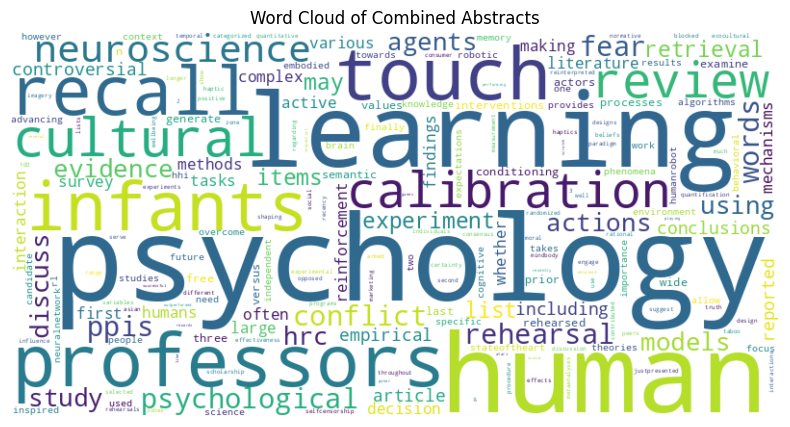

In [22]:
##Some visualizations
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import string
from collections import Counter

# Define common stopwords manually
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above',
    'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few',
    'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
    'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'research'
])

# Combine all abstracts into one text
abstracts = [
    "Reinforcement learning methods have recently been very successful at performing complex sequential tasks like playing Atari games, Go and Poker. These algorithms have outperformed humans in several tasks by learning from scratch, using only scalar rewards obtained through interaction with their environment. While there certainly has been considerable independent innovation to produce such results, many core ideas in reinforcement learning are inspired by phenomena in animal learning, psychology and neuroscience. In this paper, we comprehensively review a large number of findings in both neuroscience and psychology that evidence reinforcement learning as a promising candidate for modeling learning and decision making in the brain. In doing so, we construct a mapping between various classes of modern RL algorithms and specific findings in both neurophysiological and behavioral literature. We then discuss the implications of this observed relationship between RL, neuroscience and psychology and its role in advancing research in both AI and brain science.",
    "With the advances in robotic technology, research in human-robot col- laboration (HRC) has gained in importance. For robots to interact with humans autonomously they need active decision making that takes hu- man partners into account. However, state-of-the-art research in HRC does often assume a leader-follower division, in which one agent leads the interaction. We believe that this is caused by the lack of a reliable representation of the human and the environment to allow autonomous decision making. This problem can be overcome by an embodied ap- proach to HRC which is inspired by psychological studies of human- human interaction (HHI). In this survey, we review neuroscientific and psychological findings of the sensorimotor patterns that govern HHI and view them in a robotics context. Additionally, we study the ad- vances made by the robotic community into the direction of embodied HRC. We focus on the mechanisms that are required for active, physi- cal human-robot collaboration. Finally, we discuss the similarities and differences in the two fields of study which pinpoint directions of future research.",
    "Human infants are fascinated by other people. They bring to this fascination a constellation of rich and flexible expectations about the intentions motivating people's actions. Here we test 11-month-old infants and state-of-the-art learning-driven neural-network models on the “Baby Intuitions Benchmark (BIB),” a suite of tasks challenging both infants and machines to make high-level predictions about the underlying causes of agents' actions. Infants expected agents' actions to be directed towards objects, not locations, and infants demonstrated default expectations about agents' rationally efficient actions towards goals. The neural-network models failed to capture infants' knowledge. Our work provides a comprehensive framework in which to characterize infants' commonsense psychology and takes the first step in testing whether human knowledge and human-like artificial intelligence can be built from the foundations cognitive and developmental theories postulate",
    "Fear conditioning is a widely used laboratory model to investigate learning, memory, and psychopathology across species. The quantification of learning in this paradigm is heterogeneous in humans and psychometric properties of different quantification methods can be difficult to establish. To overcome this obstacle, calibration is a standard metrological procedure in which well-defined values of a latent variable are generated in an established experimental paradigm. These intended values then serve as validity criterion to rank methods. Here, we develop a calibration protocol for human fear conditioning. Based on a literature review, series of workshops, and survey of N = 96 experts, we propose a calibration experiment and settings for 25 design variables to calibrate the measurement of fear conditioning. Design variables were chosen to be as theory-free as possible and allow wide applicability in different experimental contexts. Besides establishing a specific calibration procedure, the general calibration process we outline may serve as a blueprint for calibration efforts in other subfields of behavioral neuroscience that need measurement refinement.",
    "Most theories of free recall emphasize the importance of retrieval in explaining temporal and semantic regularities in recall; rehearsal mechanisms are often absent or limit rehearsal to a subset of what was last rehearsed. However, in three experiments using the overt rehearsal method, we show clear evidence that just-presented items act as retrieval cues during encoding (study-phase retrieval) with prior related items rehearsed despite well over a dozen intervening items. Experiment 1 examined free recall of categorized and uncategorized lists of 32 words. In Experiments 2 and 3, we presented categorized lists of 24, 48, and 64 words for free recall or cued recall, with the category exemplars blocked in successive list positions (Experiment 2) or randomized throughout the list (Experiment 3). The probability of rehearsing a prior word was affected by its semantic similarity to the just-presented item, and the frequency and recency of its prior rehearsals. These rehearsal data suggest alternative interpretations to well-known recall phenomena. With randomized designs, the serial position curves were reinterpreted by when words were last rehearsed (which contributed to the list length effects), and semantic clustering and temporal contiguity effects at output were reinterpreted by whether words were co-rehearsed during study. The contrast with the blocked designs suggests that recall is sensitive to the relative (not absolute) recency of targeted list items. We discuss the benefits of incorporating rehearsal machinery into computational models of episodic memory, and suggest that the same retrieval processes that generate the recalls are used to generate the rehearsals.",
    "We identify points of conflict and consensus regarding (a) controversial empirical claims and (b) normative preferences for how controversial scholarship—and scholars—should be treated. In 2021, we conducted qualitative interviews (n = 41) to generate a quantitative survey (N = 470) of U.S. psychology professors’ beliefs and values. Professors strongly disagreed on the truth status of 10 candidate taboo conclusions: For each conclusion, some professors reported 100% certainty in its veracity and others 100% certainty in its falsehood. Professors more confident in the truth of the taboo conclusions reported more self-censorship, a pattern that could bias perceived scientific consensus regarding the inaccuracy of controversial conclusions. Almost all professors worried about social sanctions if they were to express their own empirical beliefs. Tenured professors reported as much self-censorship and as much fear of consequences as untenured professors, including fear of getting fired. Most professors opposed suppressing scholarship and punishing peers on the basis of moral concerns about research conclusions and reported contempt for peers who petition to retract papers on moral grounds. Younger, more left-leaning, and female faculty were generally more opposed to controversial scholarship. These results do not resolve empirical or normative disagreements among psychology professors, but they may provide an empirical context for their discussion.",
    "This study provides a quantitative synthesis of meta-analytic evidence for the effectiveness of very broadly defined positive psychological interventions (PPIs), i.e. interventions that enhance well-being through pathways consistent with positive psychology theory. The definition covers a wide range of PPIs including single and multi-element PPI programs as well as mindfulness, mind-body, and physical exercise-based interventions. Five databases were searched. One hundred and ninety eight meta-analyses involving 4,065 primary studies and 501,335 participants were selected for review. Using the AMSTAR-2 criteria, the selected meta-analyses were found to be of moderate or high quality. At post-intervention, PPIs had a significantly small to medium effect on well-being, QoL, strengths, depression, anxiety, and stress. Gains were partially maintained at 7.5-month follow-up. Mind-body PPIs such as yoga were particularly effective. Individuals who engaged in longer, face-to-face programs benefited most. This mega-analysis shows that PPIs have an extensive evidence base supporting their effectiveness.",
    "This article details the theoretical foundation of haptics in consumer research. We structure the review using a continuum from proximal touch-based interactions to increasingly distal interactions through devices, imagery, or language use. We begin with a focus on product/object touch in marketing highlighting touch for haptic information, touch for haptic pleasure, and touch for nonhaptic functional reasons. We then elaborate on research considering work compensating for actual touch through various mechanisms including device-mediated touch and imagery processing. Next, we examine interpersonal touch followed by a discussion on touch in sensory words and textual paralanguage. The authors note various avenues for future research in haptics with the aim to encourage research in consumer psychology and marketing.",
    "The character of armed conflict has changed dramatically. The use of overwhelming force no longer brings victory and success. Under what conditions do supposedly weaker conflict actors ‘outpower’ stronger actors? This article argues that, throughout human history, those most willing to engage in and sustain extreme conflict have not been rational actors but ‘devoted actors’ driven by faith in defending or advancing their non-negotiable ‘sacred values’, whether religious or secular. Bringing into dialogue insights from large group psychology, neuroscience, and epigenetics with political science, this article demonstrates how two factors can help explain apparently non-rational elements of human functioning during armed conflict: first, the biological substrate helps elucidate why and how rational actor models seem to underestimate the influence of ‘right and wrong’ in people’s behaviour; second, the complex psychology of large groups often drives people to engage in action that may not be in their own individual interests.",
    "Research in cultural psychology over the last three decades has revealed the profound influence of culture on cognitive, emotional, and motivational processes shaping individuals into active agents. This article aims to show cultural psychology's promise in three key steps. First, we review four notable cultural dimensions believed to underlie cultural variations: independent versus interdependent self, individualism versus collectivism, tightness versus looseness of social norms, and relational mobility. Second, we examine how ecology and geography shape human activities and give rise to organized systems of cultural practices and meanings, called eco-cultural complexes. In turn, the eco-cultural complex of each zone is instrumental in shaping a wide range of psychological processes, revealing a psychological diversity that extends beyond the scope of the current East–West literature. Finally, we examine some of the non-Western cultural zones present today, including Arab, East Asian, Latin American, and South Asian zones, and discuss how they may have contributed, to varying degrees, to the formation of the contemporary Western cultural zone."
]

combined_abstracts = " ".join(abstracts)

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

# Preprocess the combined text
processed_words = preprocess_text(combined_abstracts)

# Create a word frequency counter
word_freq = Counter(processed_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Combined Abstracts')
plt.show()






/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


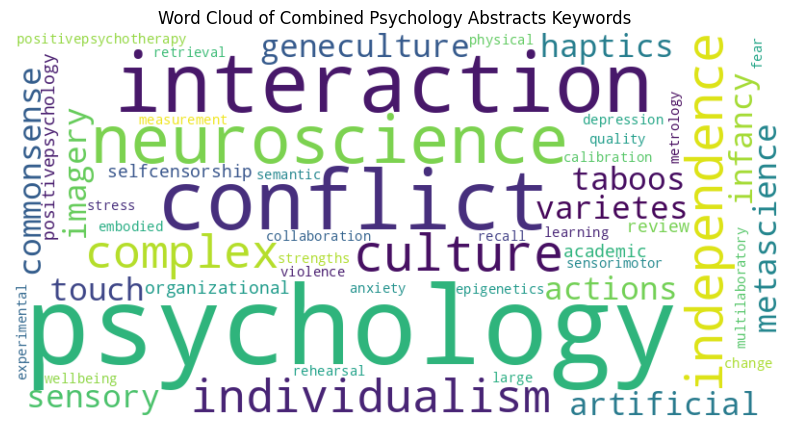

In [23]:
#Psychology Keywords



import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import string
from collections import Counter

# Define common stopwords manually
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above',
    'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few',
    'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
    'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
])

# Combine all abstracts into one text
abstracts = {
    "learning neuroscience psychology",
    "collaboration sensorimotor interaction embodied physical interaction",
    "psychology commonsense actions infancy artificial",
    "fear calibration multi-laboratory measurement metrology experimental",
    "recall rehearsal semantic retrieval",
    "taboos metascience self-censorship academic psychology organizational conflict",
    "positivepsychology review positivepsychotherapy quality well-being strengths depression anxiety stress",
    "touch haptics imagery sensory",
     "change conflict large violence psychology neuroscience epigenetics",
     "culture independence individualism complex gene-culture varietes"
}



combined_abstracts = " ".join(abstracts)

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

# Preprocess the combined text
processed_words = preprocess_text(combined_abstracts)

# Create a word frequency counter
word_freq = Counter(processed_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Combined Psychology Abstracts Keywords')
plt.show()







/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


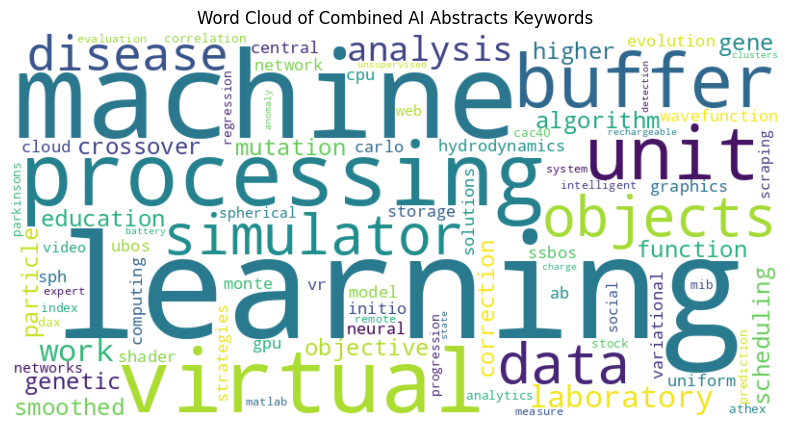

In [24]:
#AI Keywords
#Psychology Keywords



import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import string
from collections import Counter

# Define common stopwords manually
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above',
    'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few',
    'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
    'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
])

# Combine all abstracts into one text
abstracts = {
    "Intelligent Expert System Remote Laboratory Work Virtual Laboratory Work Virtual Simulator.",
    "machine learning prediction of disease progression Parkinson's disease",
    "Neural Network Wavefunction Variational Monte Carlo Evolution Strategies Machine Learning Ab Initio solutions",
    "genetic algorithm crossover mutation objective function scheduling higher education, gene correction",
    "stock index DAX CAC40 MIB ATHEX correlation analysis regression analysis",
    "web scraping social networks data processing machine learning data analytics",
    "Smoothed Particle Hydrodynamics (SPH) Graphics Processing Unit (GPU) Central Processing Unit (CPU) Shader Storage Buffer Objects (SSBOs) Uniform Buffer Objects (UBOs).",
    "clusters anomaly detection unsupervised learning",
     "Evaluation Measure Machine learning MATLAB Rechargeable Battery State of Charge",
     "VR virtual simulator cloud computing learning model spherical video  "
}



combined_abstracts = " ".join(abstracts)

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

# Preprocess the combined text
processed_words = preprocess_text(combined_abstracts)

# Create a word frequency counter
word_freq = Counter(processed_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Combined AI Abstracts Keywords')
plt.show()

# Convert word frequency to DataFrame for bar plot
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


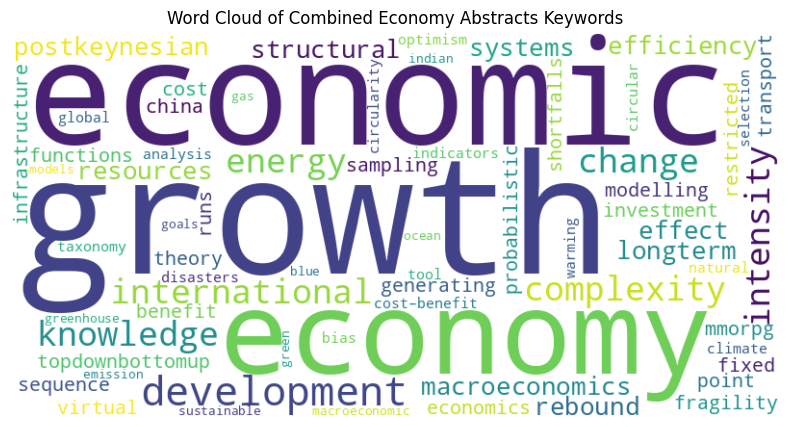

In [25]:
#AI Keywords
#Economy Keywords



import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import string
from collections import Counter

# Define common stopwords manually
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above',
    'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few',
    'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
    'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
])

# Combine all abstracts into one text
abstracts = {
    "virtual economy, MMORPG, economics",
    "Economic Complexity, Knowledge Intensity, Economic Growth, International Development",
    "energy resources structural change macroeconomics post-Keynesian systems long-term growth",
    "Circular economy circularity indicators taxonomy selection tool",
    "infrastructure economic growth fragility investment theory China transport cost over- runs benefit shortfalls cost–benefit analysis optimism bias ",
    "Economic Complexity Knowledge Intensity Economic Growth International Development",
    "restricted growth sequence fixed point generating functions probabilistic sampling",
    "climate change global warming natural disasters macroeconomic models",
    "Rebound effect Energy efficiency Top-down/bottom-up modelling",
    "Blue economy Greenhouse gas emission Sustainable development goals Green growth Indian ocean"
}



combined_abstracts = " ".join(abstracts)

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

# Preprocess the combined text
processed_words = preprocess_text(combined_abstracts)

# Create a word frequency counter
word_freq = Counter(processed_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Combined Economy Abstracts Keywords')
plt.show()

# Convert word frequency to DataFrame for bar plot
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

In [26]:
###Text Summarizations


###try to summarize
#Ecoomy Summaries

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    sentences = sent_tokenize(text)
    preprocessed_sentences = []

    for sentence in sentences:
        words = word_tokenize(sentence)
        words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words and word not in string.punctuation]
        preprocessed_sentences.append(' '.join(words))

    return sentences, preprocessed_sentences

def create_similarity_matrix(sentences):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(sentences)
    similarity_matrix = cosine_similarity(tfidf_matrix)
    return similarity_matrix

def lexrank(sentences, similarity_matrix, top_n=3):
    nx_graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank(nx_graph)
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)

    summary = [ranked_sentences[i][1] for i in range(top_n)]
    return summary

def summarize_article(article, top_n=3):
    sentences, preprocessed_sentences = preprocess_text(article)
    similarity_matrix = create_similarity_matrix(preprocessed_sentences)
    summary = lexrank(sentences, similarity_matrix, top_n=top_n)
    return ' '.join(summary)

# Example articles (replace these with the actual articles)
articles = [
    """Massively multiplayer online role-playing games often contain sophisticated in-game economies. Many important real-world economic phenomena, such as inflation, economic growth, and business cycles, are also present in these virtual economies. One major difference between real-world and virtual economies is the ease and frequency by which a policymaker, in this case, a game developer, can introduce economic shocks. These economic shocks, typically implemented with game updates or signaled through community channels, provide fertile ground to study the effects of economic interventions on markets. In this work, we study the effect of in-game economic market interventions, namely, a transaction tax and an item sink, in Old School RuneScape. Using causal inference methods, we find that the tax did not meaningfully affect the trading volume of items at the tax boundaries and that the item sink contributed to the inflation of luxury good prices, without reducing trade volume. Furthermore, we find evidence that the illicit gold trading market was relatively unaffected by the implemented market interventions. Our findings yield useful insights not only into the effect of market interventions in virtual economies but also for real-world markets.""",
"""How much knowledge is there in an economy? In recent years, data on the mix of products that countries export has been used to construct measures of economic complexity that estimate the knowledge available in an economy and predict future economic growth. Here we introduce a new and simpler metric of economic complexity (ECI+) that measures the total exports of an economy corrected by how difficult it is to export each product. We use data from 1973 to 2013 to compare the ability of ECI+, the Economic Complexity Index (ECI), and Fitness complexity, to predict future economic growth using 5, 10, and 20-year panels in a pooled OLS, a random effects model, and a fixed effects model. We find that ECI+ outperforms ECI and Fitness in its ability to predict economic growth and in the consistency of its estimators across most econometric specifications. On average, one standard deviation increase in ECI+ is associated with an increase in annualized growth of about 4% to 5%. We then combine ECI+ with measures of physical capital, human capital, and institutions, to find a robust model of economic growth. The ability of ECI+ to predict growth, and the value of its coefficient, is robust to these controls. Also, we find that human capital, political stability, and control of corruption; are positively associated with future economic growth, and that initial income is negatively associated with growth, in agreement with the traditional growth literature. Finally, we use ECI+ to generate economic growth predictions for the next 20 years and compare these predictions with the ones obtained using ECI and Fitness. These findings improve the methods available to estimate the knowledge intensity of economies and predict future economic growth.""",
"""All economies require physical resource consumption to grow and maintain their structure. The modern economy is additionally characterized by private debt. The Human and Resources with MONEY (HARMONEY) economic growth model links these features using a stock and flow consistent framework in physical and monetary units. Via an updated version, we explore the interdependence of growth and three major structural metrics of an economy. First, we show that relative decoupling of gross domestic product (GDP) from resource consumption is an expected pattern that occurs because of physical limits to growth, not a response to avoid physical limits. While an increase in resource efficiency of operating capital does increase the level of relative decoupling, so does a change in pricing from one based on full costs to one based only on marginal costs that neglects depreciation and interest payments leading to higher debt ratios. Second, if assuming full labor bargaining power for wages, when a previously-growing economy reaches peak resource extraction and GDP, wages remain high but profits and debt decline to zero. By removing bargaining power, profits can remain positive at the expense of declining wages. Third, the distribution of intermediate transactions within the input-output table of the model follows the same temporal pattern as in the post-World War II U.S. economy. These results indicate that the HARMONEY framework enables realistic investigation of interdependent structural change and trade-offs between economic distribution, size, and resources consumption.""",
"""Implementing circular economy (CE) principles is increasingly recommended as a convenient solution to meet the goals of sustainable development. New tools are required to support practitioners, decision-makers and policy-makers towards more CE practices, as well as to monitor the effects of CE adoption. Worldwide, academics, industrialists and politicians all agree on the need to use CE-related measuring instruments to manage this transition at different systemic levels. In this context, a wide range of circularity indicators (C- indicators) has been developed in recent years. Yet, as there is not one single definition of the CE concept, it is of the utmost importance to know what the available indicators measure in order to use them properly. Indeed, through a systematic literature review – considering both academic and grey literature – 55 sets of C-indicators, developed by scholars, consulting companies and governmental agencies, have been identified, encompassing different purposes, scopes, and potential usages. Inspired by existing taxonomies of eco-design tools and sustainability indicators, and in line with the CE characteristics, a classification of indicators aiming to assess, improve, monitor and communicate on the CE performance is proposed and discussed. In the developed taxonomy including 10 categories, C-indicators are differentiated regarding criteria such as the levels of CE implementation (e.g. micro, meso, macro), the CE loops (maintain, reuse, remanufacture, recycle), the performance (intrinsic, impacts), the perspective of circularity (actual, potential) they are taking into account, or their degree of transversality (generic, sector-specific). In addition, the database inventorying the 55 sets of C- indicators is linked to an Excel-based query tool to facilitate the selection of appropriate indicators according to the specific user’s needs and requirements. This study enriches the literature by giving a first need-driven taxonomy of C-indicators, which is experienced on several use cases. It provides a synthesis and clarification to the emerging and must-needed research theme of C-indicators, and sheds some light on remaining key challenges like their effective uptake by industry. Eventually, limitations, improvement areas, as well as implications of the proposed taxonomy are intently addressed to guide future research on C-indicators and CE implementation.""",
"""China’s three-decade infrastructure investment boom shows few signs of abating. Is China’s economic growth a consequence of its purposeful investment? Is China a prodigy in delivering infrastructure from which rich democracies could learn? The prevalent view in economics literature and policies derived from it is that a high level of infrastructure investment is a precursor to economic growth. China is especially held up as a model to emulate. Politicians in rich democracies display awe and envy of the scale of infrastructure Chinese leaders are able to build. Based on the largest dataset of its kind, this paper punctures the twin myths that (i) infrastructure creates economic value, and that (ii) China has a distinct advantage in its delivery. Far from being an engine of economic growth, the typical infrastructure investment fails to deliver a positive risk-adjusted return. Moreover, China’s track record in delivering infrastructure is no better than that of rich democracies. Investing in unproductive projects results initially in a boom, as long as construction is ongoing, followed by a bust, when forecasted benefits fail to materialize and projects therefore become a drag on the economy. Where investments are debt-financed, overinvesting in unproductive projects results in the build-up of debt, monetary expansion, instability in financial markets, and economic fragility, exactly as we see in China today. We conclude that poorly managed infrastructure investments are a main explanation of surfacing economic and financial problems in China. We predict that, unless China shifts to a lower level of higher-quality infrastructure investments, the country is headed for an infrastructure-led national financial and economic crisis, which is likely also to be a crisis for the international economy. China’s infrastructure investment model is not one to follow for other countries but one to avoid.""",
"""How much knowledge is there in an economy? In recent years, data on the mix of products that countries export has been used to construct measures of economic complexity that estimate the knowledge available in an economy and predict future economic growth. Here we introduce a new and simpler metric of economic complexity (ECI+) that measures the total exports of an economy corrected by how difficult it is to export each product. We use data from 1973 to 2013 to compare the ability of ECI+, the Economic Complexity Index (ECI), and Fitness complexity, to predict future economic growth using 5, 10, and 20-year panels in a pooled OLS, a random effects model, and a fixed effects model. We find that ECI+ outperforms ECI and Fitness in its ability to predict economic growth and in the consistency of its estimators across most econometric specifications. On average, one standard deviation increase in ECI+ is associated with an increase in annualized growth of about 4% to 5%. We then combine ECI+ with measures of physical capital, human capital, and institutions, to find a robust model of economic growth. The ability of ECI+ to predict growth, and the value of its coefficient, is robust to these controls. Also, we find that human capital, political stability, and control of corruption; are positively associated with future economic growth, and that initial income is negatively associated with growth, in agreement with the traditional growth literature. Finally, we use ECI+ to generate economic growth predictions for the next 20 years and compare these predictions with the ones obtained using ECI and Fitness. These findings improve the methods available to estimate the knowledge intensity of economies and predict future economic growth.""",
"""We call i a fixed point of a given sequence if the value of that sequence at the i-th position coincides with i. Here, we enumerate fixed points in the class of restricted growth sequences. The counting process is conducted by calculation of generating functions and leveraging a probabilistic sampling method.""",
"""Climatic factors can directly affect economic outcomes such as output, investment and productivity, and understanding the economic consequences of climate change is becoming a necessity not just for climate economists but also for a wider range of economic professionals involved in modelling and forecasting macroeconomic variables. The focus of this review is on the key theoretical and empirical modelling issues in the analysis of the macroeconomic risks deriving from climate change. The paper develops the taxonomy introduced by a number of previous Bank of England studies, which distinguish between physical and transition risks of climate change. The paper then identifies the different channels through which these risks are transmitted to the macro-economy, either through (unpredictable) economic shocks or through predictable, longer-term impacts. The different approaches to modelling these macroeconomic effects are then discussed and assessed in light of the increasing need to routinely monitor and quantify the impact of emerging climate change risks on the economy.""",
"""This paper examines the macroeconomic rebound effect for the UK economy arising from energy efficiency policies 2000–2010 using the macroeconomic model, MDM-E3. The literature distinguishes between three types of rebound effect: direct, indirect and economy-wide. The macroeconomic rebound effect considered here is the combination of the indirect and economy-wide effects. Policies for the domestic, business, commercial and public, and transport sectors of the economy are analysed for 2000–2010. Overall, the policies lead to a saving of about 8% of the energy, which would otherwise have been used and a reduction in CO2 emissions of 10% (or 14 mtC) by 2010. There are also favourable macroeconomic effects: lower inflation and higher growth. We find that the macroeconomic rebound effect arising from UK energy efficiency policies for the period 2000–2010 is around 11% by 2010, averaged across sectors of the economy. When this is added to the (assumed) direct rebound effect of around 15%, this gives a total rebound effect of around 26% arising from these policies. Thus, the findings of the study support the argument that energy efficiency improvements for both consumers and producers, stimulated by policy incentives, will lead to significant reductions in energy demand and hence in greenhouse gas emissions.""",
"""The sustainability of the blue economy (BE) may be impeded by the adverse consequences of human activities, such as greenhouse gas (GHG) emissions, unsustainable economic expansion, and engagement in environmentally harmful trading practices. Therefore, this study aims to determine the impact of GHG emissions, trade, and economic growth on the BE. To achieve this, we used a panel dataset of 25 selected countries surrounding the Indian Ocean, covering the period 2002–2019. As a process of estimation, we employed the Westerlund error correction model to detect cointegration. To determine the long-term relationship among the variables, we adopted the cross-sectional autoregressive distributed lag (CS-ARDL) approach, which revealed a significant outcome in the long run but an insignificant outcome in the short run. In response to this divergence, the panel corrected standard error (PCSE) model was applied to correct the autocorrelation problem. Subsequently, a two-step generalized methods of moment (GMM) test was conducted to check robustness. Based on the results of PCSE and GMM, this study reveals that trade has a negative effect on the BE, while GHG emissions and economic growth have a positive ascendance. From a policy standpoint, all governments must integrate ocean-based solutions into their national climate pledges to fulfill the objectives outlined in the Sustainable Development Goals (SDGs), particularly SDG 14 (Life Below Water)."""
]


summaries = [summarize_article(article) for article in articles]

# Print summaries
for i, summary in enumerate(summaries):
    print(f"Article {i+1} Summary:")
    print(summary)
    print()




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Article 1 Summary:
In this work, we study the effect of in-game economic market interventions, namely, a transaction tax and an item sink, in Old School RuneScape. Our findings yield useful insights not only into the effect of market interventions in virtual economies but also for real-world markets. These economic shocks, typically implemented with game updates or signaled through community channels, provide fertile ground to study the effects of economic interventions on markets.

Article 2 Summary:
In recent years, data on the mix of products that countries export has been used to construct measures of economic complexity that estimate the knowledge available in an economy and predict future economic growth. We use data from 1973 to 2013 to compare the ability of ECI+, the Economic Complexity Index (ECI), and Fitness complexity, to predict future economic growth using 5, 10, and 20-year panels in a pooled OLS, a random effects model, and a fixed effects model. These findings improve

In [27]:
def tokenize_sentences(text):
    return nltk.sent_tokenize(text)

def preprocess(sentences):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(sentences)
    return X, vectorizer

def build_similarity_matrix(sentences, X):
    similarity_matrix = cosine_similarity(X)
    return similarity_matrix

def rank_sentences(similarity_matrix, sentences):
    nx_graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank(nx_graph)
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    return ranked_sentences

def summarize(sentences, top_n=3):
    X, vectorizer = preprocess(sentences)
    similarity_matrix = build_similarity_matrix(sentences, X)
    ranked_sentences = rank_sentences(similarity_matrix, sentences)
    summary = " ".join([ranked_sentences[i][1] for i in range(top_n)])
    return summary

def lexrank_summary(sentences, top_n=3):
    X, vectorizer = preprocess(sentences)
    similarity_matrix = build_similarity_matrix(sentences, X)
    nx_graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank_numpy(nx_graph)
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    summary = " ".join([ranked_sentences[i][1] for i in range(top_n)])
    return summary

def hybrid_summary(sentences, top_n=3):
    X, vectorizer = preprocess(sentences)
    similarity_matrix = build_similarity_matrix(sentences, X)
    pagerank_scores = nx.pagerank(nx.from_numpy_array(similarity_matrix))
    lexrank_scores = nx.pagerank_numpy(nx.from_numpy_array(similarity_matrix))
    hybrid_scores = {i: (pagerank_scores[i] + lexrank_scores[i]) / 2 for i in pagerank_scores}
    ranked_sentences = sorted(((hybrid_scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    summary = " ".join([ranked_sentences[i][1] for i in range(top_n)])
    return summary

def evaluate_summary(generated_summary, reference_summary):
    generated_tokens = nltk.word_tokenize(generated_summary)
    reference_tokens = nltk.word_tokenize(reference_summary)
    precision = precision_score(reference_tokens, generated_tokens, average='binary')
    recall = recall_score(reference_tokens, generated_tokens, average='binary')
    f1 = f1_score(reference_tokens, generated_tokens, average='binary')
    return precision, recall, f1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
###All Methods LexRank - PageRank - Hybrid Model
import numpy as np
import nltk
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt')

def tokenize_sentences(text):
    return nltk.sent_tokenize(text)

def preprocess(sentences):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(sentences)
    return X, vectorizer

def build_similarity_matrix(sentences, X):
    similarity_matrix = cosine_similarity(X)
    return similarity_matrix

def rank_sentences(similarity_matrix, sentences):
    nx_graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank(nx_graph)
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    return ranked_sentences

def summarize(sentences, top_n=3):
    X, vectorizer = preprocess(sentences)
    similarity_matrix = build_similarity_matrix(sentences, X)
    ranked_sentences = rank_sentences(similarity_matrix, sentences)
    summary = " ".join([ranked_sentences[i][1] for i in range(top_n)])
    return summary

def lexrank_summary(sentences, top_n=3):
    X, vectorizer = preprocess(sentences)
    similarity_matrix = build_similarity_matrix(sentences, X)
    threshold = np.median(similarity_matrix)  # Setting a threshold for LexRank
    similarity_matrix = (similarity_matrix >= threshold).astype(float)
    nx_graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank(nx_graph)
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    summary = " ".join([ranked_sentences[i][1] for i in range(top_n)])
    return summary

def hybrid_summary(sentences, top_n=3):
    X, vectorizer = preprocess(sentences)
    similarity_matrix = build_similarity_matrix(sentences, X)
    pagerank_scores = nx.pagerank(nx.from_numpy_array(similarity_matrix))
    threshold = np.median(similarity_matrix)
    lexrank_matrix = (similarity_matrix >= threshold).astype(float)
    lexrank_scores = nx.pagerank(nx.from_numpy_array(lexrank_matrix))
    hybrid_scores = {i: (pagerank_scores[i] + lexrank_scores[i]) / 2 for i in pagerank_scores}
    ranked_sentences = sorted(((hybrid_scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    summary = " ".join([ranked_sentences[i][1] for i in range(top_n)])
    return summary

def evaluate_summary(generated_summary, reference_summary):
    generated_tokens = set(nltk.word_tokenize(generated_summary))
    reference_tokens = set(nltk.word_tokenize(reference_summary))

    common_tokens = generated_tokens & reference_tokens

    precision = len(common_tokens) / len(generated_tokens) if len(generated_tokens) > 0 else 0
    recall = len(common_tokens) / len(reference_tokens) if len(reference_tokens) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0

    return precision, recall, f1

articles = [
    """Application of intelligent expert systems for structuring and automation of laboratory activities in the educational process has been analysed. It is shown that combination of teaching materials with cross-references and transitions by the means of expert systems allows educators to make optimal decisions on time, set priorities and prepare more effective laboratory classes. The implementation of expert systems for classification sections of academic disciplines in both engineering and technical sciences and humanities has been discussed. An algorithm for making decisions by an expert system, where the main emphasis is given to laboratory tasks and work with laboratory equipment, is proposed. It is shown how to develop a new expert system which can help university educators prepare remote laboratory work, and also to use of virtual simulators or effective practical training. The proposed expert systems can be used for classifying thematic sections of a wide range of disciplines, including natural sciences, engineering, and humanities. They can be used for preparing new courses and training new educators in different areas. Thus expert systems are described as high-scale software units without restrictions on the depth of the question tree and the number of logical branches of the classifier.""",
    """The article presents the developed machine learning model for the diagnosis and prognosis of a neurological disorder - Parkinson's disease. The choice of the algorithm used to create the model is justified. By employing machine learning methods, particularly Support Vector Machines and k-Nearest Neighbors algorithms, high accuracy and reliability were achieved in predicting disease class labels. The analysis of relationships between clinical, genetic, and biomarker features demonstrated that these characteristics significantly influence the development of Parkinson's disease.""",
    """Obtaining accurate solutions to many-electron quantum systems is of critical importance, in principle, such solutions allow computing most of possible chemical and physical properties from first principles. Exact solutions require utilizing exponentially scaling algorithms, which are not practical for large systems. Neural networks provide a new approach to approximating the solution while keeping a high level of accuracy. In this work, we explore a novel method of optimizing neural network wavefunctions by employing Evolution Strategies (ES) within a Variational Monte Carlo (VMC) framework. This allows us to more robustly find solutions while keeping a small number of parameters, making it an efficient alternative to traditional methods.""",
    """In the modern educational landscape, ensuring efficient and conflict-free class scheduling in higher education institutions remains a paramount challenge. Traditional methods, although functional, often fall short in accommodating dynamic class environments and curriculums. This research introduces a unique genetic algorithm that addresses these challenges by targeting and eliminating undesirable genes during the crossover and mutation processes. Unlike conventional models that utilize a fitness function, our approach employs an objective function that takes smaller values for better scheduling configurations, ensuring a more precise evaluation. The algorithm is structured to prioritize the mutation of bad genes based on a localized objective function. When applied to higher education scheduling, the algorithm takes into account potential class overlaps, room allocation conflicts, and other common scheduling issues. Extensive numerical experiments demonstrate the effectiveness of this method, with results indicating the possibility of achieving a zero value for the objective function, representing a schedule devoid of any conflicts. This research not only offers a novel approach to class scheduling but also opens avenues for applying the algorithm to other complex scheduling scenarios.""",
    """The last several years were quite challenging for the whole world. People, businesses, and governments must adapt to new realities and find new ways to survive. The shock of the world pandemic brought uncertainty to quotidian life, then the Russian-Ukrainian war forced people to accept new obstacles. Meanwhile, governments must look for paths to keep calm, not only nations but also make everything possible to keep low economic indicators such as interest rate, inflation, unemployment, etc. within all these periods. In this study, the statistical importance of dependence of earlier mentioned and statistical metrics including exchange rate, current account, inflow and outflow of portfolio investment on the price of the stock indexes of Germany, France, Italy, and Greece is examined. These EU countries have been strategically selected due to their pivotal roles in the European economic landscape, coupled with their acute susceptibility to instability-triggered fluctuations. For instance, the resonance of social mass protests in France, and the intricate interplay of national debt increasing in Italy and Greece, make them particularly interesting cases for this analysis. By examining the interplay between economic indicators and stock index movements in these nations, this study sheds light on the relationship between macroeconomic variables and financial market performance. Through rigorous statistical analysis, the aim of this research is to uncover potential patterns and dependencies that might offer valuable insights into the ways in which economic dynamics interact with stock market trends in times of upheaval. Ultimately, this research aspires to contribute to a deeper understanding of the mechanisms underpinning the equilibrium between economic fundamentals and financial market behavior during tumultuous periods.""",
    """Social networks can show the general mood of the population or groups interested in a specific topic. Machine learning will recognize people's moods in posts and automatically classify them according to preferences. Often, the problem is a lack of training data, which can now be solved using ChatGPT. Before use, the training data is preprocessed and verticalized. Web scraping from real social network data can be used as test data to evaluate neural network performance. A decision tree machine learning algorithm is used for data classification. The study's results may be of interest to analysts and page managers on social networks Facebook and Instagram.""",
    """Smoothed Particle Hydrodynamics (SPH) has emerged as a versatile method for simulating fluid dynamics and various natural phenomena. In this paper, we present an approach to SPH simulation using compute shaders, leveraging their parallel processing capabilities to enhance performance and accuracy. Our implementation focuses on efficient data organization, neighbor search, force computation, and particle integration within the compute shader framework. We discuss the intricacies of translating the SPH algorithm into the shader domain and optimizing memory access patterns to achieve high computational throughput. Through comprehensive experimentation, we demonstrate the effectiveness of our compute shader-based SPH implementation, showcasing improved simulation fidelity and reduced computation time when compared to traditional CPU-based approaches. We also discuss the implications of our findings for real-time fluid simulations and other computational domains. Our work contributes to the ongoing exploration of compute shaders in graphics and simulation, offering insights into the potential of parallel computing for advancing SPH techniques.""",
    """Anomaly detection is an important problem in various domains, such as user analysis, network intrusion detection, fraud detection and system monitoring. This paper provides a comprehensive review of anomaly detection algorithms for clustering applications. Hence, the paper provides a detailed analysis of various clustering techniques, including distance based, hierarchical, and density based. They also discussed using ensemble techniques and outlier detection methods to improve anomaly detection accuracy on this data set. The authors have applied them to a customer data set to detect anomalies. The authors discussed different cluster-based algorithms and compared their performance based on scalability, precision, recall, and f1 score metrics. Moreover, this work highlights the challenges of cluster-based anomaly detection, such as selecting the appropriate number of clusters, dealing with high-dimensional data, and handling imbalanced datasets. Finally, the authors provided insights into addressing these challenges and discussed future research directions.""",
    """The vibration time series are analyzed using methods for periodically non-stationary random processes (PNRP). Band-pass filtering and Hilbert transform are used to extract quadrature components. The cross-covariance structure of quadratures is considered. It was shown that cross-covariances of different order quadratures result in periodical non-stationarity of the vibration signal.""",
    """A new approach for determining the size and depth of internal square planar defects in laminated composite panels using a developed optoacoustic technique is proposed. The size of the defect is determined by spatial light responses generated by a region of interest, which is located above the defect and oscillated at the fundamental frequency or multiple resonant frequencies. The defect depth is determined using the family of experimental dependencies of the resonant frequency on the defect size. Experimental results proved the effectiveness of the proposed approach in identifying internal planar square defects in fiberglass panels."""
]

reference_summaries = [
    """It is shown how to develop a new expert system which can help university educators prepare remote laboratory work, and also to use of virtual simulators or effective practical training. The proposed expert systems can be used for classifying thematic sections of a wide range of disciplines, including natural sciences, engineering, and humanities. An algorithm for making decisions by an expert system, where the main emphasis is given to laboratory tasks and work with laboratory equipment, is proposed.""",
    """The article presents the developed machine learning model for the diagnosis and prognosis of a neurological disorder - Parkinson's disease. By employing machine learning methods, particularly Support Vector Machines and k-Nearest Neighbors algorithms, high accuracy and reliability were achieved in predicting disease class labels. The choice of the algorithm used to create the model is justified.""",
    """Neural networks provide a new approach to approximating the solution while keeping a high level of accuracy. This allows us to more robustly find solutions while keeping a small number of parameters, making it an efficient alternative to traditional methods. Obtaining accurate solutions to many-electron quantum systems is of critical importance, in principle, such solutions allow computing most of possible chemical and physical properties from first principles.""",
    """When applied to higher education scheduling, the algorithm takes into account potential class overlaps, room allocation conflicts, and other common scheduling issues. This research not only offers a novel approach to class scheduling but also opens avenues for applying the algorithm to other complex scheduling scenarios. Unlike conventional models that utilize a fitness function, our approach employs an objective function that takes smaller values for better scheduling configurations, ensuring a more precise evaluation.""",
    """By examining the interplay between economic indicators and stock index movements in these nations, this study sheds light on the relationship between macroeconomic variables and financial market performance. Ultimately, this research aspires to contribute to a deeper understanding of the mechanisms underpinning the equilibrium between economic fundamentals and financial market behavior during tumultuous periods. Through rigorous statistical analysis, the aim of this research is to uncover potential patterns and dependencies that might offer valuable insights into the ways in which economic dynamics interact with stock market trends in times of upheaval.""",
    """Web scraping from real social network data can be used as test data to evaluate neural network performance. A decision tree machine learning algorithm is used for data classification. Before use, the training data is preprocessed and verticalized.""",
    """Through comprehensive experimentation, we demonstrate the effectiveness of our compute shader-based SPH implementation, showcasing improved simulation fidelity and reduced computation time when compared to traditional CPU-based approaches. We also discuss the implications of our findings for real-time fluid simulations and other computational domains. In this paper, we present an approach to SPH simulation using compute shaders, leveraging their parallel processing capabilities to enhance performance and accuracy.""",
    """They also discussed using ensemble techniques and outlier detection methods to improve anomaly detection accuracy on this data set. This paper provides a comprehensive review of anomaly detection algorithms for clustering applications. Moreover, this work highlights the challenges of cluster-based anomaly detection, such as selecting the appropriate number of clusters, dealing with high-dimensional data, and handling imbalanced datasets.""",
    """It was shown that cross-covariances of different order quadratures result in periodical non-stationarity of the vibration signal. The cross-covariance structure of quadratures is considered. Band-pass filtering and Hilbert transform are used to extract quadrature components.""",
    """The defect depth is determined using the family of experimental dependencies of the resonant frequency on the defect size. A new approach for determining the size and depth of internal square planar defects in laminated composite panels using a developed optoacoustic technique is proposed. Experimental results proved the effectiveness of the proposed approach in identifying internal planar square defects in fiberglass panels."""
]

# Generate summaries for each article
page_rank_summaries = []
lex_rank_summaries = []
hybrid_summaries = []

for article in articles:
    sentences = tokenize_sentences(article)
    page_rank_summaries.append(summarize(sentences))
    lex_rank_summaries.append(lexrank_summary(sentences))
    hybrid_summaries.append(hybrid_summary(sentences))

# Evaluate summaries
page_rank_scores = {'precision': [], 'recall': [], 'f1': []}
lex_rank_scores = {'precision': [], 'recall': [], 'f1': []}
hybrid_scores = {'precision': [], 'recall': [], 'f1': []}

for i in range(len(reference_summaries)):
    pr_precision, pr_recall, pr_f1 = evaluate_summary(page_rank_summaries[i], reference_summaries[i])
    lr_precision, lr_recall, lr_f1 = evaluate_summary(lex_rank_summaries[i], reference_summaries[i])
    hy_precision, hy_recall, hy_f1 = evaluate_summary(hybrid_summaries[i], reference_summaries[i])

    page_rank_scores['precision'].append(pr_precision)
    page_rank_scores['recall'].append(pr_recall)
    page_rank_scores['f1'].append(pr_f1)

    lex_rank_scores['precision'].append(lr_precision)
    lex_rank_scores['recall'].append(lr_recall)
    lex_rank_scores['f1'].append(lr_f1)

    hybrid_scores['precision'].append(hy_precision)
    hybrid_scores['recall'].append(hy_recall)
    hybrid_scores['f1'].append(hy_f1)

# Compute average scores
avg_page_rank_scores = {metric: np.mean(scores) for metric, scores in page_rank_scores.items()}
avg_lex_rank_scores = {metric: np.mean(scores) for metric, scores in lex_rank_scores.items()}
avg_hybrid_scores = {metric: np.mean(scores) for metric, scores in hybrid_scores.items()}

print("PageRank Scores:", avg_page_rank_scores)
print("LexRank Scores:", avg_lex_rank_scores)
print("Hybrid Scores:", avg_hybrid_scores)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


PageRank Scores: {'precision': 0.9142688013740645, 'recall': 0.914227431063755, 'f1': 0.9134618525709332}
LexRank Scores: {'precision': 0.8261147039123958, 'recall': 0.8405416117768262, 'f1': 0.8300693181777092}
Hybrid Scores: {'precision': 0.9816666666666667, 'recall': 0.979032258064516, 'f1': 0.9803278688524589}
